In [178]:
# importing required libraries
import numpy as np
import pandas as pd 
from dateutil.relativedelta import relativedelta
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import warnings

In [179]:
warnings.filterwarnings("ignore")

In [180]:
# loading data 
data = pd.read_csv('data.xlsx - Sheet1 (2).csv')
print("Shape:", data.shape)

print("Columns:", data.columns)

data.head()

Shape: (3998, 39)
Columns: Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

## Basic Checks 

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

observation : we can see there are no missing values in the data.

In [182]:
# finding irregularities in the data
def irregularities(df):
    for i in df:
        print('*'*20, i, '*'*20)
        print(data[i].unique())
        print()

irregularities(data)

******************** Unnamed: 0 ********************
['train']

******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]

******************** Salary ********************
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.

In [183]:
import pandas as pd

def replace_minus_one_with_zero_in_columns(df, columns_to_replace):
    """
    Replace -1 with 0 in specified columns of a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - columns_to_replace (list): List of column names where -1 should be replaced with 0.

    Returns:
    - pd.DataFrame: The DataFrame with -1 replaced by 0 in specified columns.
    """
    df_copy = df.copy()
    df_copy[columns_to_replace] = df_copy[columns_to_replace].replace(-1, 0)
    return df_copy

# Example usage:
# Assuming 'your_dataframe' is your DataFrame and ['ComputerProgramming', 'ElectronicsAndSemicon', ...] are the columns to replace
columns_to_replace = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
df = replace_minus_one_with_zero_in_columns(data, columns_to_replace)


In [184]:
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [185]:
df=df.drop("Unnamed: 0",axis=1)

In [186]:
df.head()

ID     Salary          DOJ          DOL               Designation  \
0  203097   420000.0  6/1/12 0:00      present   senior quality engineer   
1  579905   500000.0  9/1/13 0:00      present         assistant manager   
2  810601   325000.0  6/1/14 0:00      present          systems engineer   
3  267447  1100000.0  7/1/11 0:00      present  senior software engineer   
4  343523   200000.0  3/1/14 0:00  3/1/15 0:00                       get   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00          84.3   
1     Indore      m  10/4/89 0:00          85.4   
2    Chennai      f   8/3/92 0:00          85.0   
3    Gurgaon      m  12/5/89 0:00          85.6   
4    Manesar      m  2/27/91 0:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [188]:
df["DOJ"]= pd.to_datetime(df["DOJ"])

In [189]:
df["DOJ_year"]= df["DOJ"].dt.year

In [190]:
df["DOJ_month"]= df["DOJ"].dt.month

In [191]:
df.head()

ID     Salary        DOJ          DOL               Designation  \
0  203097   420000.0 2012-06-01      present   senior quality engineer   
1  579905   500000.0 2013-09-01      present         assistant manager   
2  810601   325000.0 2014-06-01      present          systems engineer   
3  267447  1100000.0 2011-07-01      present  senior software engineer   
4  343523   200000.0 2014-03-01  3/1/15 0:00                       get   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00          84.3   
1     Indore      m  10/4/89 0:00          85.4   
2    Chennai      f   8/3/92 0:00          85.0   
3    Gurgaon      m  12/5/89 0:00          85.6   
4    Manesar      m  2/27/91 0:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  DOJ_year  \
0         0.8128        0.5269      1.35490                -0.4455      2012   
1         0.3789        1.2396     -0.10760                 0.8637      2013   
2         1.7109        0.1637     -0.86820                 0.6721      2014   
3         0.3448       -0.3440     -0.40780                -0.9194      2011   
4        -0.2793       -1.0697      0.09163                -0.1295      2014   

   DOJ_month  
0          6  
1          9  
2    

In [192]:
df['10board'].value_counts()

cbse                                                                        1395
state board                                                                 1164
0                                                                            350
icse                                                                         281
ssc                                                                          122
up board                                                                      85
matriculation                                                                 38
rbse                                                                          23
board of secondary education                                                  20
up                                                                            19
mp board                                                                      17
wbbse                                                                         16
sslc                        

In [193]:
df["10board"]=df["10board"].replace("0","cbse")

In [194]:
df["10board"]=df["10board"].replace("ssc","state board")

In [195]:
df["10board"]=df["10board"].replace("up board","state board")

In [196]:
df["10board"]=df["10board"].replace("matriculation","state board")

In [197]:
df["10board"]=df["10board"].replace("rbse","state board")

In [198]:
df["10board"]=df["10board"].replace("board of secondary education","state board")

In [199]:
df["10board"]=df["10board"].replace("up","state board")

In [200]:
df["10board"]=df["10board"].replace("mp board","state board")

In [201]:
df["10board"]=df["10board"].replace("wbbse","state board")

In [202]:
df["10board"]=df["10board"].replace("central board of secondary education","cbse")

In [203]:
df["10board"]=df["10board"].replace("kseeb","state board")

In [204]:
df["10board"]=df["10board"].replace("upboard","state board")

In [205]:
df["10board"]=df["10board"].replace("icse board","icse")

In [206]:
df["10board"]=df["10board"].replace("international board","icse")

In [207]:
df["10board"]=df["10board"].replace("cbse[gulf zone]","cbse")

In [208]:
df["10board"]=df["10board"].replace("state","state board")

In [209]:
df["10board"]=df["10board"].replace("jawahar navodaya vidyalaya","cbse")

In [210]:
df["10board"]=df["10board"].replace("cicse","icse")

In [211]:
def board(x):
    if (x=="cbse"):
        return "cbse"
    elif x=="icse":
        return "icse"
    
    else:
        return "state borad"

In [212]:
board("cbse")

'cbse'

In [213]:
df["10board"]=df["10board"].apply(board)

In [214]:
df['10board'].value_counts()

state borad    1955
cbse           1760
icse            283
Name: 10board, dtype: int64

In [215]:
pd.set_option("display.max_rows",1000)

In [216]:
df['12board'] = df['12board'].replace('0','cbse')

In [217]:
def board(x):
    if ((x=="cbse")|(x=="'all india board'")|(x=="central board of secondary education, new delhi")|(x=="cbese")):
        return "cbse"
    elif ((x=="isc")|(x=="icse")|(x=="isc board")|(x=="isce")|(x=="cicse")|(x=="isc board")|(x=="new delhi")):
        return "icse"
    elif x=="0":
        return "cbse"
    else:
        return "state board"

In [218]:
df["12board"]=df["12board"].apply(board)

In [219]:
df["12board"].value_counts()

state board    2060
cbse           1761
icse            177
Name: 12board, dtype: int64

In [220]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [221]:
df[df['Specialization'].str.contains("computer")]["Specialization"].unique()

array(['computer engineering', 'computer science & engineering',
       'computer application', 'electronics and computer engineering',
       'computer science and technology',
       'computer and communication engineering', 'computer networking',
       'computer science'], dtype=object)

In [222]:
df[df['Specialization'].str.contains("electronics")]["Specialization"].unique()

array(['electronics and communication engineering',
       'electronics and electrical engineering',
       'electronics & telecommunications',
       'electronics and computer engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'electronics and instrumentation engineering',
       'electronics engineering', 'electronics'], dtype=object)

In [223]:
df[df['Specialization'].str.contains("electrical")]["Specialization"].unique()

array(['electronics and electrical engineering', 'electrical engineering',
       'electrical and power engineering'], dtype=object)

In [224]:
df[df['Specialization'].str.contains("information")]["Specialization"].unique()

array(['information technology', 'information science engineering',
       'information & communication technology', 'information science'],
      dtype=object)

In [225]:
df[df['Specialization'].str.contains("mechanical")]["Specialization"].unique()

array(['mechanical engineering', 'mechanical and automation',
       'mechanical & production engineering'], dtype=object)

In [226]:
df[df['Specialization'].str.contains("civil")]["Specialization"].unique()

array(['civil engineering'], dtype=object)

In [227]:
def Specialization(x):
    if (x=="computer engineering")|(x=="computer science & engineering")|(x=="computer application")|(x=="electronics and computer engineering")|(x=="computer science and technology")|(x=="computer and communication engineering")|(x=="computer networking")|(x=="computer science"):
        return "cse"
    elif (x=="electronics and communication engineering")|(x=="electronics & telecommunications")|(x=="electronics engineering")|(x=="electronics"):
        return "ece"
    elif (x=="applied electronics and instrumentation")|(x=="electronics & instrumentation eng")|(x=="electronics and instrumentation engineering"):
        return "eie"
    elif (x=="electronics and electrical engineering")|(x=="electrical engineering")|(x=="electrical and power engineering"):
        return "eie"
    elif (x=="information technology")|(x=="information science engineering")|(x=="information & communication technology")|(x=="information science"):
        return "it"
    elif (x=="mechanical engineering")|(x=="mechanical and automation")|(x=="mechanical & production engineering"):
        return "me"
    elif (x=="civil engineering"):
        return "ce"
    else:
        return "other"

In [228]:
df['Specialization']=df['Specialization'].apply(Specialization)

In [229]:
df['Specialization'].value_counts()

cse      1601
ece      1021
it        690
eie       348
me        207
other     102
ce         29
Name: Specialization, dtype: int64

In [230]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [231]:
df = df[~(df['GraduationYear'] == 0)]

In [232]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

In [233]:
pd.set_option("display.max_columns",1000)

In [234]:
df

ID     Salary        DOJ           DOL                  Designation  \
0     203097   420000.0 2012-06-01       present      senior quality engineer   
1     579905   500000.0 2013-09-01       present            assistant manager   
2     810601   325000.0 2014-06-01       present             systems engineer   
3     267447  1100000.0 2011-07-01       present     senior software engineer   
4     343523   200000.0 2014-03-01   3/1/15 0:00                          get   
...      ...        ...        ...           ...                          ...   
3993   47916   280000.0 2011-10-01  10/1/12 0:00            software engineer   
3994  752781   100000.0 2013-07-01   7/1/13 0:00             technical writer   
3995  355888   320000.0 2013-07-01       present  associate software engineer   
3996  947111   200000.0 2014-07-01   1/1/15 0:00           software developer   
3997  324966   400000.0 2013-02-01       present      senior systems engineer   

               JobCity Gender           DOB  10percentage      10board  \
0            Bangalore      f  2/19/90 0:00         84.30  state borad   
1               Indore      m  10/4/89 0:00         85.40         cbse   
2              Chennai      f   8/3/92 0:00         85.00         cbse   
3              Gurgaon      m  12/5/89 0:00         85.60         cbse   
4              Manesar      m  2/27/91 0:00         78.00         cbse   
...                ...    ...           ...           ...          ...   
3993        New Delhi       m  4/15/87 0:00         52.09         cbse   
3994         Hyderabad      f  8/27/92 0:00         90.00  state borad   
3995         Bangalore      m   7/3/91 0:00         81.86  state borad   
3996  Asifabadbanglore      f  3/20/92 0:00         78.72  state borad   
3997           Chennai      f  2/26/91 0:00         70.60         cbse   

      12graduation  12percentage      12board  CollegeID  CollegeTier  \
0             2007         95.80  state board       1141            2   
1             2007         85.00         cbse       5807            2   
2             2010         68.20         cbse         64            2   
3             2007         83.60         cbse       6920            1   
4             2008         76.80         cbse      11368            2   
...            ...           ...          ...        ...          ...   
3993          2006         55.50         cbse       6268            2   
3994          2009         93.00  state board       4883            2   
3995          2008         65.50  state board       9786            2   
3996          2010         69.88  state board        979            2   
3997          2008         68.00         cbse       6609            2   

           Degree Specialization  collegeGPA  CollegeCityID  CollegeCityTier  \
0     B.Tech/B.E.            cse       78.00           1141                0   
1     B.Tech/B.E.            ece       70.06           5807                0   
2     B.Tech/B.E.             it       70.00             64                0   
3     B.Tech/B.E.            cse       74.64           6920                1   
4     B.Tech/B.E.            ece       73.90          11368                0   
...           ...            ...         ...            ...              ...   
3993  B.Tech/B.E.             it       61.50           6268                0   
3994  B.Tech/B.E.            ece       77.30           4883                1   
3995  B.Tech/B.E.            cse       70.00           9786                0   
3996  B.Tech/B.E.            cse       70.42            979                1   
3997  B.Tech/B.E.             it       68.00           6609                1   

        CollegeState  GraduationYear  English  Logical  Quant    Domain  \
0     Andhra Pradesh            2011      515      585    525  0.635979   
1     Madhya Pradesh            2012      695      610    780  0.960603   
2      Uttar Pradesh            2014      615      545    370  0.450877   
3         

In [235]:
df['CollegeState'].value_counts()

Uttar Pradesh        914
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [236]:
df['CollegeCityTier'].value_counts()

0    2796
1    1201
Name: CollegeCityTier, dtype: int64

In [237]:
df['JobCity'].value_counts()

Bangalore                                 627
-1                                        461
Noida                                     368
Hyderabad                                 335
Pune                                      290
Chennai                                   272
Gurgaon                                   198
New Delhi                                 196
Mumbai                                    108
Kolkata                                    98
Jaipur                                     46
Lucknow                                    36
Mysore                                     36
Navi Mumbai                                32
chennai                                    27
pune                                       26
Greater Noida                              26
Chandigarh                                 25
Indore                                     24
Bhubaneswar                                22
Coimbatore                                 20
Faridabad                         

In [238]:
df['JobCity'] = df['JobCity'].str.lower().str.strip()

In [239]:
mumbai = df['JobCity'].str.contains('mumb', case=False)
df.loc[mumbai, 'JobCity'] = 'mumbai'

In [240]:
delhi = df['JobCity'].str.contains('delhi', case=False)
df.loc[delhi, 'JobCity'] = 'delhi'

In [241]:
gurgaon = df['JobCity'].str.contains('gurga', case=False)
df.loc[gurgaon, 'JobCity'] = 'gurgaon'

In [242]:
banglore = df['JobCity'].str.contains('bana', case=False)
df.loc[banglore, 'JobCity'] = 'bangalore'

In [243]:
df['JobCity'].unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', '-1',
       'mohali', 'jhansi', 'delhi', 'bhubaneswar', 'mumbai', 'mangalore',
       'rewari', 'gaziabaad', 'bhiwadi', 'mysore', 'rajkot',
       'greater noida', 'jaipur', 'thane', 'maharajganj',
       'thiruvananthapuram', 'punchkula', 'bhubaneshwar', 'coimbatore',
       'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar', 'una',
       'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur', 'bhagalpur',
       'ahmedabad', 'kochi/cochin', 'bankura', 'bengaluru', 'kanpur',
       'vijayawada', 'kochi', 'beawar', 'alwar', 'siliguri', 'raipur',
       'bhopal', 'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur',
       'kolkata`', 'bulandshahar', 'haridwar', 'raigarh', 'visakhapatnam',
       'jabalpur', 'unnao', 'aurangabad', 'belgaum', 'dehradun',
       'rudrapur', 'jamshedpur', 'vizag', 'nouda', 'dharamshala',
       'hissar', 'ranchi', 'madurai', 'chandigarh', 

In [244]:
df.head()

ID     Salary        DOJ          DOL               Designation  \
0  203097   420000.0 2012-06-01      present   senior quality engineer   
1  579905   500000.0 2013-09-01      present         assistant manager   
2  810601   325000.0 2014-06-01      present          systems engineer   
3  267447  1100000.0 2011-07-01      present  senior software engineer   
4  343523   200000.0 2014-03-01  3/1/15 0:00                       get   

     JobCity Gender           DOB  10percentage      10board  12graduation  \
0  bangalore      f  2/19/90 0:00          84.3  state borad          2007   
1     indore      m  10/4/89 0:00          85.4         cbse          2007   
2    chennai      f   8/3/92 0:00          85.0         cbse          2010   
3    gurgaon      m  12/5/89 0:00          85.6         cbse          2007   
4    manesar      m  2/27/91 0:00          78.0         cbse          2008   

   12percentage      12board  CollegeID  CollegeTier       Degree  \
0          95.8  state board       1141            2  B.Tech/B.E.   
1          85.0         cbse       5807            2  B.Tech/B.E.   
2          68.2         cbse         64            2  B.Tech/B.E.   
3          83.6         cbse       6920            1  B.Tech/B.E.   
4          76.8         cbse      11368            2  B.Tech/B.E.   

  Specialization  collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  \
0            cse       78.00           1141                0  Andhra Pradesh   
1            ece       70.06           5807                0  Madhya Pradesh   
2             it       70.00             64                0   Uttar Pradesh   
3            cse       74.64           6920                1           Delhi   
4            ece       73.90          11368                0   Uttar Pradesh   

   GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  \
0            2011      515      585    525  0.635979                  445   
1            2012      695      610    780  0.960603                    0   
2            2014      615      545    370  0.450877                  395   
3            2011      635      585    625  0.974396                  615   
4            2012      545      625    465  0.124502                    0   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                      0                0               0               0   
1                    466                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                    233                0               0               0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0            0          0             0.9737         0.8128        0.5269   
1            0          0            -0.7335         0.3789        1.2396   
2            0          0             0.2718         1.7109        0.1637   
3            0          0             0.0464         0.3448       -0.3440   
4            0          0            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  DOJ_year  DOJ_month  
0      1.35490                -0.4455      2012          6  
1     -0.10760                 0.8637      2013          9  
2     -0.86820                 0.6721      2014          6  
3     -0.40780                -0.9194      2011          7  
4      0.09163                -0.1295      2014          3

In [245]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y %H:%M')

In [246]:
current_date = datetime.now()
df['age'] = df['DOB'].apply(lambda x: relativedelta(current_date, x).years)

In [247]:
df.head()

ID     Salary        DOJ          DOL               Designation  \
0  203097   420000.0 2012-06-01      present   senior quality engineer   
1  579905   500000.0 2013-09-01      present         assistant manager   
2  810601   325000.0 2014-06-01      present          systems engineer   
3  267447  1100000.0 2011-07-01      present  senior software engineer   
4  343523   200000.0 2014-03-01  3/1/15 0:00                       get   

     JobCity Gender        DOB  10percentage      10board  12graduation  \
0  bangalore      f 1990-02-19          84.3  state borad          2007   
1     indore      m 1989-10-04          85.4         cbse          2007   
2    chennai      f 1992-08-03          85.0         cbse          2010   
3    gurgaon      m 1989-12-05          85.6         cbse          2007   
4    manesar      m 1991-02-27          78.0         cbse          2008   

   12percentage      12board  CollegeID  CollegeTier       Degree  \
0          95.8  state board       1141            2  B.Tech/B.E.   
1          85.0         cbse       5807            2  B.Tech/B.E.   
2          68.2         cbse         64            2  B.Tech/B.E.   
3          83.6         cbse       6920            1  B.Tech/B.E.   
4          76.8         cbse      11368            2  B.Tech/B.E.   

  Specialization  collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  \
0            cse       78.00           1141                0  Andhra Pradesh   
1            ece       70.06           5807                0  Madhya Pradesh   
2             it       70.00             64                0   Uttar Pradesh   
3            cse       74.64           6920                1           Delhi   
4            ece       73.90          11368                0   Uttar Pradesh   

   GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  \
0            2011      515      585    525  0.635979                  445   
1            2012      695      610    780  0.960603                    0   
2            2014      615      545    370  0.450877                  395   
3            2011      635      585    625  0.974396                  615   
4            2012      545      625    465  0.124502                    0   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                      0                0               0               0   
1                    466                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                    233                0               0               0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0            0          0             0.9737         0.8128        0.5269   
1            0          0            -0.7335         0.3789        1.2396   
2            0          0             0.2718         1.7109        0.1637   
3            0          0             0.0464         0.3448       -0.3440   
4            0          0            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  DOJ_year  DOJ_month  age  
0      1.35490                -0.4455      2012          6   34  
1     -0.10760                 0.8637      2013          9   34  
2     -0.86820                 0.6721      2014          6   31  
3     -0.40780                -0.9194      2011          7   34  
4      0.09163                -0.1295      2014          3   32

In [248]:
columns_to_drop = ['ID', 'DOJ', 'DOL','DOB']
df.drop(columns=columns_to_drop, inplace=True)

In [249]:
df.head()

Salary               Designation    JobCity Gender  10percentage  \
0   420000.0   senior quality engineer  bangalore      f          84.3   
1   500000.0         assistant manager     indore      m          85.4   
2   325000.0          systems engineer    chennai      f          85.0   
3  1100000.0  senior software engineer    gurgaon      m          85.6   
4   200000.0                       get    manesar      m          78.0   

       10board  12graduation  12percentage      12board  CollegeID  \
0  state borad          2007          95.8  state board       1141   
1         cbse          2007          85.0         cbse       5807   
2         cbse          2010          68.2         cbse         64   
3         cbse          2007          83.6         cbse       6920   
4         cbse          2008          76.8         cbse      11368   

   CollegeTier       Degree Specialization  collegeGPA  CollegeCityID  \
0            2  B.Tech/B.E.            cse       78.00           1141   
1            2  B.Tech/B.E.            ece       70.06           5807   
2            2  B.Tech/B.E.             it       70.00             64   
3            1  B.Tech/B.E.            cse       74.64           6920   
4            2  B.Tech/B.E.            ece       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  DOJ_year  \
0         0.8128        0.5269      1.35490                -0.4455      2012   
1         0.3789        1.2396     -0.10760                 0.8637      2013   
2         1.7109        0.1637     -0.86820                 0.6721      2014   
3         0.3448       -0.3440     -0.40780                -0.9194      2011   
4        -0.2793       -1.0697      0.09163                -0.1295      2014   

   DOJ_month  age  
0          6   34  
1          9   34  
2          6   31  
3          7   34  
4          3   32

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3997 non-null   float64
 1   Designation            3997 non-null   object 
 2   JobCity                3997 non-null   object 
 3   Gender                 3997 non-null   object 
 4   10percentage           3997 non-null   float64
 5   10board                3997 non-null   object 
 6   12graduation           3997 non-null   int64  
 7   12percentage           3997 non-null   float64
 8   12board                3997 non-null   object 
 9   CollegeID              3997 non-null   int64  
 10  CollegeTier            3997 non-null   int64  
 11  Degree                 3997 non-null   object 
 12  Specialization         3997 non-null   object 
 13  collegeGPA             3997 non-null   float64
 14  CollegeCityID          3997 non-null   int64  
 15  Coll

In [251]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [252]:
df[df['Designation']=='get'][['Designation', 'Specialization']]

Designation Specialization
4            get            ece
332          get             me
350          get            eie
1717         get             me
1897         get             me
2140         get             me
2318         get            eie
2443         get             me
2666         get            eie
2757         get             me
3045         get            eie
3126         get             me
3594         get             me
3980         get             me

## Observation:
- Where ever the designation is 'get' - 70% of them belongs to mechanical engineering and Remaing 30% Belongs to electronics and   electrical engineering

- Impute 'get' with the mode of me and eie

In [253]:
me = df[df['Specialization'].isin(['me'])]['Designation'].mode()[0]


eie = df[df['Specialization'].isin(['eie'])]['Designation'].mode()[0]


print(me, '\n' ,eie)

production engineer 
 system engineer


## Impute the values into the Designation - 'get'

In [254]:
df.loc[df['Specialization'].isin(['me'])]['Designation'].replace('get', me, inplace=True)

data['Designation'].replace('get', eie, inplace=True)

In [255]:
df.head()

Salary               Designation    JobCity Gender  10percentage  \
0   420000.0   senior quality engineer  bangalore      f          84.3   
1   500000.0         assistant manager     indore      m          85.4   
2   325000.0          systems engineer    chennai      f          85.0   
3  1100000.0  senior software engineer    gurgaon      m          85.6   
4   200000.0                       get    manesar      m          78.0   

       10board  12graduation  12percentage      12board  CollegeID  \
0  state borad          2007          95.8  state board       1141   
1         cbse          2007          85.0         cbse       5807   
2         cbse          2010          68.2         cbse         64   
3         cbse          2007          83.6         cbse       6920   
4         cbse          2008          76.8         cbse      11368   

   CollegeTier       Degree Specialization  collegeGPA  CollegeCityID  \
0            2  B.Tech/B.E.            cse       78.00           1141   
1            2  B.Tech/B.E.            ece       70.06           5807   
2            2  B.Tech/B.E.             it       70.00             64   
3            1  B.Tech/B.E.            cse       74.64           6920   
4            2  B.Tech/B.E.            ece       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  DOJ_year  \
0         0.8128        0.5269      1.35490                -0.4455      2012   
1         0.3789        1.2396     -0.10760                 0.8637      2013   
2         1.7109        0.1637     -0.86820                 0.6721      2014   
3         0.3448       -0.3440     -0.40780                -0.9194      2011   
4        -0.2793       -1.0697      0.09163                -0.1295      2014   

   DOJ_month  age  
0          6   34  
1          9   34  
2          6   31  
3          7   34  
4          3   32

In [273]:
def feature_cleaning(input_val, input_list):
  if type(input_val) == str:
    for item in [i for i in input_list if len(i.split()) > 1]:
      if all([x in input_val for x in item.split()]):
        return item.title()
          
    for item in [i for i in input_list if len(i.split()) == 1]:
      if item in input_val:
        return item.title()
    if 'engineer' in input_val:
      return 'Hardware Engineer'
    try:
      matched_item = get_close_matches(input_val, input_list)[0]
      return matched_item.title()
    except:
      return 'Other'
        
  else:
    return np.nan

In [274]:
roles_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

In [275]:
df['Job_Role'] = df['Designation'].apply(lambda x: feature_cleaning(x, roles_list))
jr_sorted = df['Job_Role'].unique()
jr_sorted.sort()
jr_sorted

array(['Administrator', 'Analyst', 'Automation Engineer',
       'Customer Service', 'Dba', 'Design', 'Developer',
       'Hardware Engineer', 'It Engineer', 'Management', 'Manager',
       'Network Engineer', 'Other', 'Programmer', 'Qa Engineer',
       'Quality', 'Quality Engineer', 'Software Engineer', 'Support',
       'System Engineer', 'Test Engineer', 'Tester'], dtype=object)

In [271]:
df.head()

Salary               Designation    JobCity Gender  10percentage  \
0   420000.0   senior quality engineer  bangalore      f          84.3   
1   500000.0         assistant manager     indore      m          85.4   
2   325000.0          systems engineer    chennai      f          85.0   
3  1100000.0  senior software engineer    gurgaon      m          85.6   
4   200000.0                       get    manesar      m          78.0   

       10board  12graduation  12percentage      12board  CollegeID  \
0  state borad          2007          95.8  state board       1141   
1         cbse          2007          85.0         cbse       5807   
2         cbse          2010          68.2         cbse         64   
3         cbse          2007          83.6         cbse       6920   
4         cbse          2008          76.8         cbse      11368   

   CollegeTier       Degree Specialization  collegeGPA  CollegeCityID  \
0            2  B.Tech/B.E.            cse       78.00           1141   
1            2  B.Tech/B.E.            ece       70.06           5807   
2            2  B.Tech/B.E.             it       70.00             64   
3            1  B.Tech/B.E.            cse       74.64           6920   
4            2  B.Tech/B.E.            ece       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  DOJ_year  \
0         0.8128        0.5269      1.35490                -0.4455      2012   
1         0.3789        1.2396     -0.10760                 0.8637      2013   
2         1.7109        0.1637     -0.86820                 0.6721      2014   
3         0.3448       -0.3440     -0.40780                -0.9194      2011   
4        -0.2793       -1.0697      0.09163                -0.1295      2014   

   DOJ_month  age           Job_Role  
0          6   34   Quality Engineer  
1          9   34            Manager  
2          6   31    System Engineer  
3          7   34  Software Engineer  
4          3   32              Other

In [282]:
df['Job_Role'].value_counts(dropna=False)

Software Engineer      936
Developer              710
Hardware Engineer      466
Analyst                411
System Engineer        398
Other                  345
Manager                124
Support                119
Test Engineer           77
Design                  68
Network Engineer        58
Quality Engineer        45
Programmer              43
Administrator           41
Quality                 38
Customer Service        37
Management              36
Dba                     20
Automation Engineer     15
It Engineer              5
Tester                   3
Qa Engineer              2
Name: Job_Role, dtype: int64

In [283]:
#df.to_csv(r"C:\Users\user\Desktop\AI ELITE 13\internship_tasks\task_3_internship\cleaned_df.csv")

## For checking Feature Importance

### method 1 - we use RandomForestAlgorithm to check feature importance

## Step 1 - Identify Predictors and Target Variables

In [293]:
y = df.pop('Salary')
X = df

## Step 2 - Split the data into train and test

In [294]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2997, 37) (2997,)
(1000, 37) (1000,)


## Step 3 - Data Preparation: Data Cleaning and Feature Engineering

In [295]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

### we know that Random Forest does not require feature engineering on numerical features.

In [296]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Get unique values for each column
unique_values_dict = {col: X_train_cat[col].unique().tolist() for col in X_train_cat.columns}

# Apply label encoding to each column
label_encoder = LabelEncoder()
for col in X_train_cat.columns:
    X_train_cat[col] = label_encoder.fit_transform(X_train_cat[col])

# Display the DataFrame after label encoding
print("DataFrame after label encoding:")
print(X_train_cat)




DataFrame after label encoding:
      Designation  JobCity  Gender  10board  12board  Degree  Specialization  \
23             91       15       1        2        2       0               2   
864           273        0       0        2        2       0               1   
674           248       74       1        2        2       0               6   
3136          309      116       1        2        2       0               4   
2673          174       63       1        0        0       0               3   
...           ...      ...     ...      ...      ...     ...             ...   
835           318      130       1        2        2       0               1   
3265          169        0       1        2        2       0               3   
1653          309        0       1        0        0       0               1   
2607          342       57       0        0        0       0               2   
2733          248       69       1        2        2       0               3   

      C

In [297]:
X_train_transformed = pd.concat([X_train_num,X_train_cat], axis = 1)

In [298]:
X_train_transformed

10percentage  12graduation  12percentage  CollegeID  CollegeTier  \
23           70.00          2006         43.42      11388            2   
864          74.83          2008         68.67      12185            2   
674          69.00          2009         87.00       1428            2   
3136         62.00          2008         60.20      11548            2   
2673         77.80          2010         69.00      12374            2   
...            ...           ...           ...        ...          ...   
835          74.00          2008         65.40      13473            2   
3265         76.80          2008         64.00       6946            2   
1653         76.00          2009         80.00      13210            2   
2607         76.40          2008         65.50        172            2   
2733         88.60          2009         89.40       1242            2   

      collegeGPA  CollegeCityID  CollegeCityTier  GraduationYear  English  \
23         55.52          11388                1            2014      370   
864        72.30          12185                1            2013      555   
674        60.00           1428                1            2013      310   
3136       68.30          11548                0            2013      500   
2673       71.70          12374                0            2014      475   
...          ...            ...              ...             ...      ...   
835        68.00          13473                0            2013      500   
3265       70.44           6946                0            2013      360   
1653       65.00          13210                0            2013      465   
2607       59.94            172                0            2012      485   
2733       79.18           1242                0            2013      675   

      Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
23        360    270  0.649390                    0                    356   
864       475    475  0.864685                  525                      0   
674       400    455  0.130442                    0                      0   
3136      580    380  0.486747                  485                      0   
2673      510    475  0.193768                    0                    292   
...       ...    ...       ...                  ...                    ...   
835       580    665  0.765674                  485                      0   
3265      585    575  0.557390                    0                      0   
1653      510    530  0.670743                  455                      0   
2607      324    525  0.376060                    0                    300   
2733      570    570  0.298769                    0                      0   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
23                  0               0               0            0          0   
864                 0               0               0            0          0   
674                 0             286               0            0          0   
3136              376               0               0            0          0   
2673                0               0             324            0          0   
...               ...             ...             ...          ...        ...   
835                 0               0               0            0          0   
3265                0               0             420            0          0   
1653                0               0               0            0          0   
2607                0               0               0          340          0   
2733              407               0             356            0          0   

      conscientiousness  agreeableness  extraversion  nueroticism  \
23              -0.7335        -2.1186       -1.9881     -0.48790   
864              0.3555         0.2668       -0.2714     -0.29020   
674             -1.0208        -0.7866       -0.7585      1.66720   
3136  

In [299]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
regressor = RandomForestRegressor() 

# fit the regressor with X and Y data 
regressor.fit(X_train_transformed, y_train) 

RandomForestRegressor()

In [300]:
regressor.feature_importances_

array([0.0492454 , 0.02776106, 0.05598692, 0.02987258, 0.01095931,
       0.05733327, 0.02582226, 0.00328777, 0.04423701, 0.05450099,
       0.03861758, 0.09739717, 0.0306867 , 0.03693705, 0.0068525 ,
       0.004888  , 0.01822361, 0.00079373, 0.0088473 , 0.00328044,
       0.05566303, 0.03945651, 0.02408239, 0.02830693, 0.02690154,
       0.0373479 , 0.01628232, 0.01561276, 0.03212452, 0.02302511,
       0.0025961 , 0.00510162, 0.00843401, 0.00900804, 0.00905865,
       0.03313664, 0.02833127])

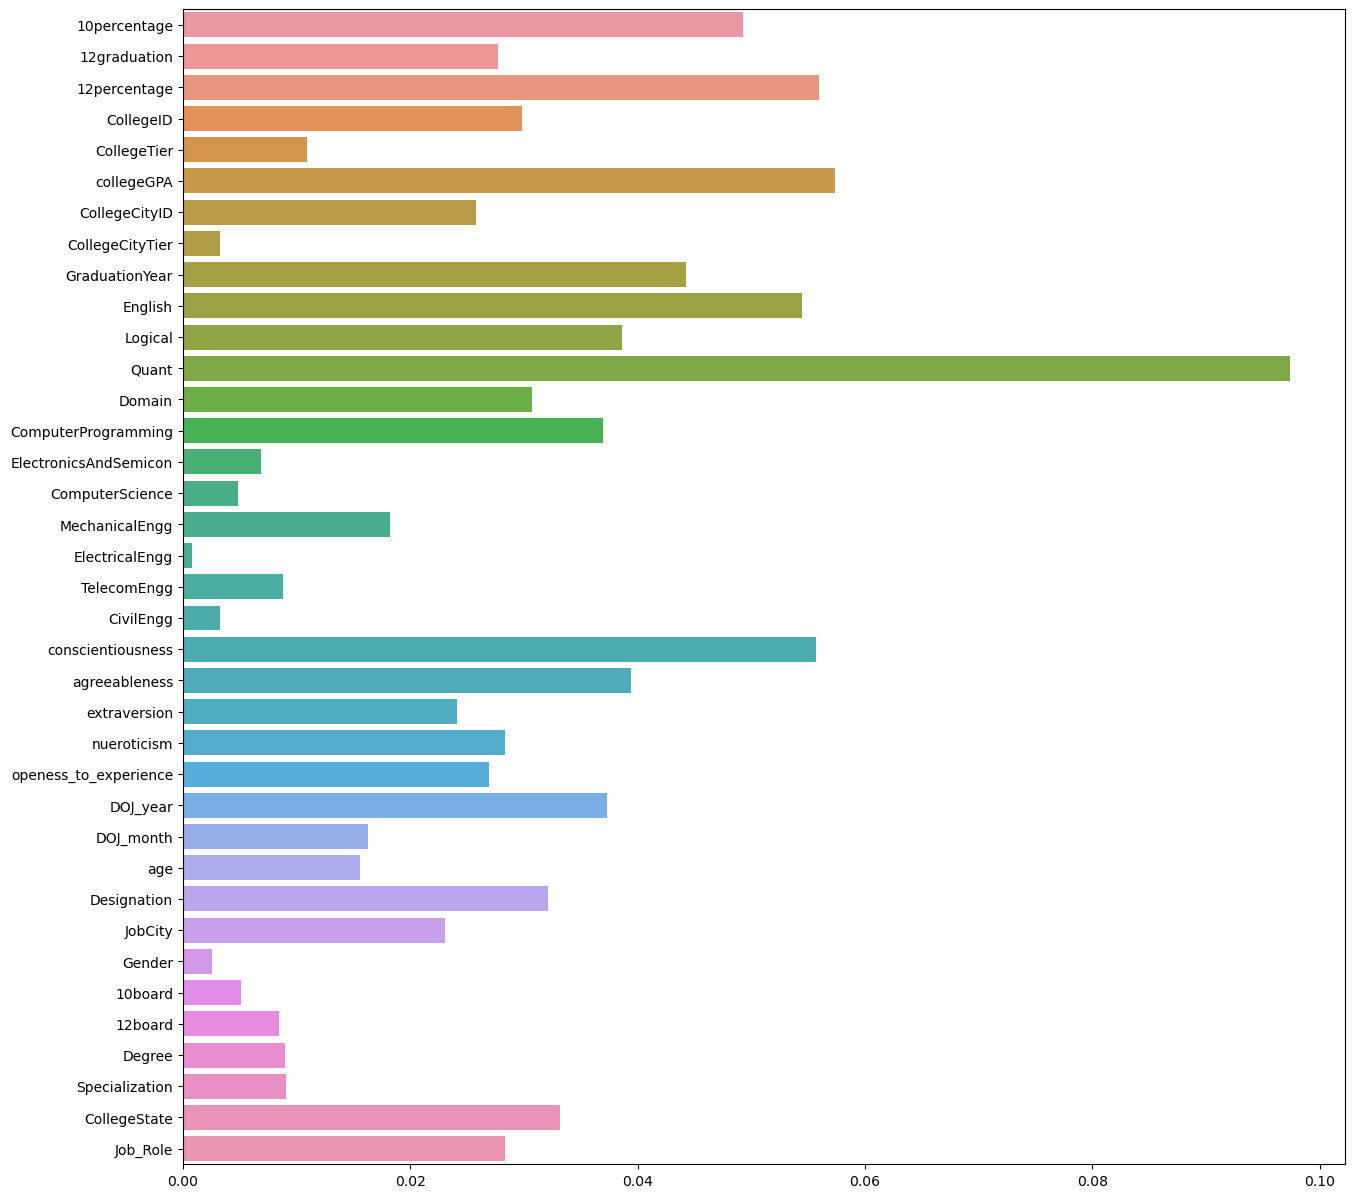

In [301]:
plt.figure(figsize=(15,15))

sns.barplot(x=regressor.feature_importances_, y=X_train_transformed.columns)

plt.show()


### conclusion : looks like all features have some importance . lets check some statistical tests 

## ANOVA for Feature Selection

In [302]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X_train_transformed' is your feature-engineered DataFrame
# and 'y_train' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)

# Create a pipeline with SelectKBest, and a regressor (e.g., Linear Regression)
pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_regression, k='all')),  # Use f_regression for regression
    ('regressor', LinearRegression())  # You can replace LinearRegression with any regressor of your choice
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get feature scores
feature_scores = pipeline.named_steps['selector'].scores_

# Print feature scores
print("Feature Scores:", feature_scores)



Mean Squared Error: 28672285735.84559
Feature Scores: [7.39977955e+01 6.45570561e+01 7.24978611e+01 5.16014405e+01
 8.31322262e+01 5.76277554e+01 5.16014405e+01 1.24819934e-01
 9.74888169e+01 8.73546768e+01 7.50713320e+01 1.65829899e+02
 2.63171004e+01 3.25548575e+01 1.85429562e-01 2.99168455e+01
 1.98017269e+00 6.15218226e+00 9.82205413e-01 2.62969089e+00
 1.95419263e+01 6.09664692e+00 1.40237295e-03 9.22330244e+00
 2.83396404e+00 1.13069423e+02 5.08084861e+00 4.68880422e+01
 3.28661851e+00 2.65299164e+00 6.92931770e+00 2.34556045e+01
 1.83519951e+01 2.70217287e-02 3.40670494e-01 1.90985162e+01
 1.84198913e+01]


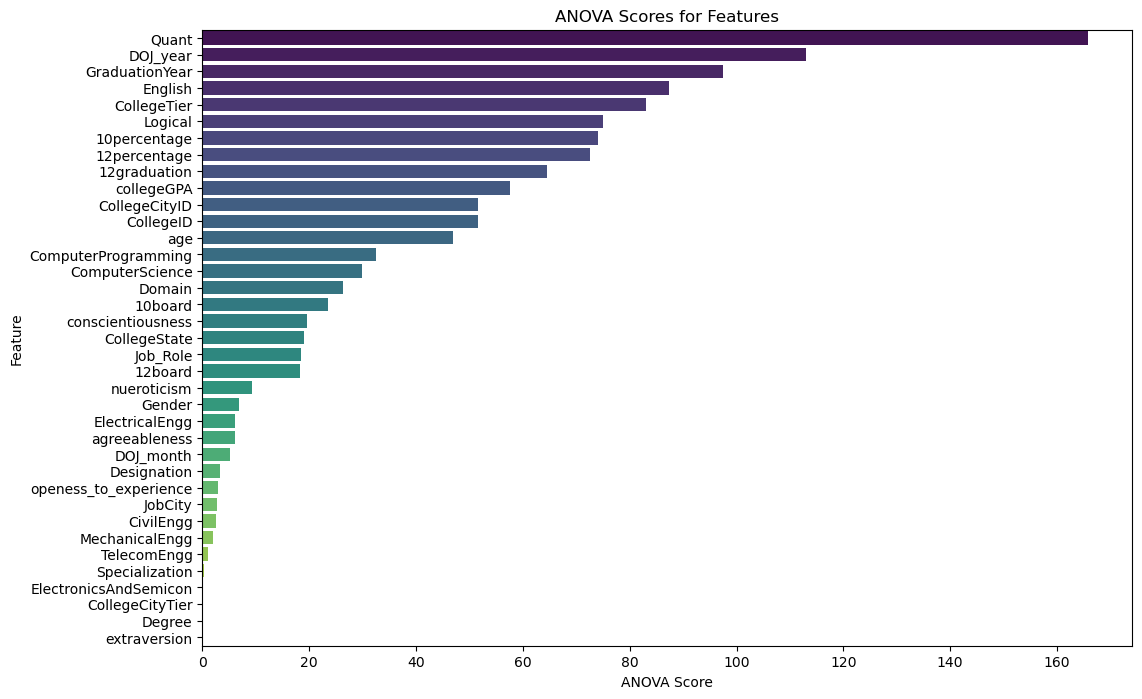

In [303]:
# Get the ANOVA scores and feature names
anova_scores = feature_scores
feature_names = X_train_transformed.columns

# Create a DataFrame for easier plotting
anova_df = pd.DataFrame({'Feature': feature_names, 'ANOVA Score': anova_scores})

# Sort the DataFrame by ANOVA scores in descending order
anova_df = anova_df.sort_values(by='ANOVA Score', ascending=False)

# Plot the ANOVA scores
plt.figure(figsize=(12, 8))
sns.barplot(x='ANOVA Score', y='Feature', data=anova_df, palette='viridis')
plt.title("ANOVA Scores for Features")
plt.xlabel("ANOVA Score")
plt.ylabel("Feature")
plt.show()

### note : looks like Specialization,ElectronicsAndSemicon,CollegeCityTier,Degree,extraversion are bad features for target variable(Salary). but we have to see if they have relationship with other features .

In [304]:
df = pd.read_csv('cleaned_df.csv')
df.head()

Unnamed: 0     Salary               Designation    JobCity Gender  \
0           0   420000.0   senior quality engineer  bangalore      f   
1           1   500000.0         assistant manager     indore      m   
2           2   325000.0          systems engineer    chennai      f   
3           3  1100000.0  senior software engineer    gurgaon      m   
4           4   200000.0                       get    manesar      m   

   10percentage      10board  12graduation  12percentage      12board  \
0          84.3  state borad          2007          95.8  state board   
1          85.4         cbse          2007          85.0         cbse   
2          85.0         cbse          2010          68.2         cbse   
3          85.6         cbse          2007          83.6         cbse   
4          78.0         cbse          2008          76.8         cbse   

   CollegeID  CollegeTier       Degree Specialization  collegeGPA  \
0       1141            2  B.Tech/B.E.            cse       78.00   
1       5807            2  B.Tech/B.E.            ece       70.06   
2         64            2  B.Tech/B.E.             it       70.00   
3       6920            1  B.Tech/B.E.            cse       74.64   
4      11368            2  B.Tech/B.E.            ece       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                      0   
1      610    780  0.960603                    0                    466   
2      545    370  0.450877                  395                      0   
3      585    625  0.974396                  615                      0   
4      625    465  0.124502                    0                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                0               0               0            0          0   
1                0               0               0            0          0   
2                0               0               0            0          0   
3                0               0               0            0          0   
4                0               0               0            0          0   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  DOJ_year  DOJ_month  age           Job_Role  
0                -0.4455      2012          6   34   Quality Engineer  
1                 0.8637      2013          9   34            Manager  
2                 0.6721      2014          6   31    System Engineer  
3                -0.9194      2011          7   34  Software Engineer  
4                -0.1295      2014          3   32              Other

In [305]:
# Using 'del' statement to remove a specific column in-place
del df['Unnamed: 0']


## Univariate Analysis

## Salary

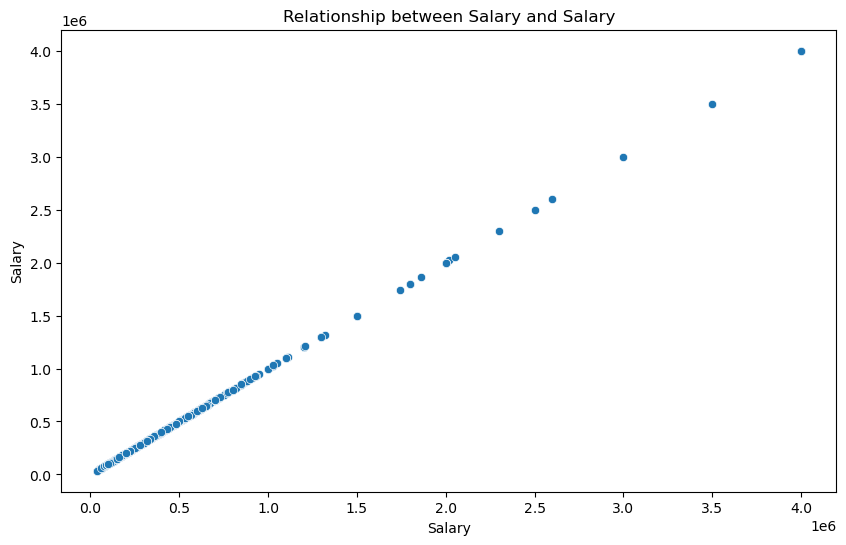

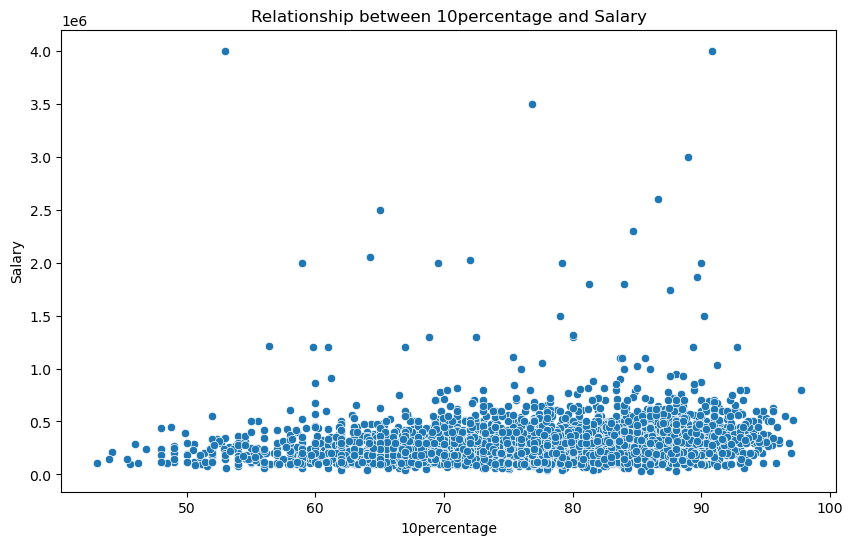

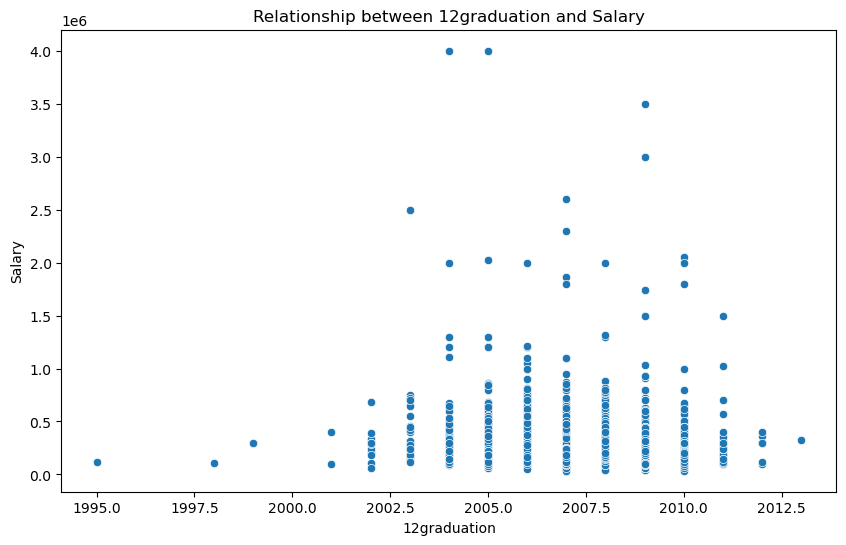

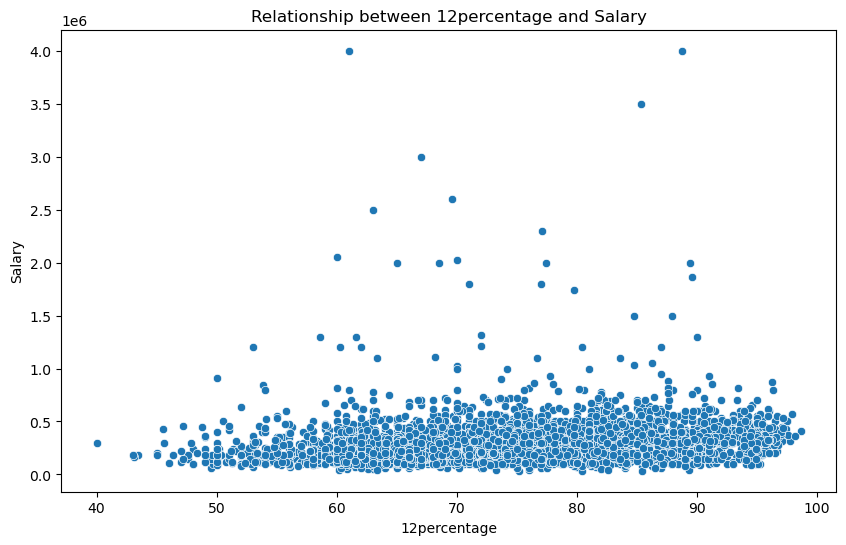

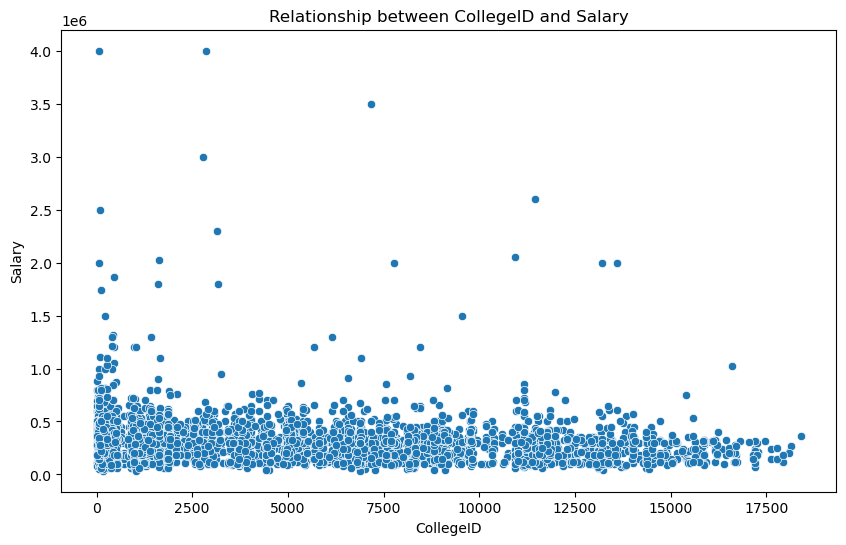

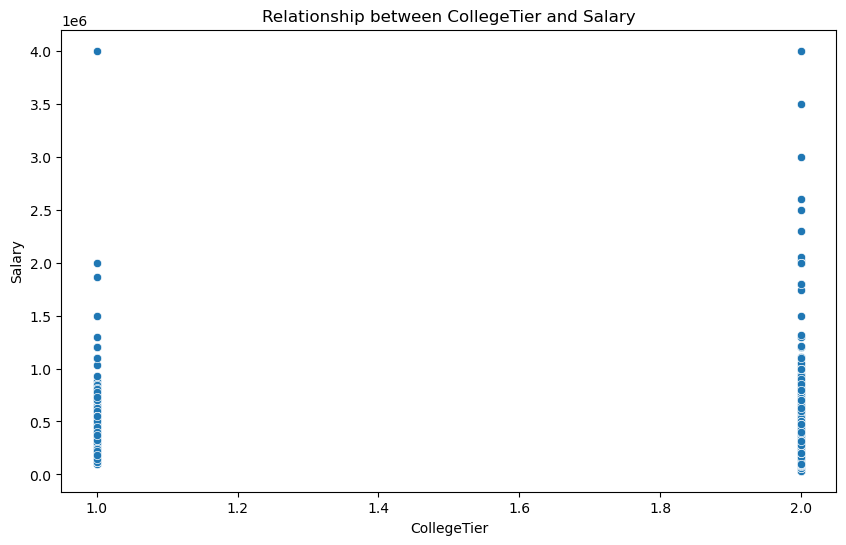

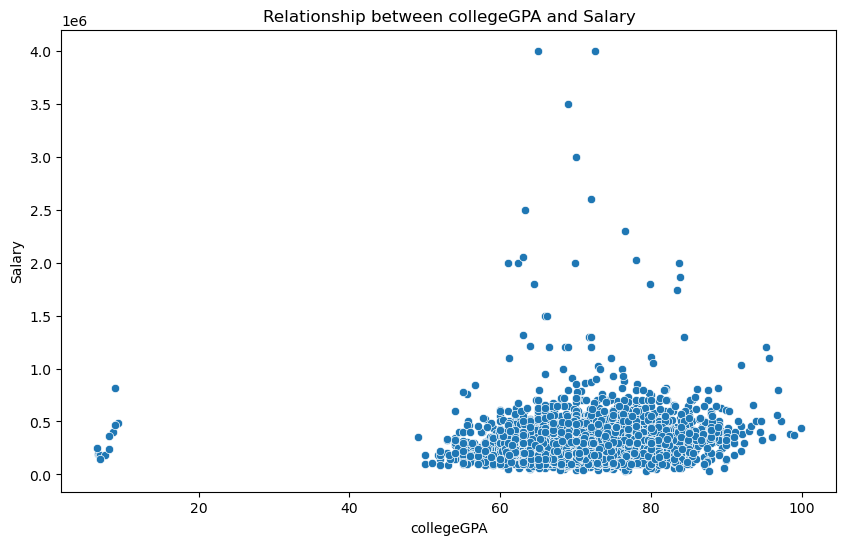

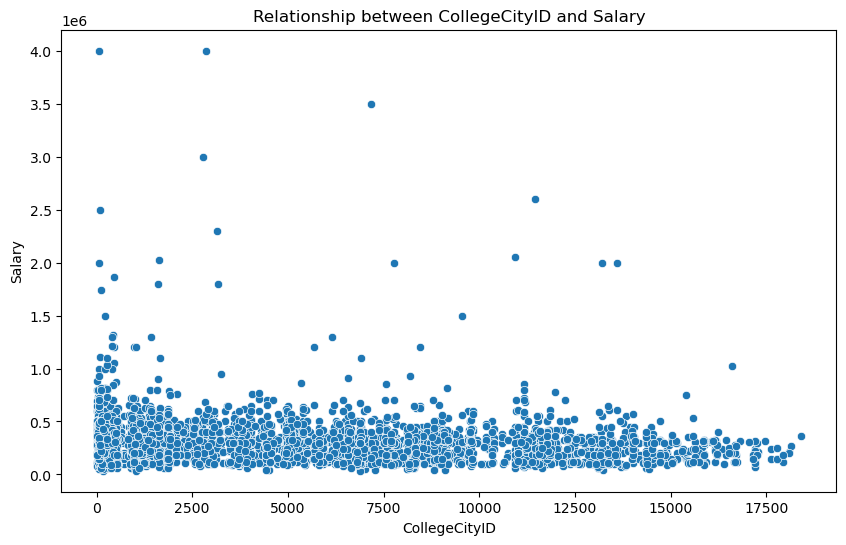

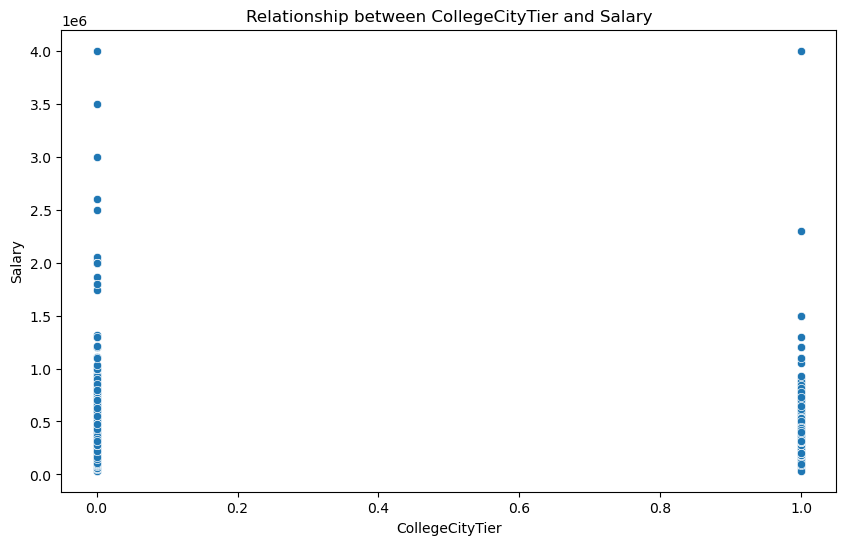

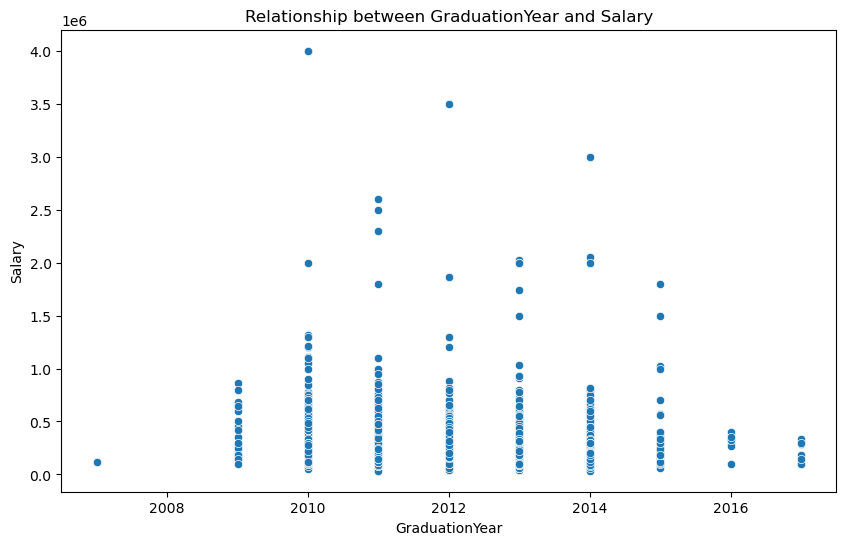

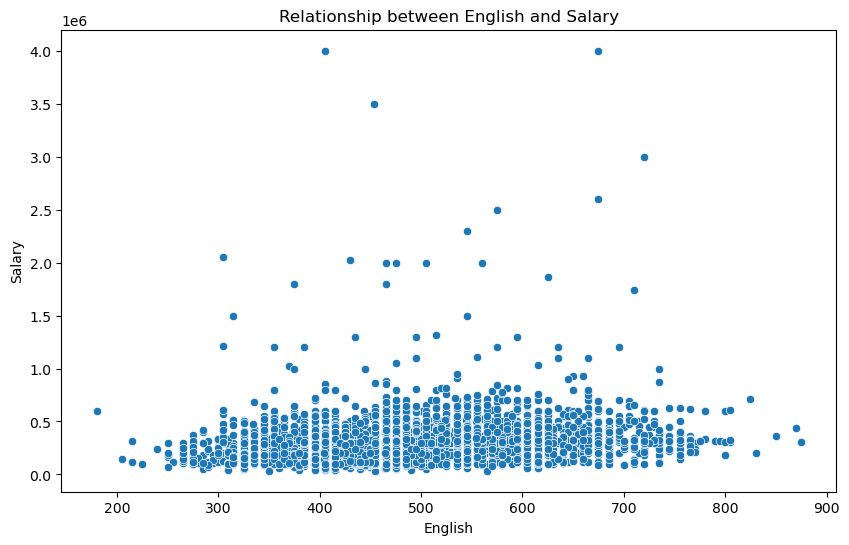

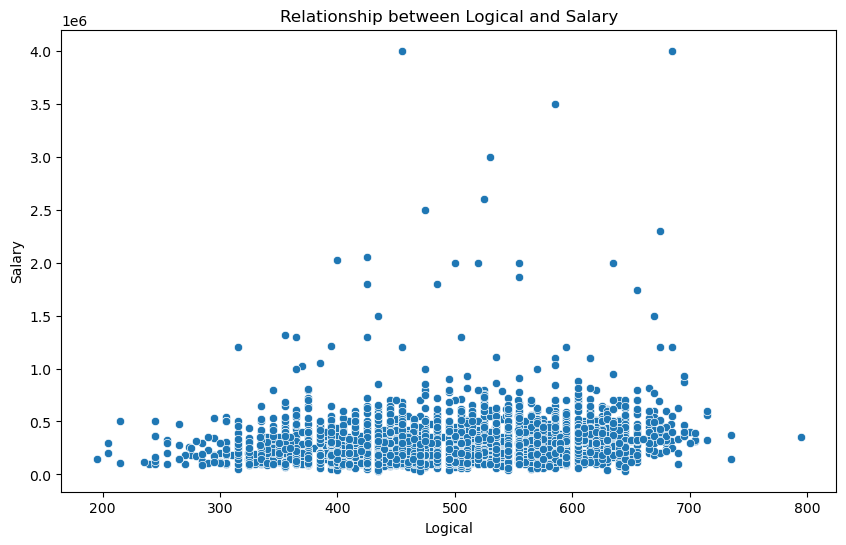

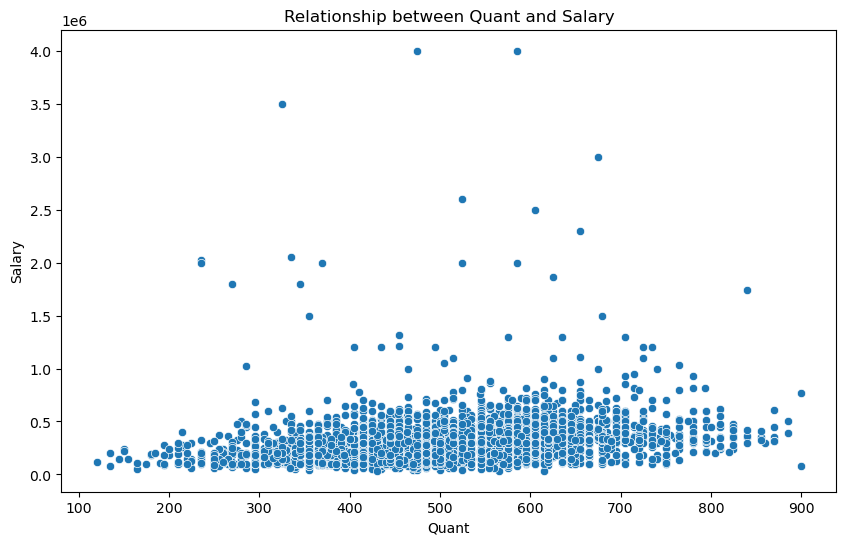

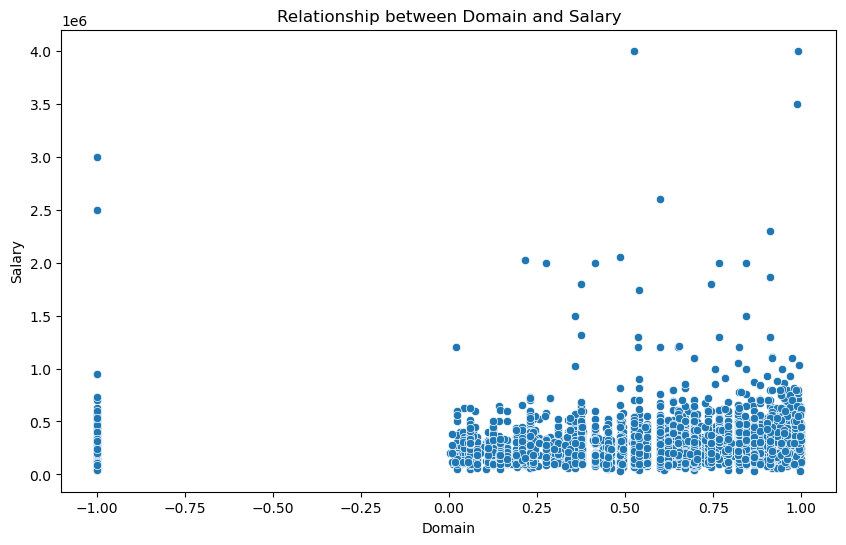

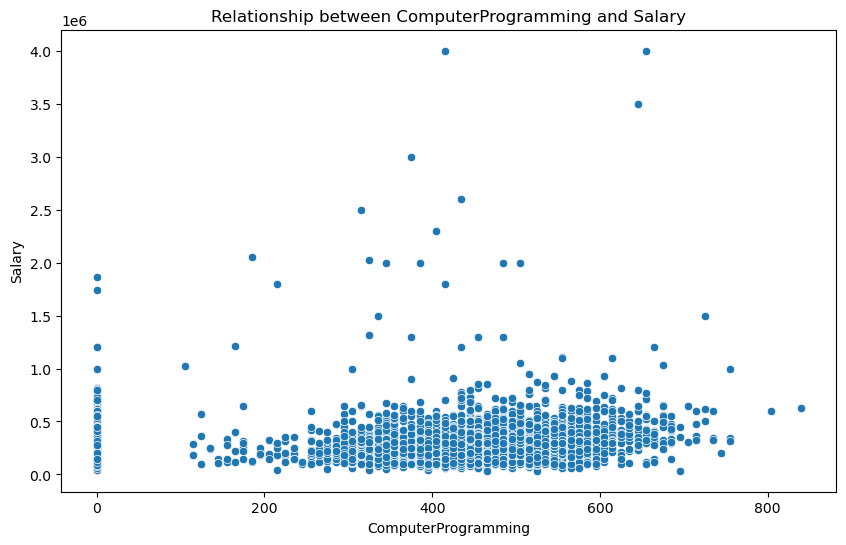

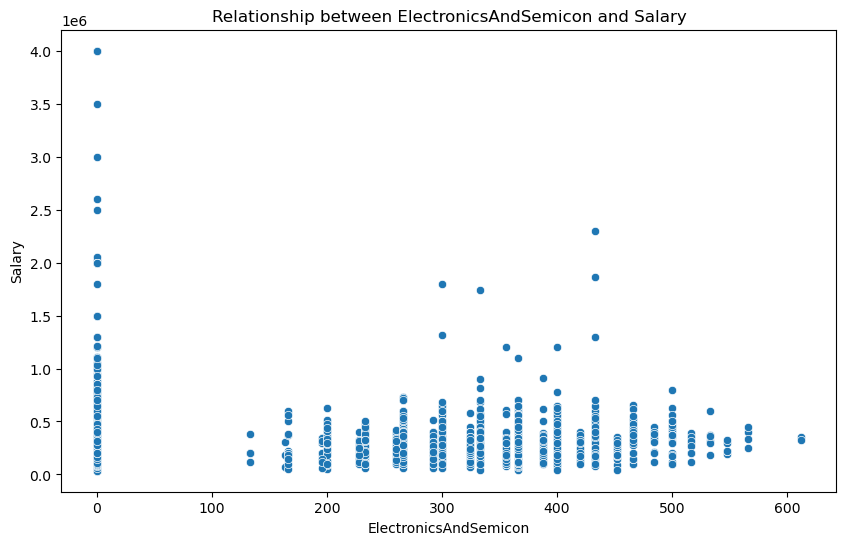

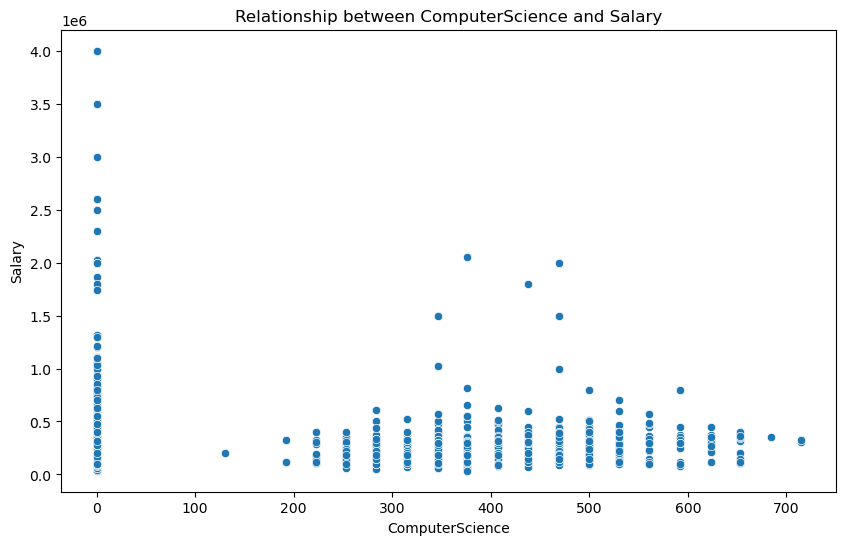

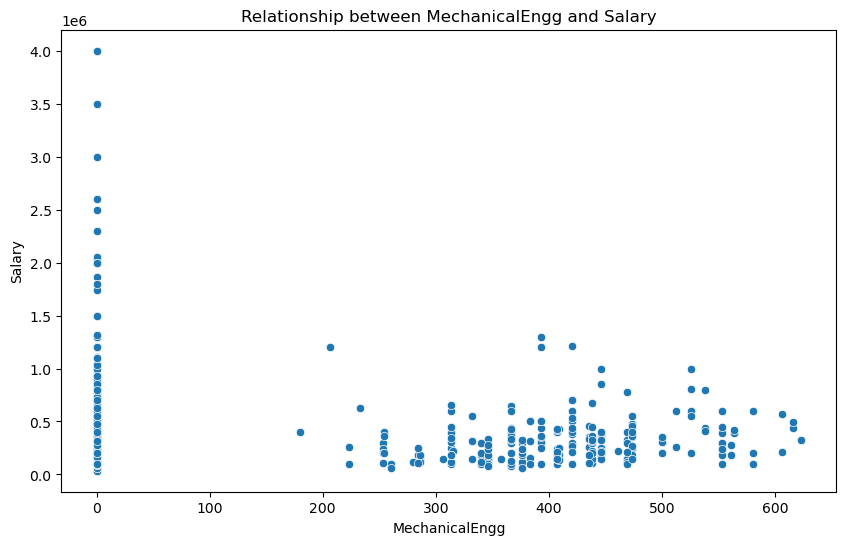

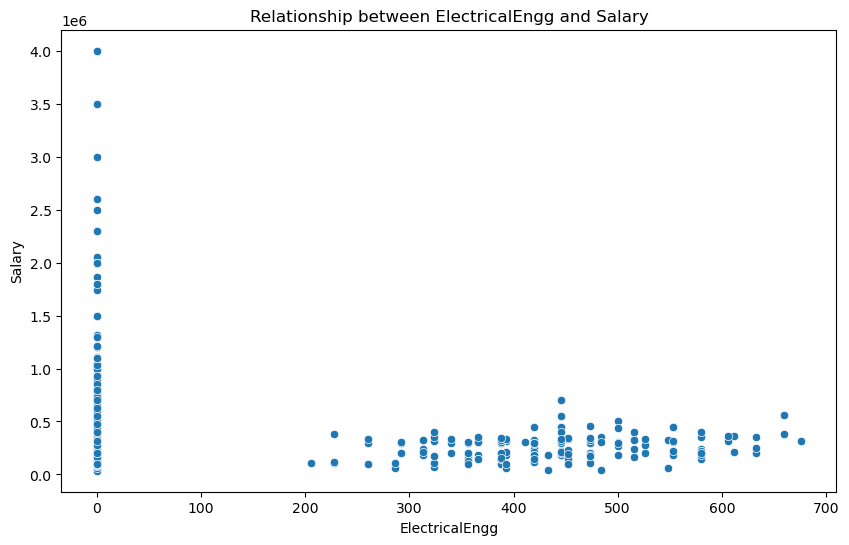

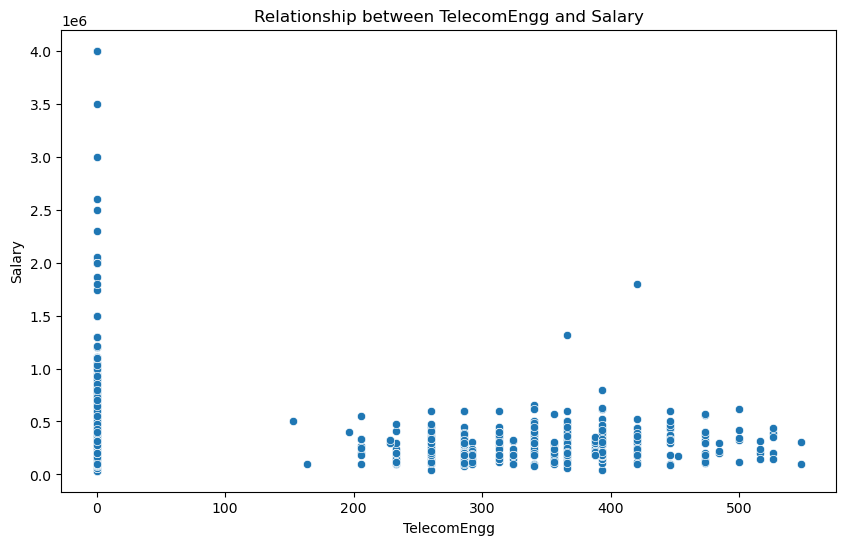

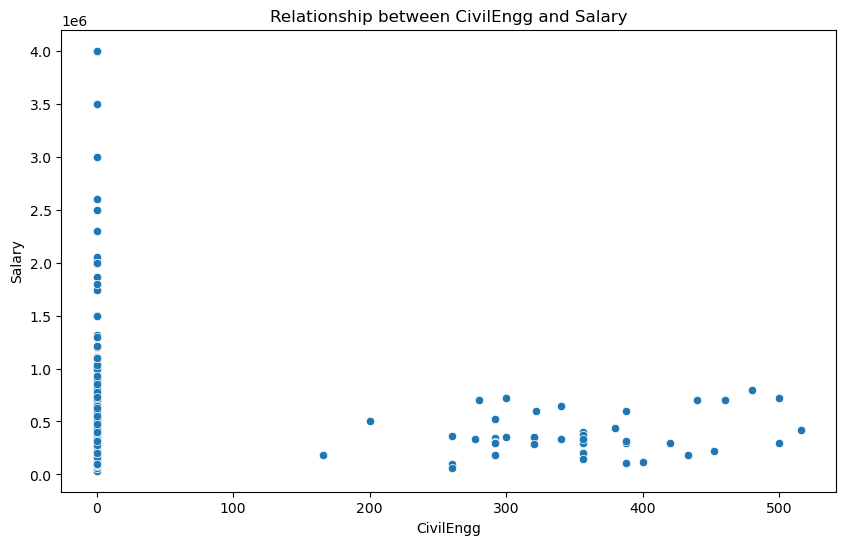

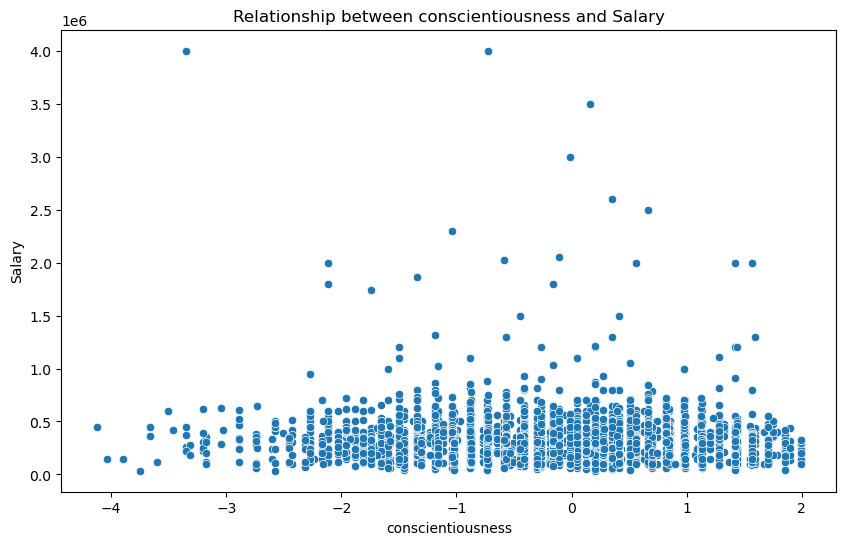

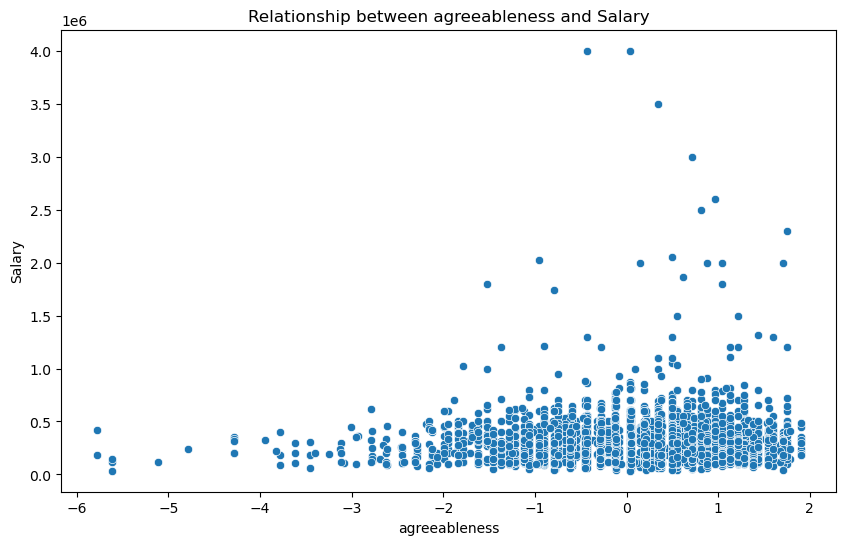

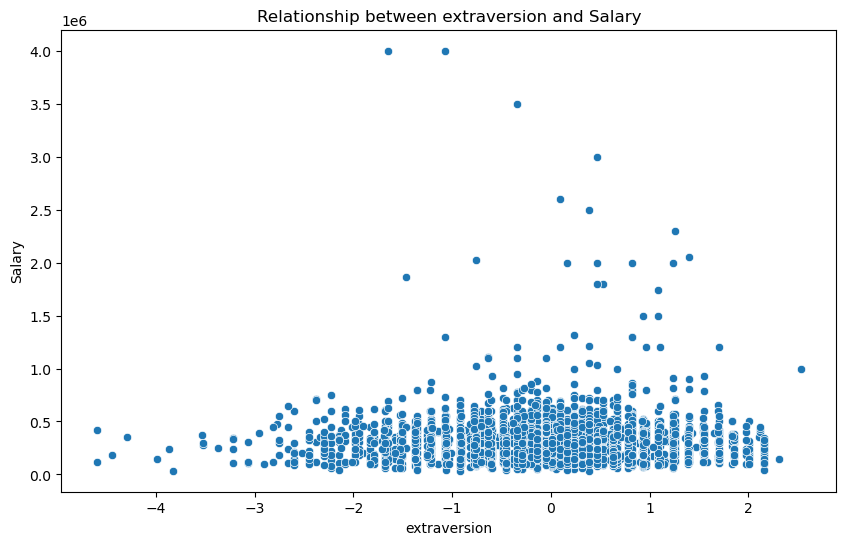

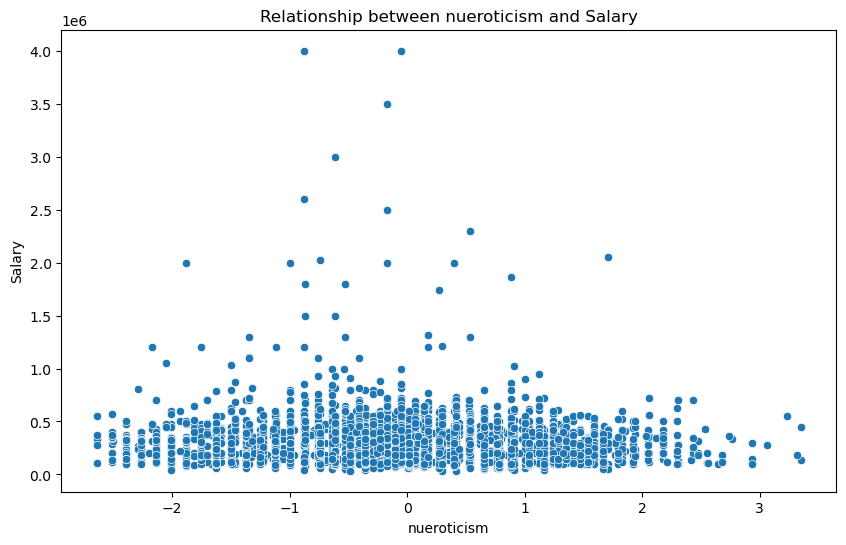

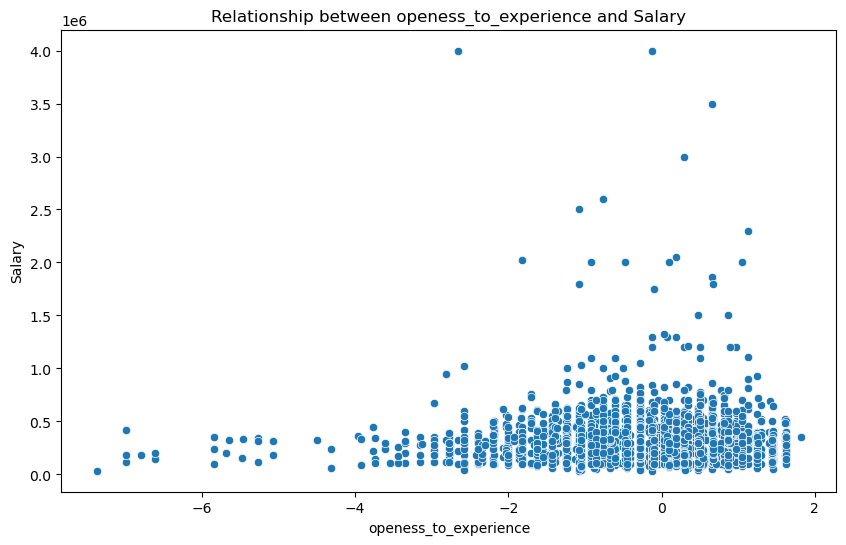

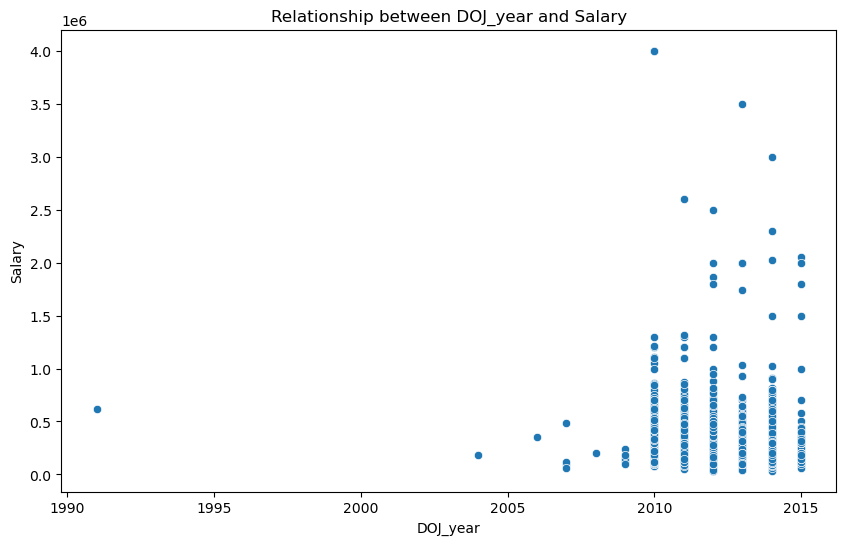

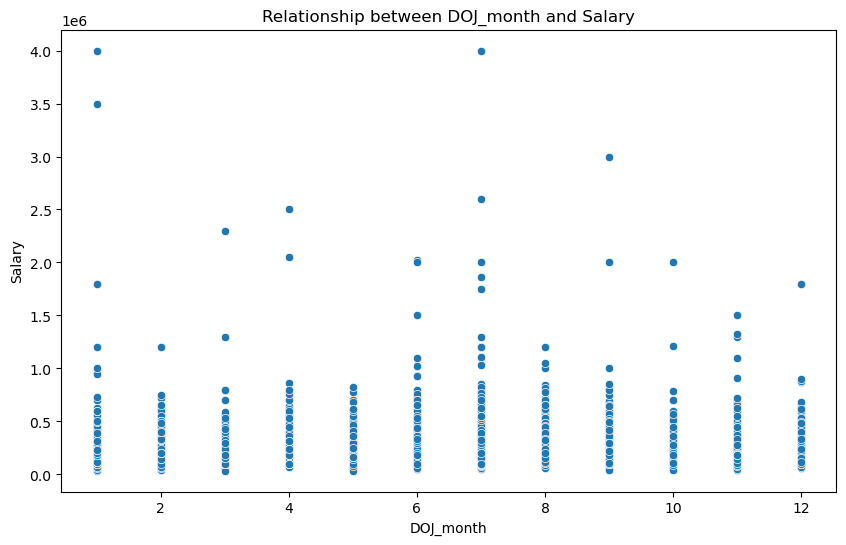

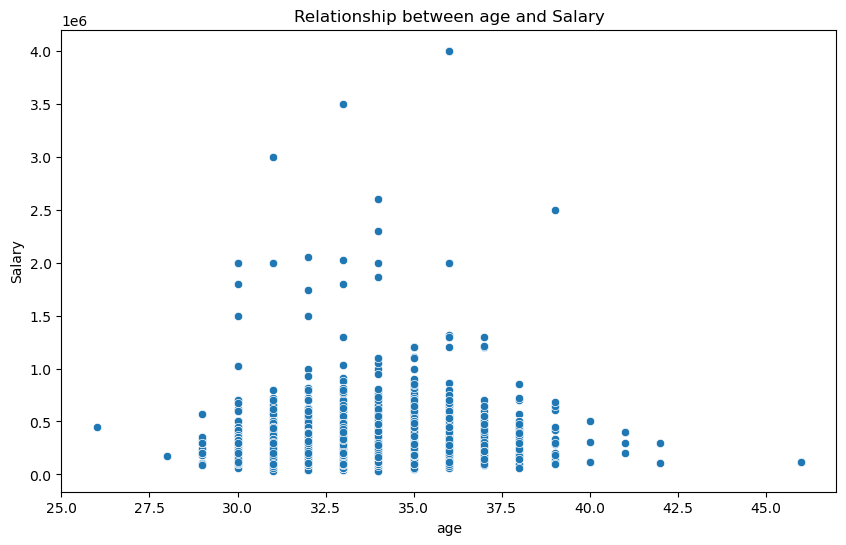

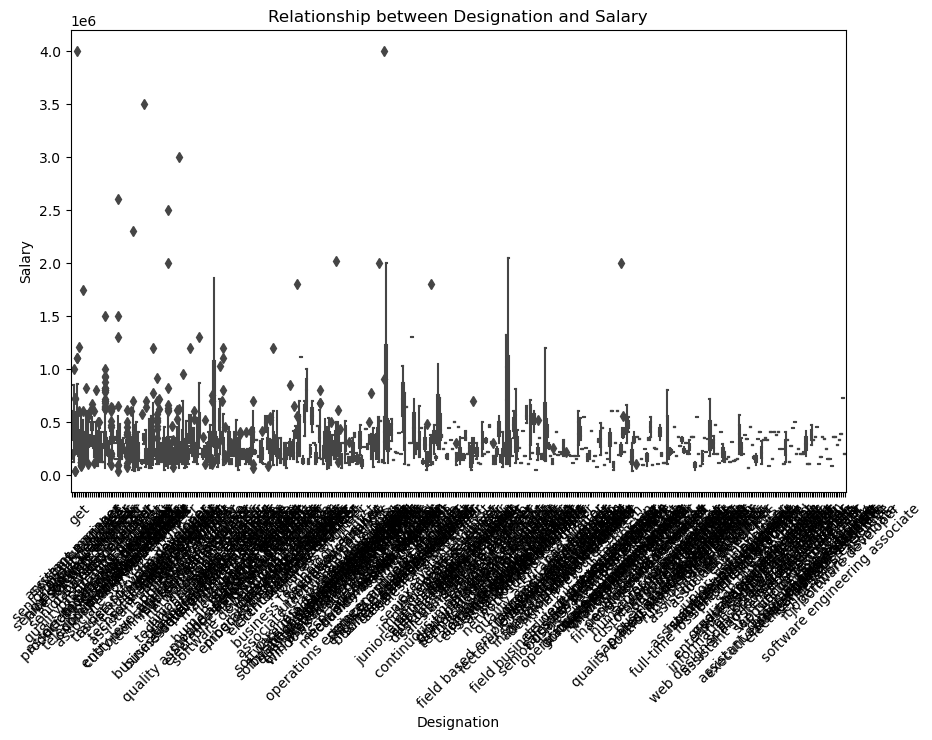

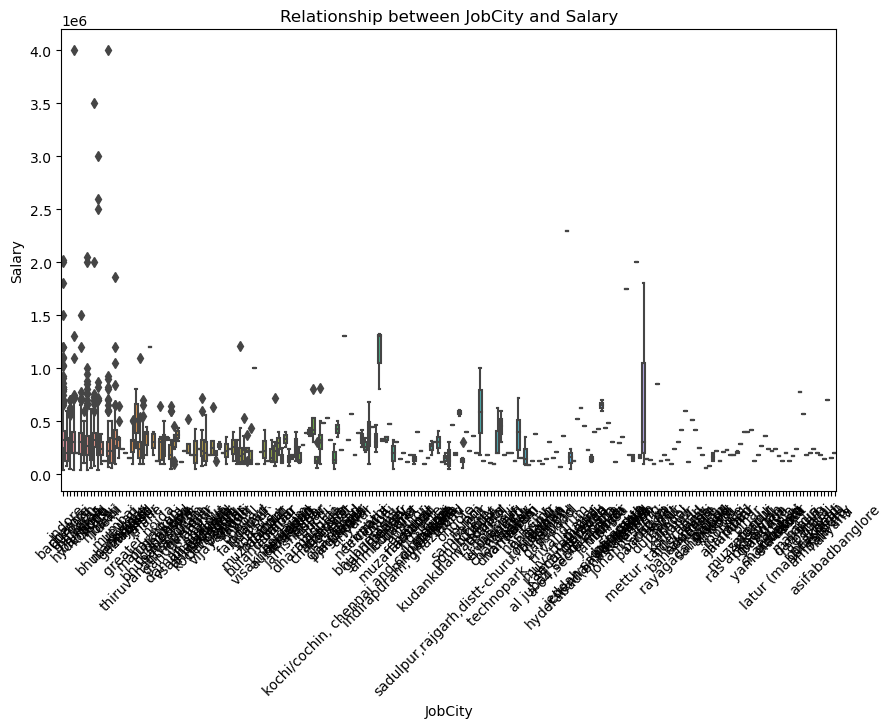

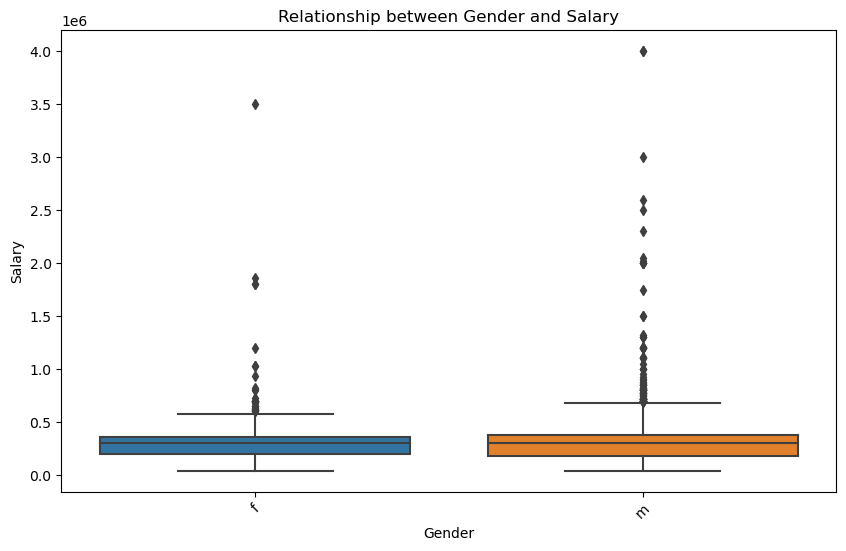

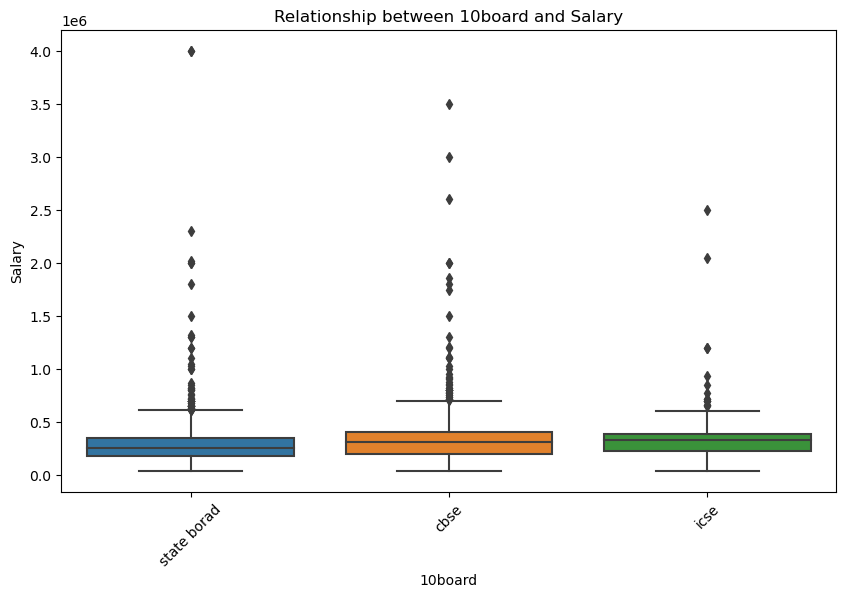

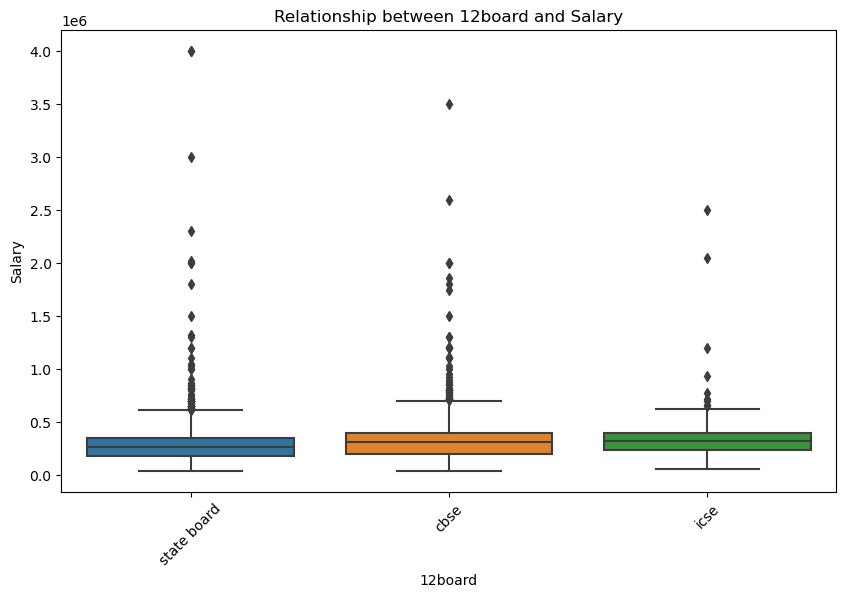

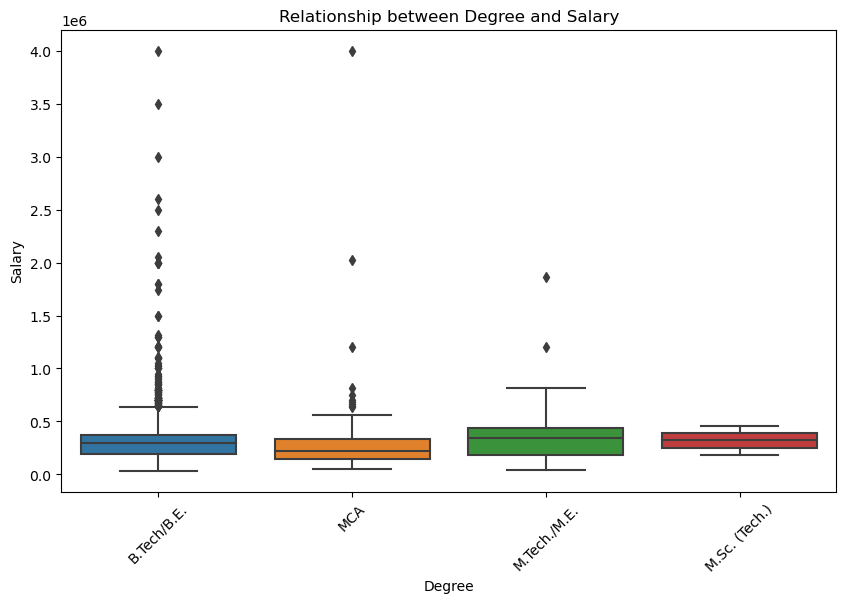

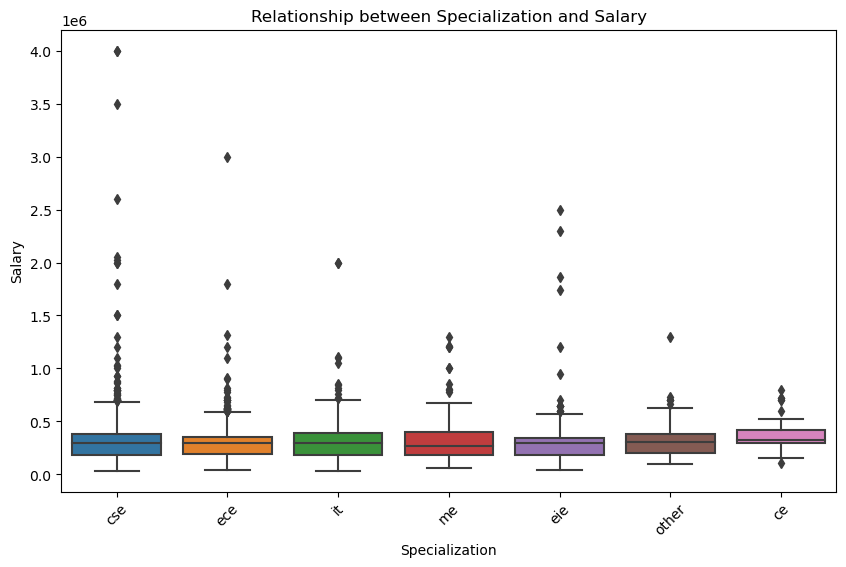

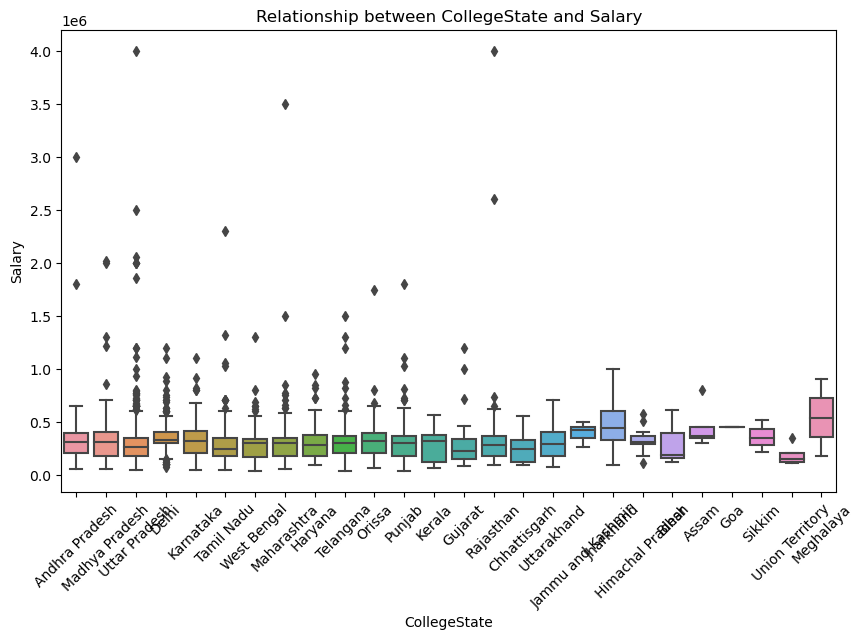

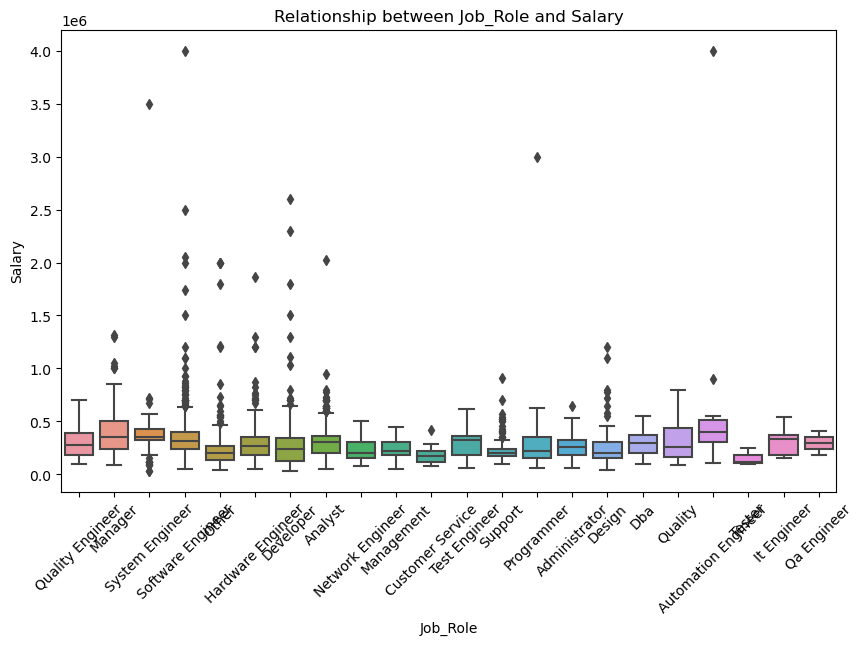

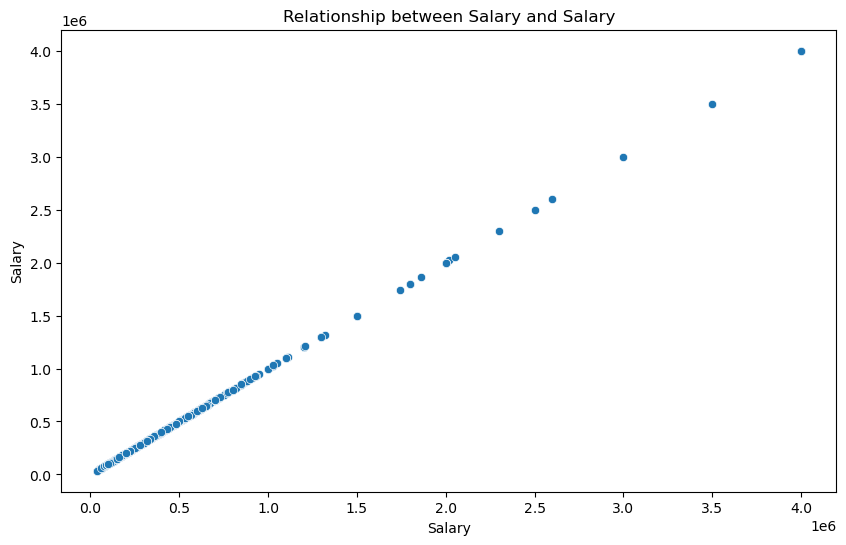

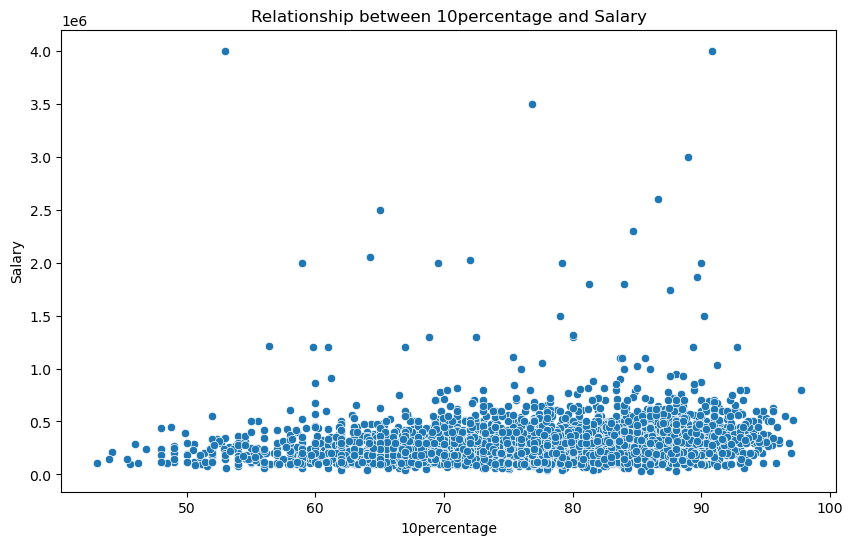

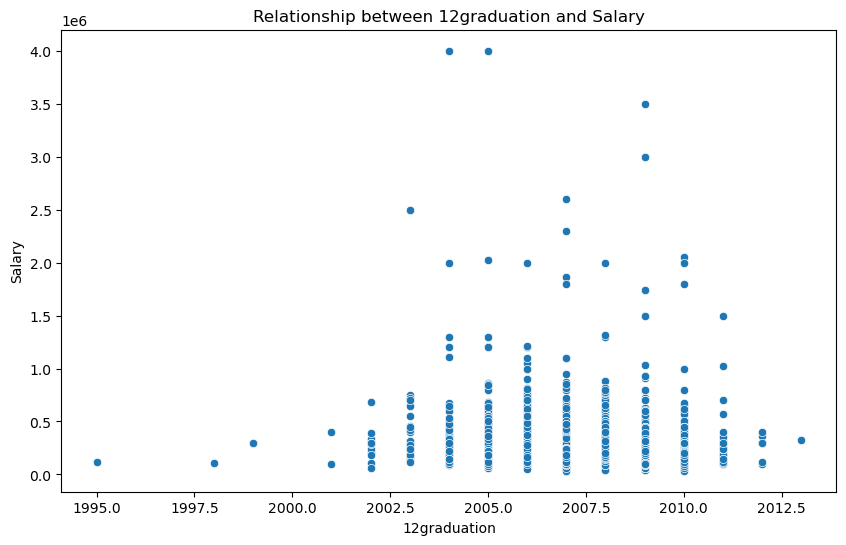

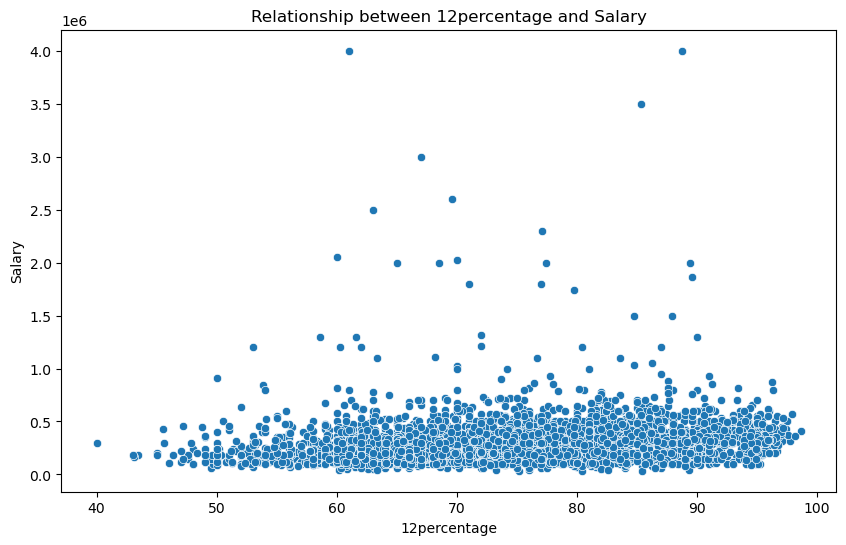

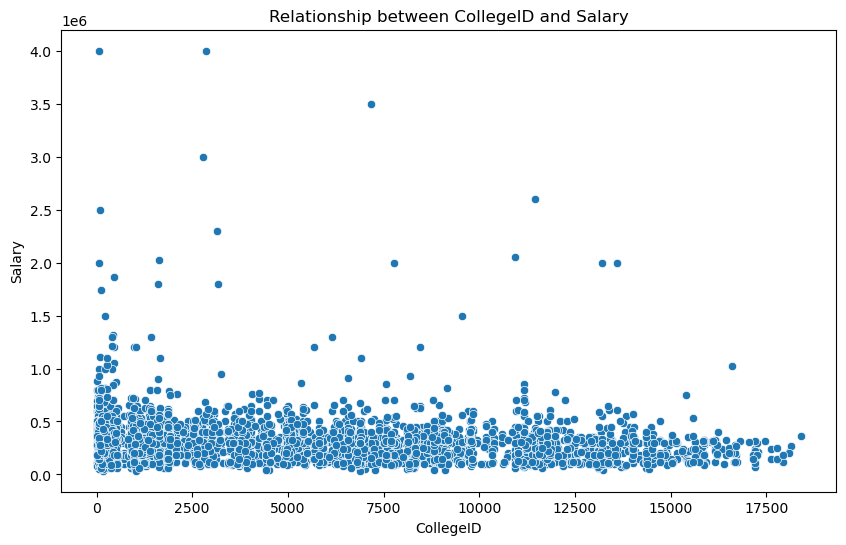

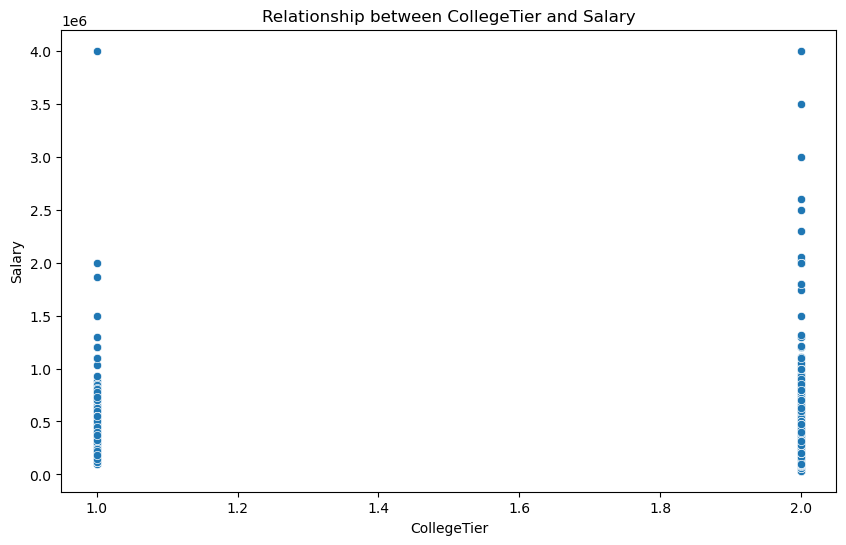

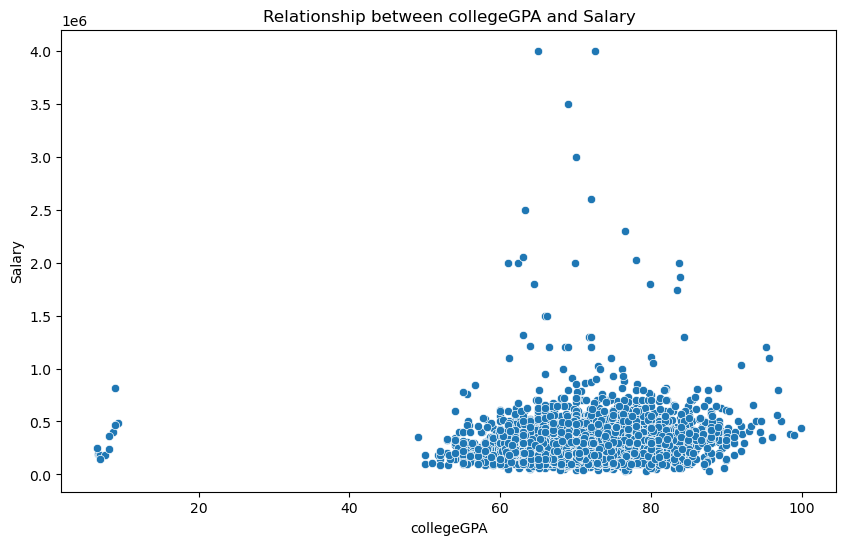

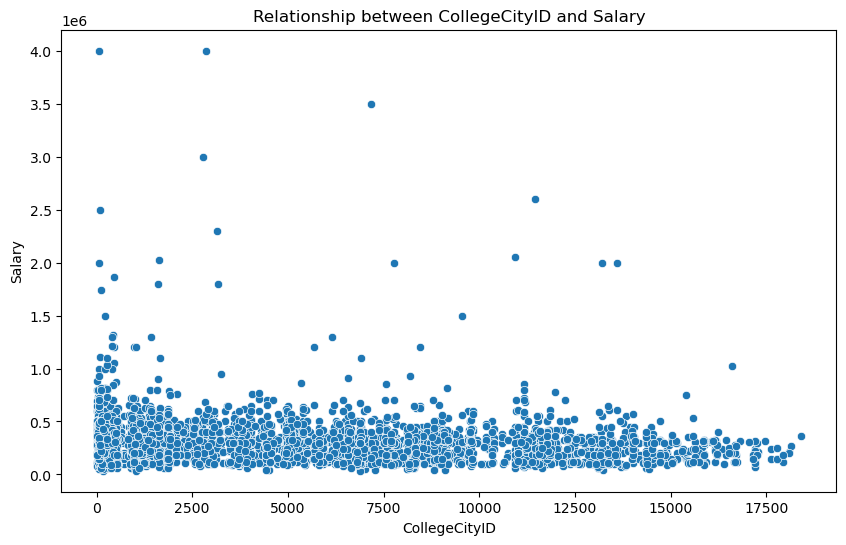

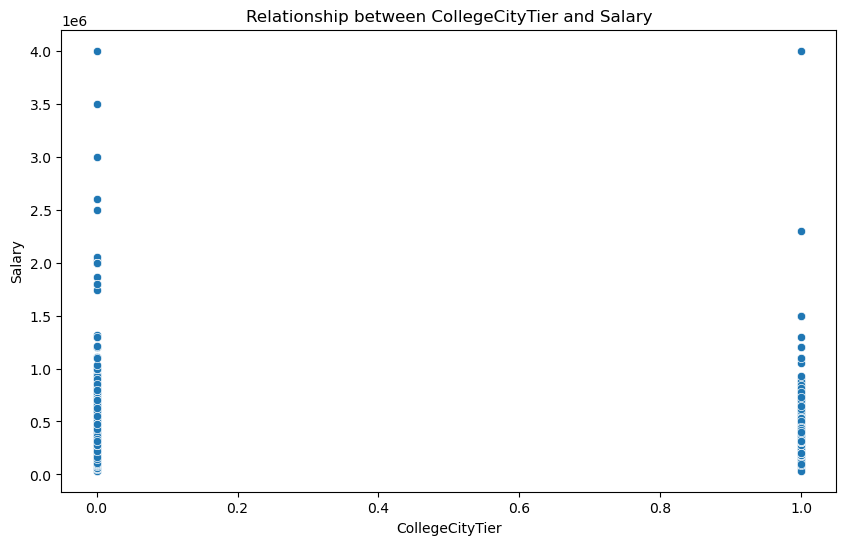

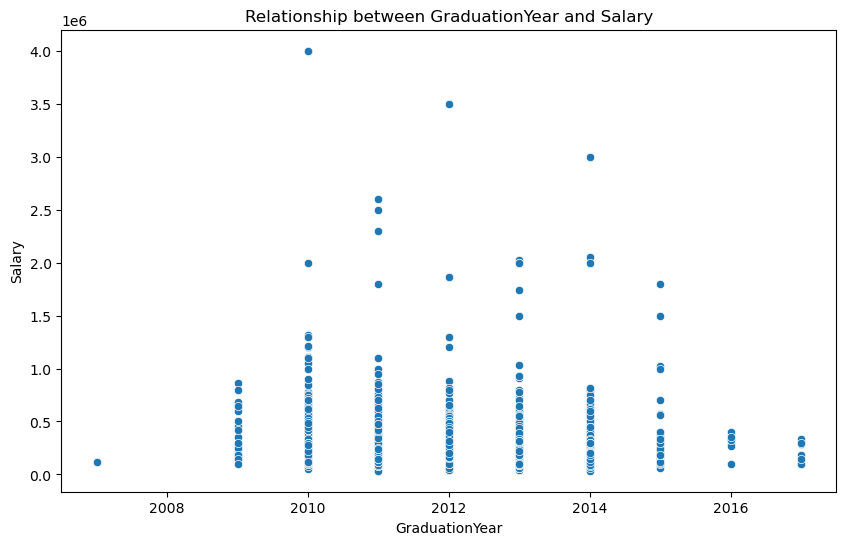

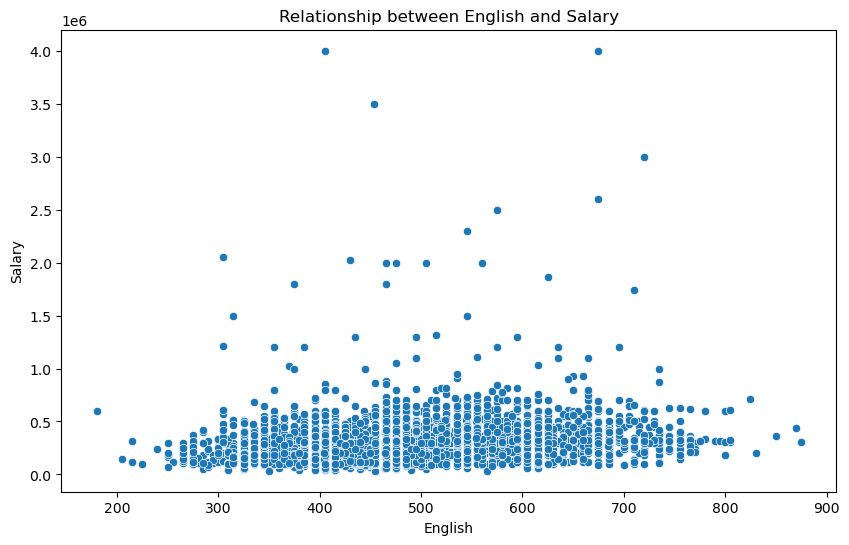

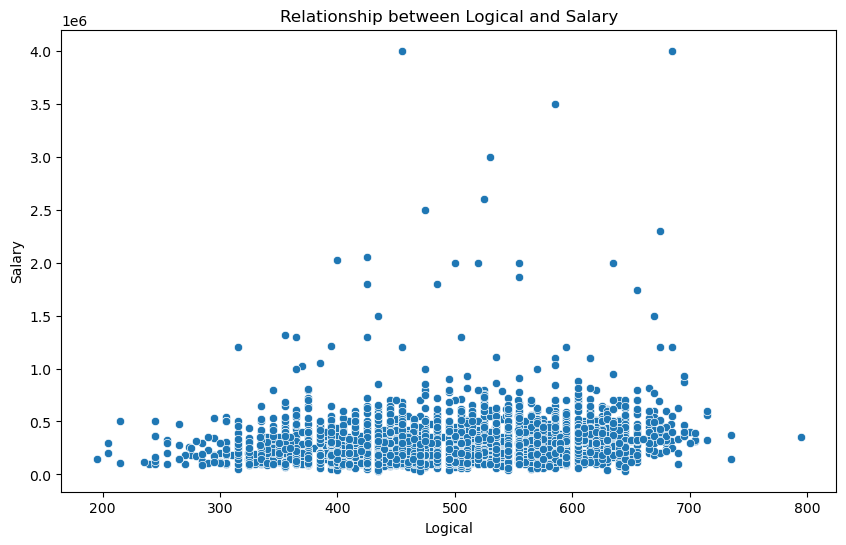

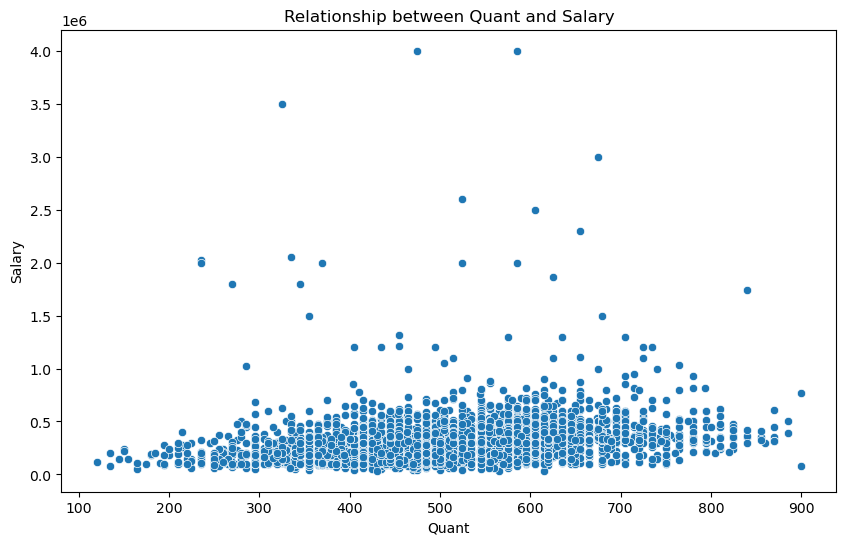

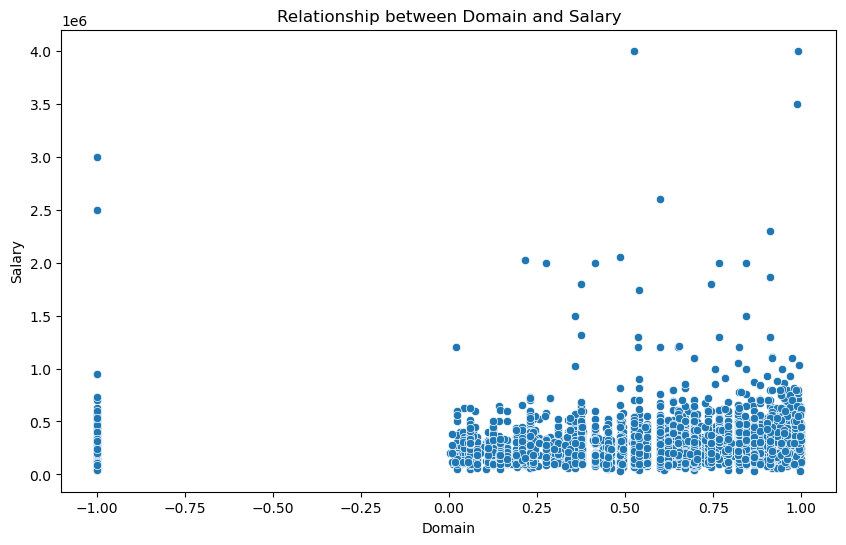

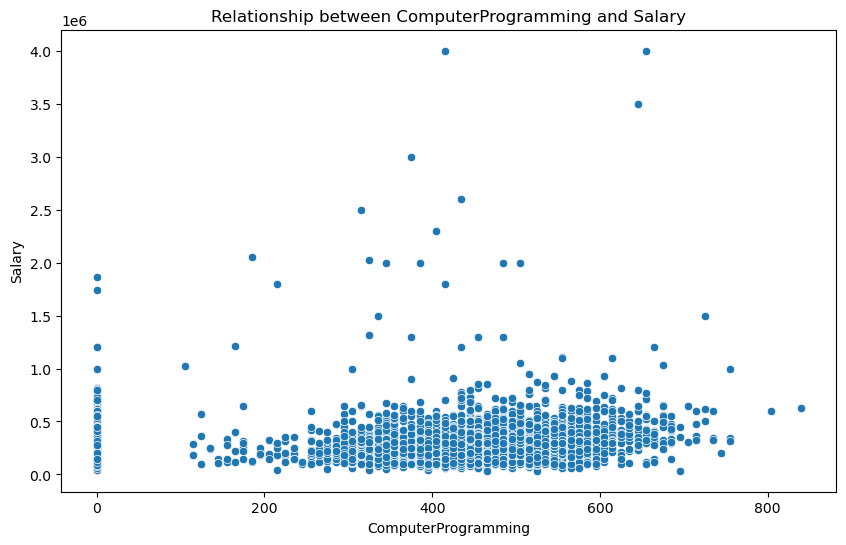

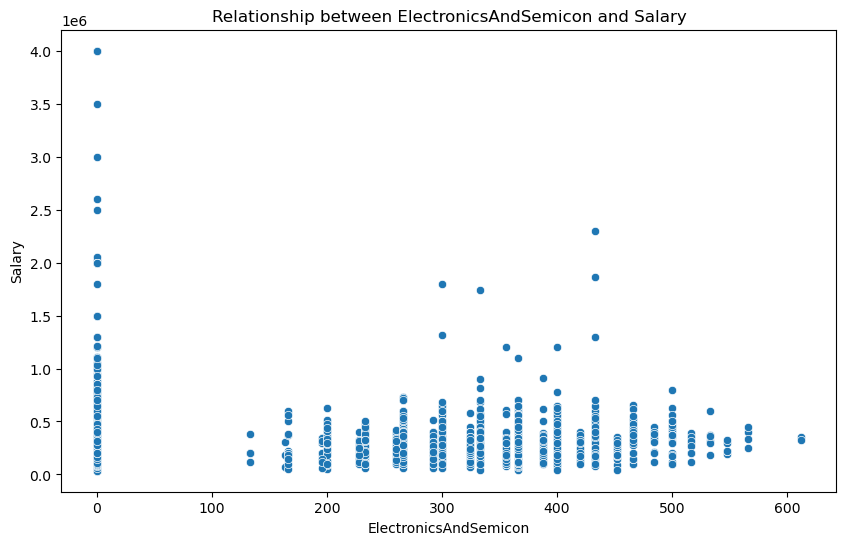

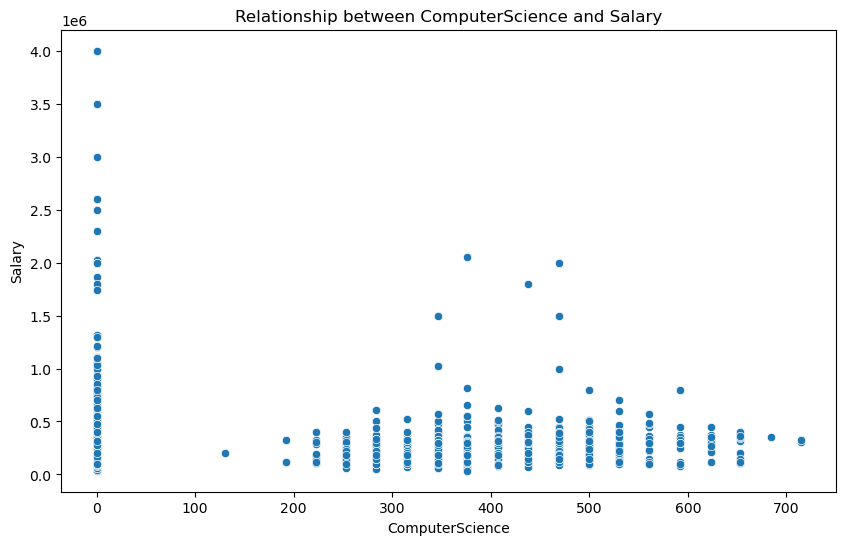

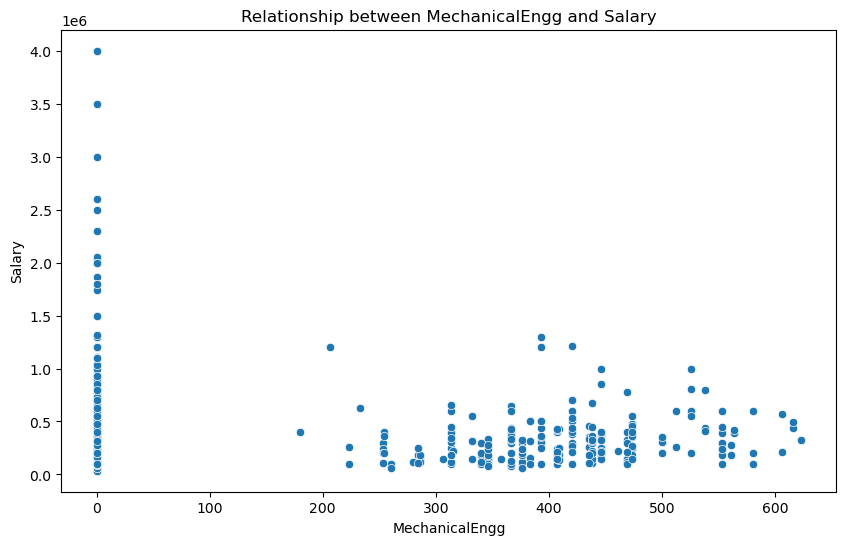

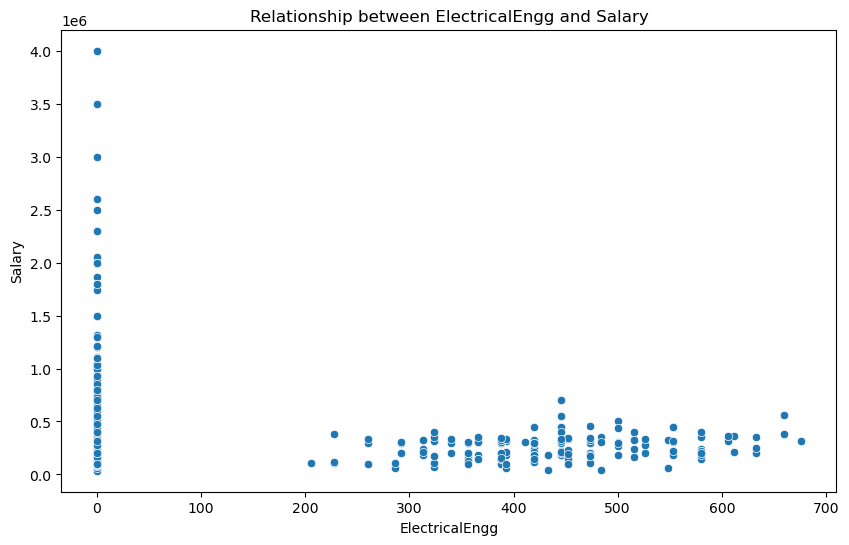

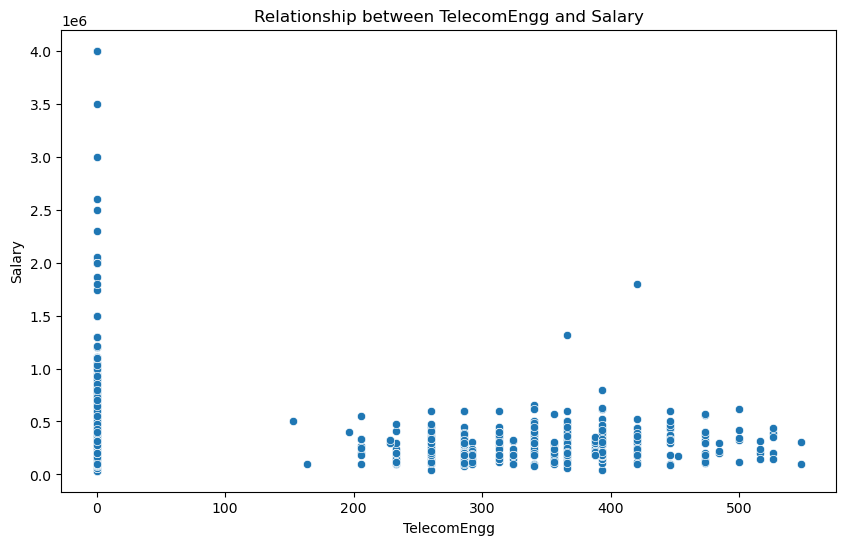

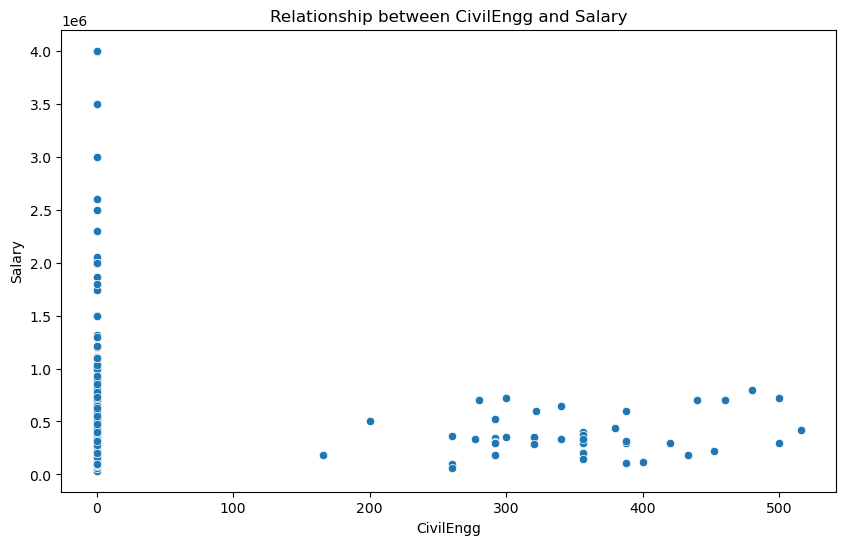

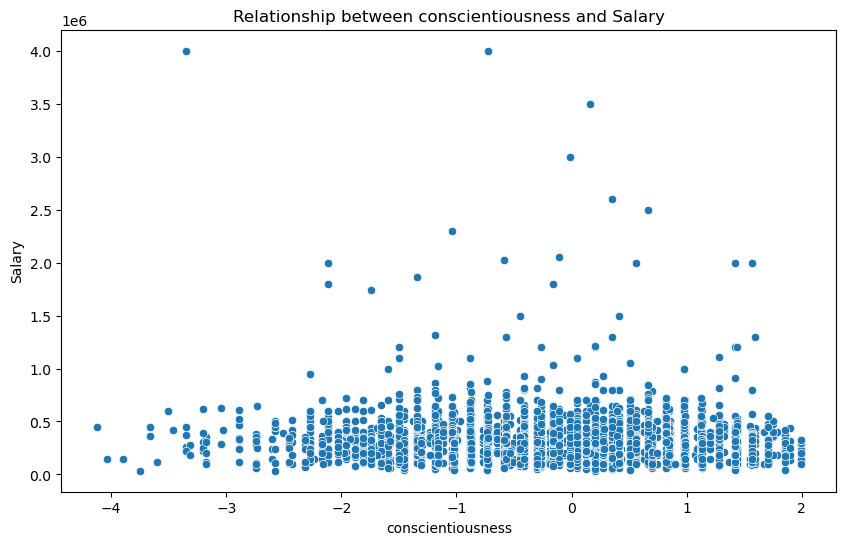

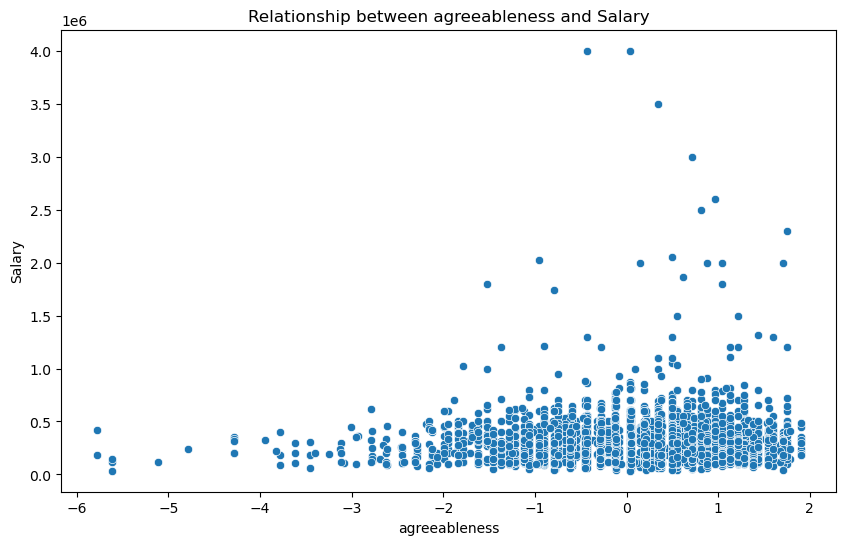

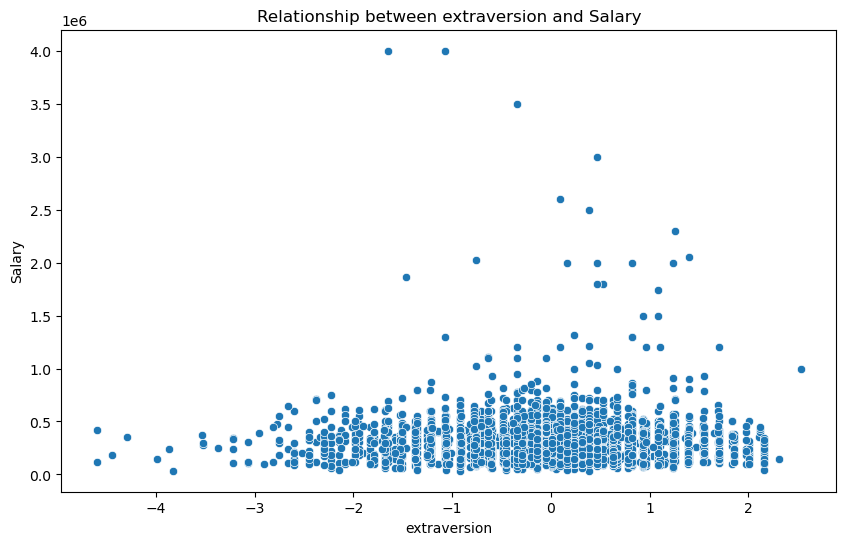

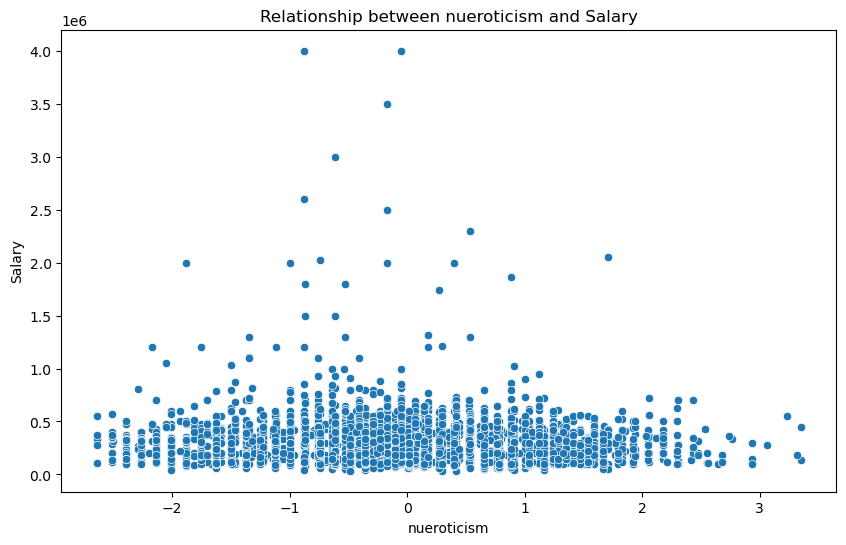

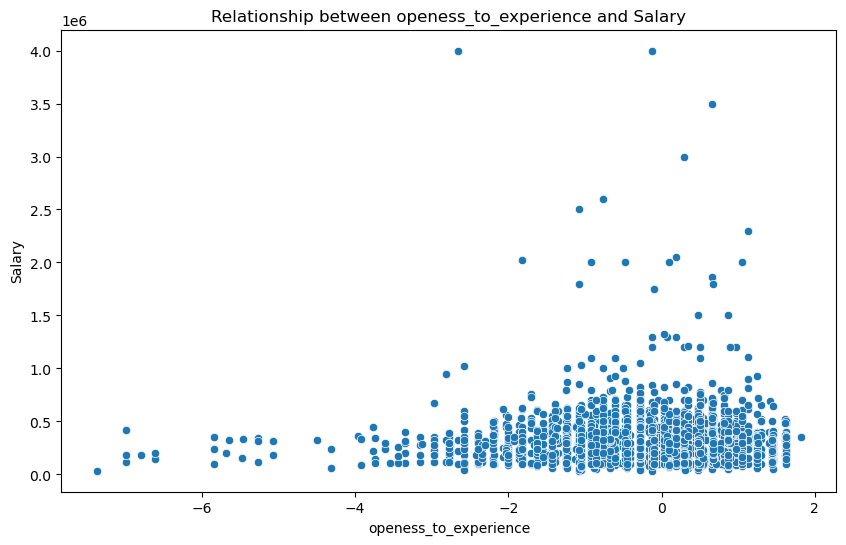

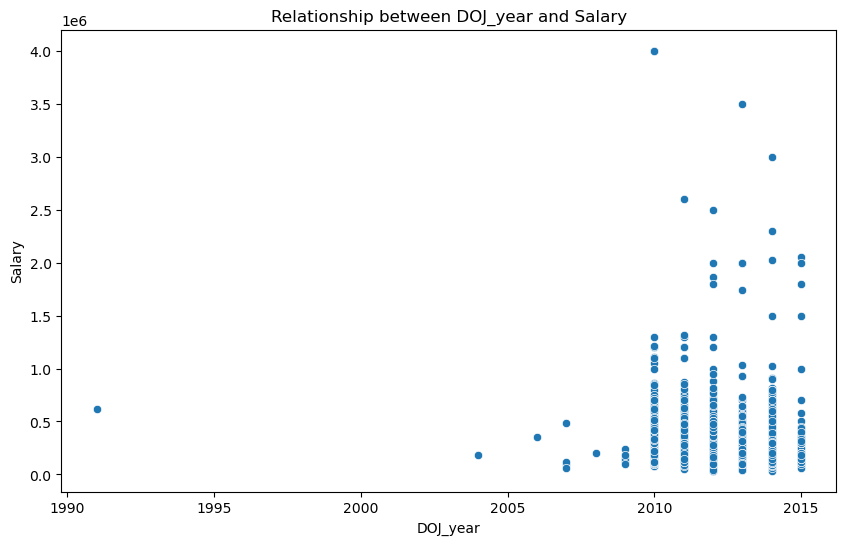

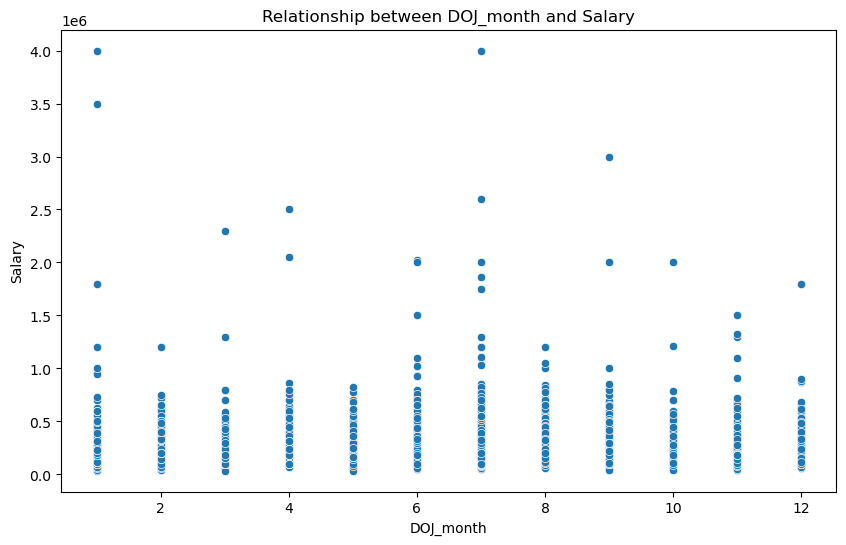

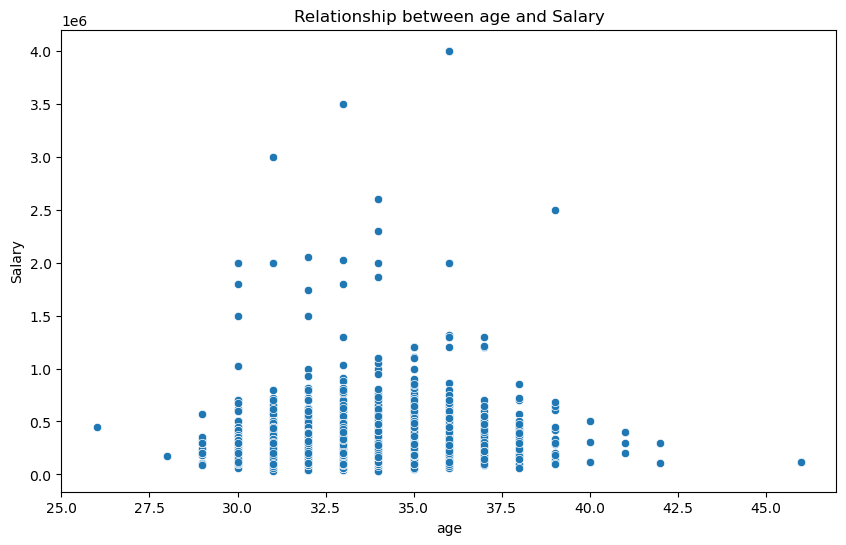

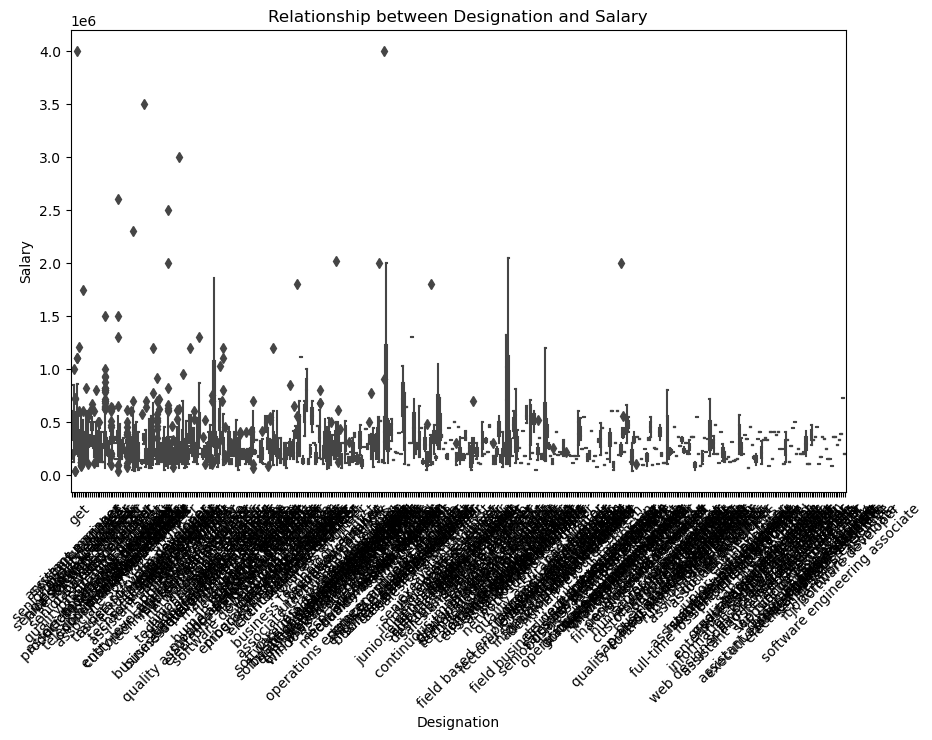

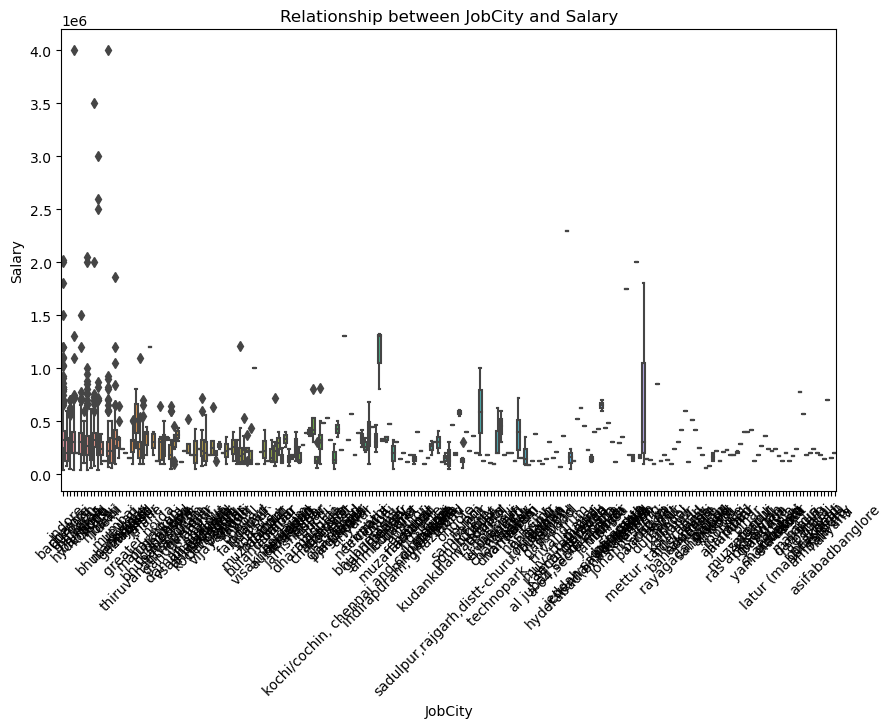

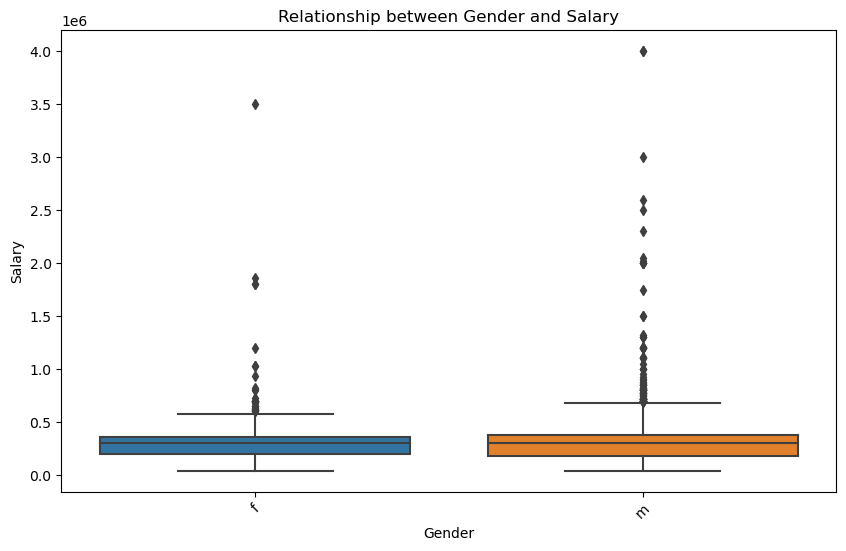

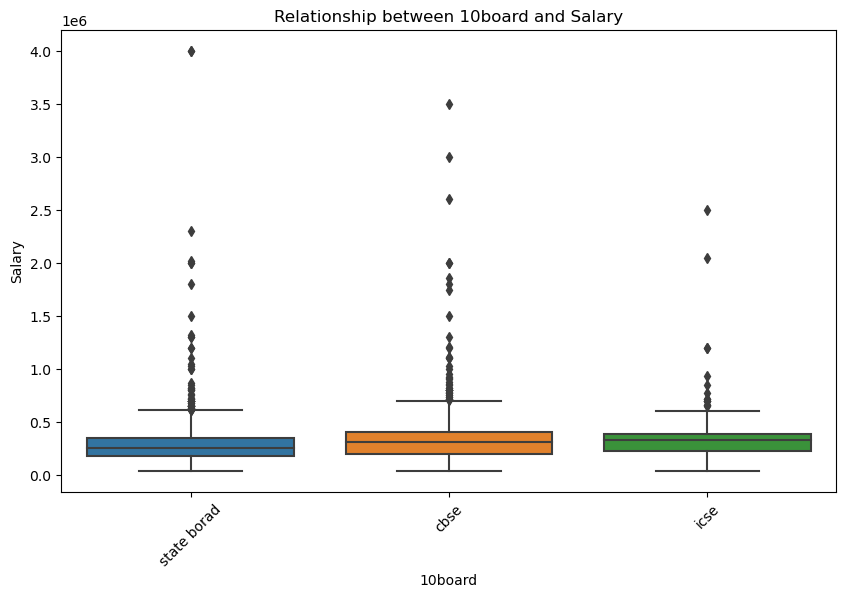

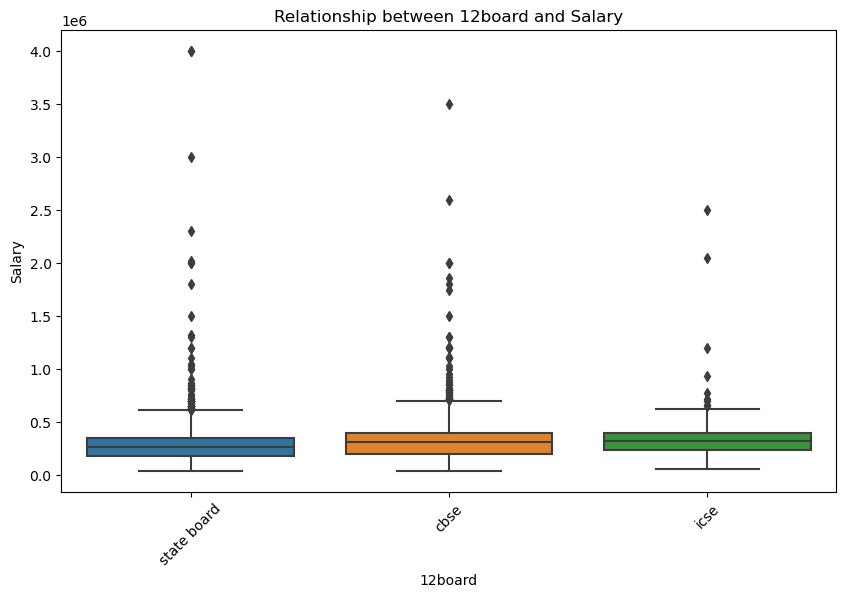

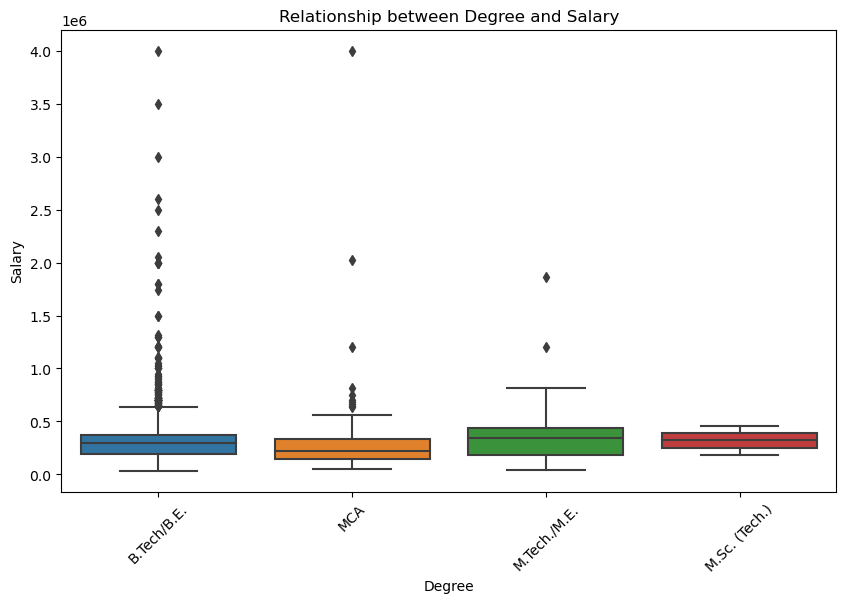

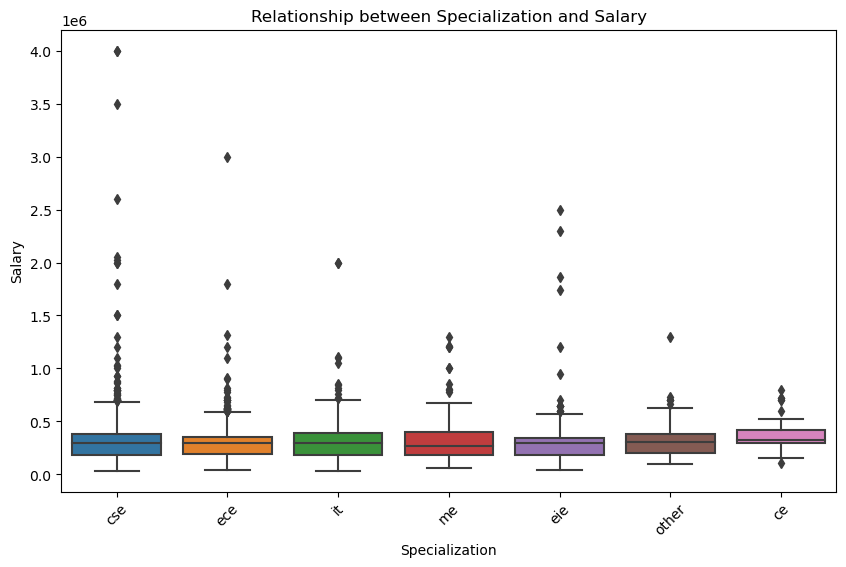

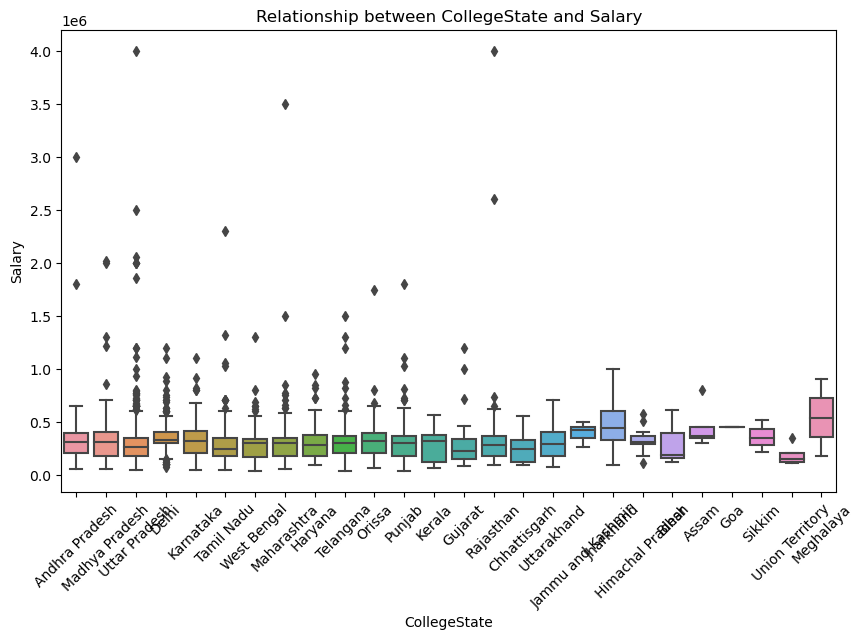

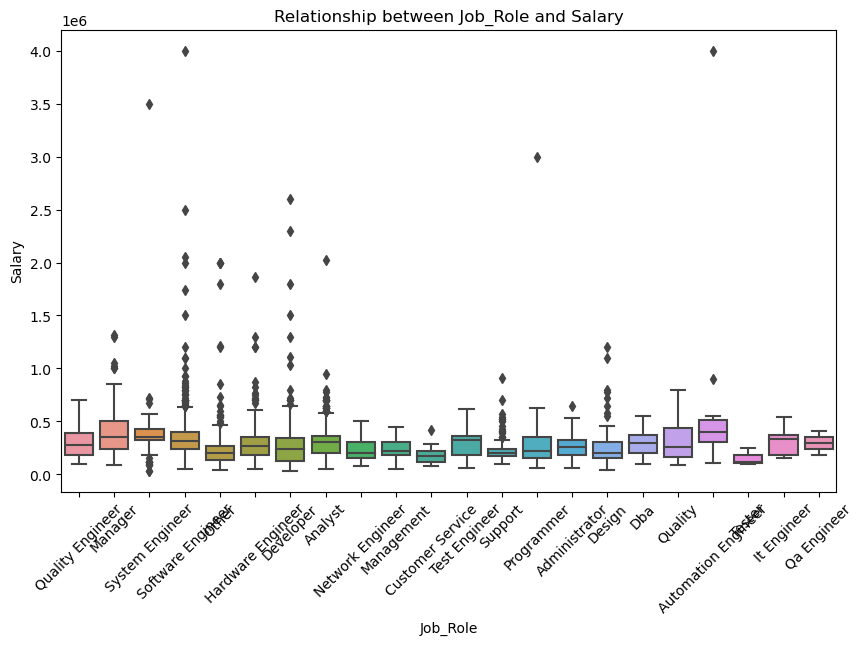

In [306]:
def visualize_data(df, target_variable='Salary'):
    """
    Create visualizations for univariate and bivariate analysis.

    Parameters:
    - df: DataFrame, the dataset
    - target_variable: str, the target variable for bivariate analysis (default is None for univariate analysis)

    Returns:
    - None
    """
    # Univariate Analysis
    if target_variable is None:
        # Plot distribution of each numerical variable
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numerical_cols:
            plt.figure(figsize=(10,6))
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.show()

        # Plot count of each category in categorical variables
        categorical_cols = df.select_dtypes(include='object').columns
        for col in categorical_cols:
            plt.figure(figsize=(10,6))
            sns.countplot(data=df, x=col)
            plt.title(f'Count of {col}')
            plt.xticks(rotation=45)
            plt.show()

    # Bivariate Analysis
    else:
        # Plot relationship between numerical predictor and target variable
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=col, y=target_variable)
            plt.title(f'Relationship between {col} and {target_variable}')
            plt.show()

        # Plot boxplot for categorical predictor and target variable
        categorical_cols = df.select_dtypes(include='object').columns
        for col in categorical_cols:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=col, y=target_variable)
            plt.title(f'Relationship between {col} and {target_variable}')
            plt.xticks(rotation=45)
            plt.show()


visualize_data(df, target_variable='Salary')

visualize_data(df)


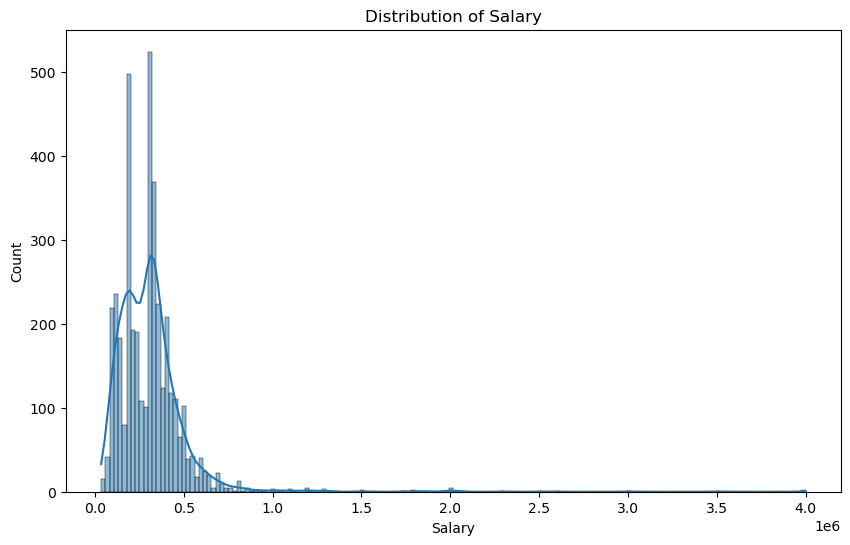

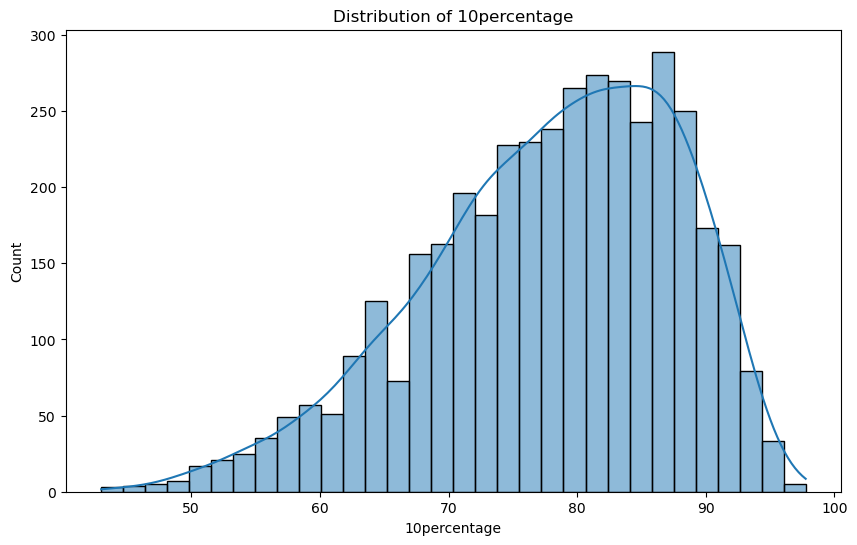

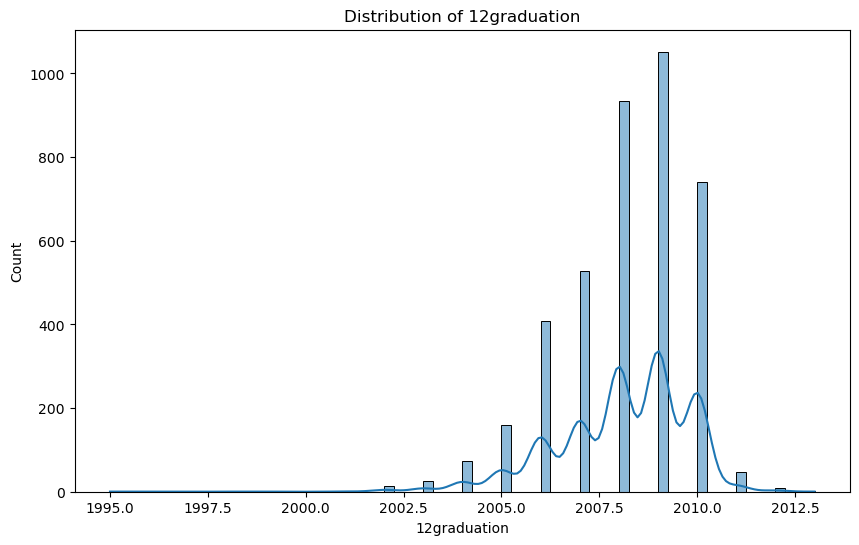

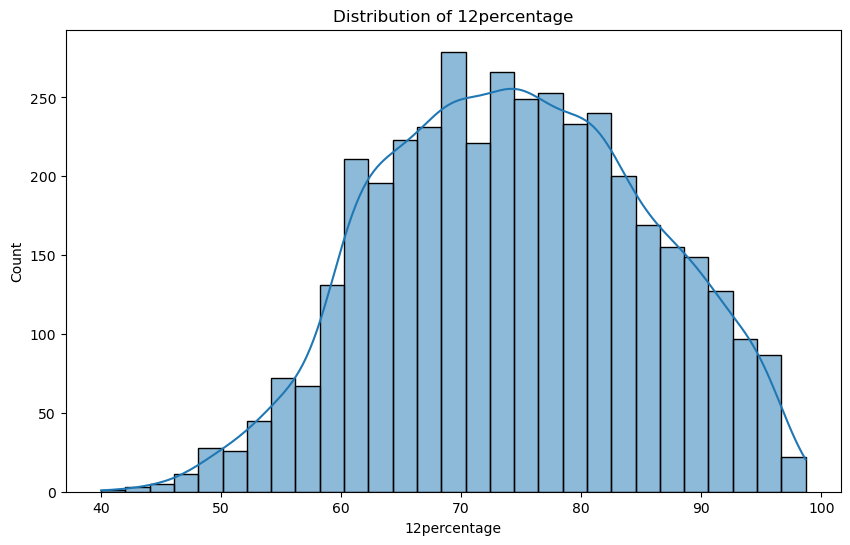

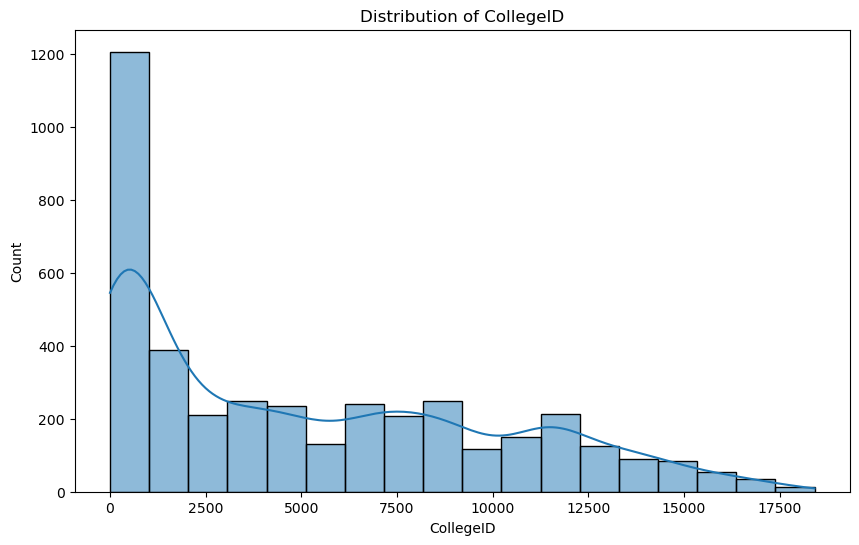

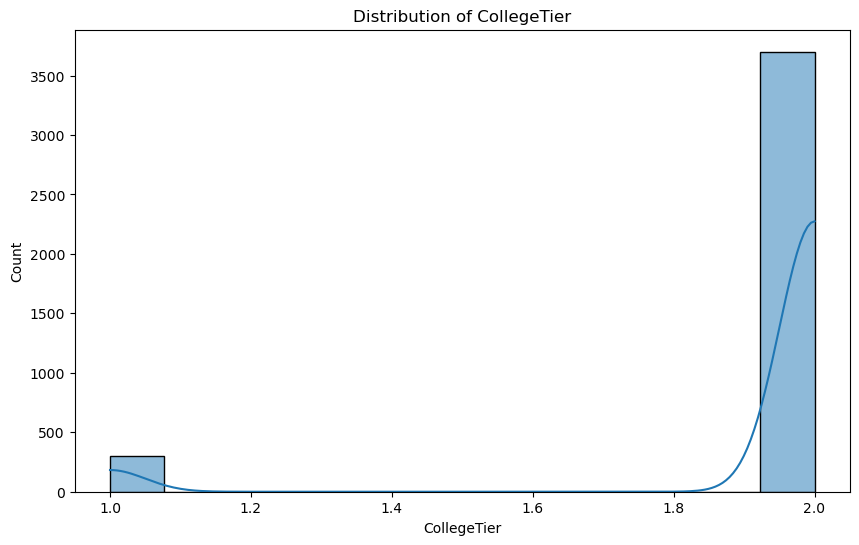

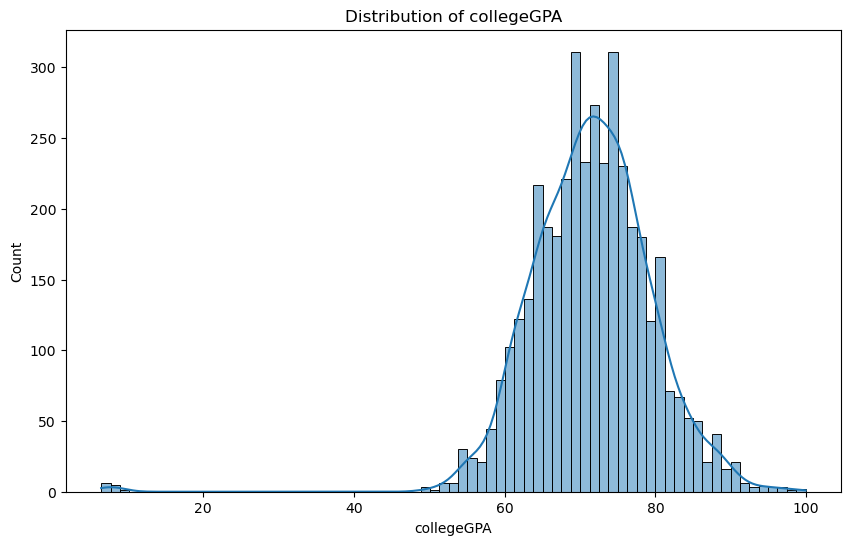

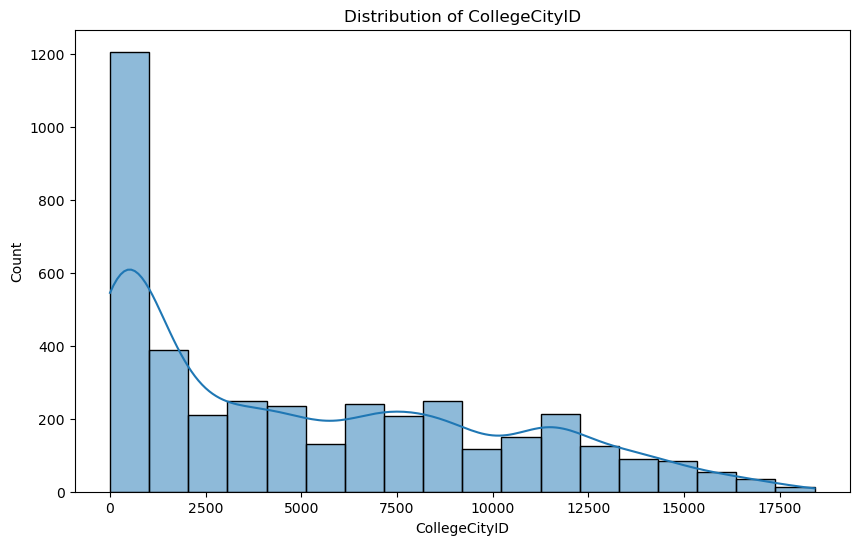

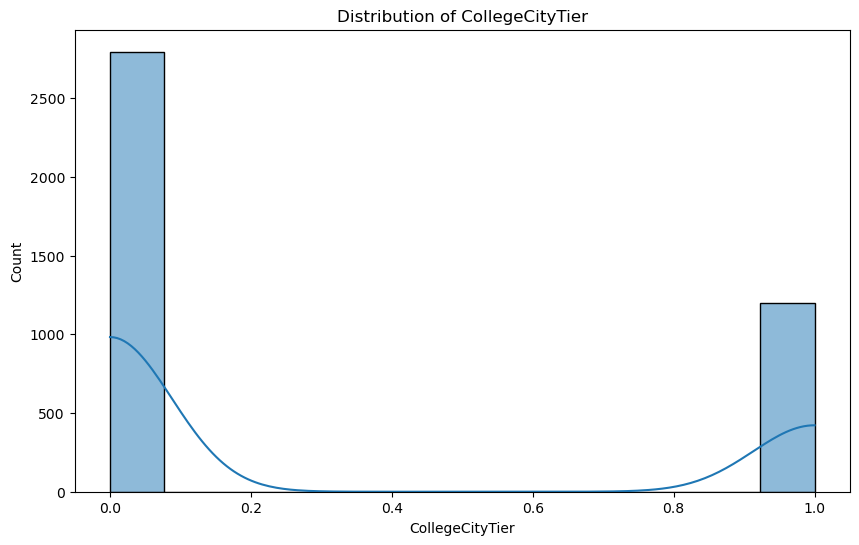

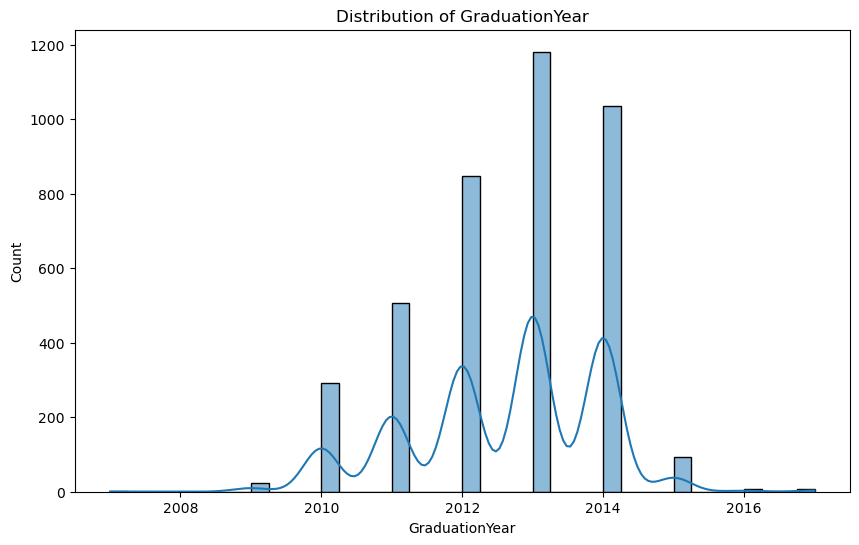

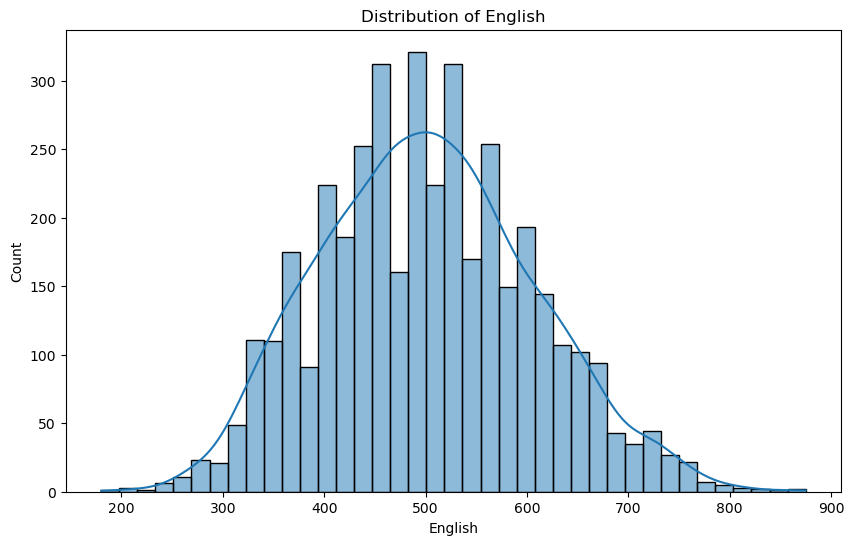

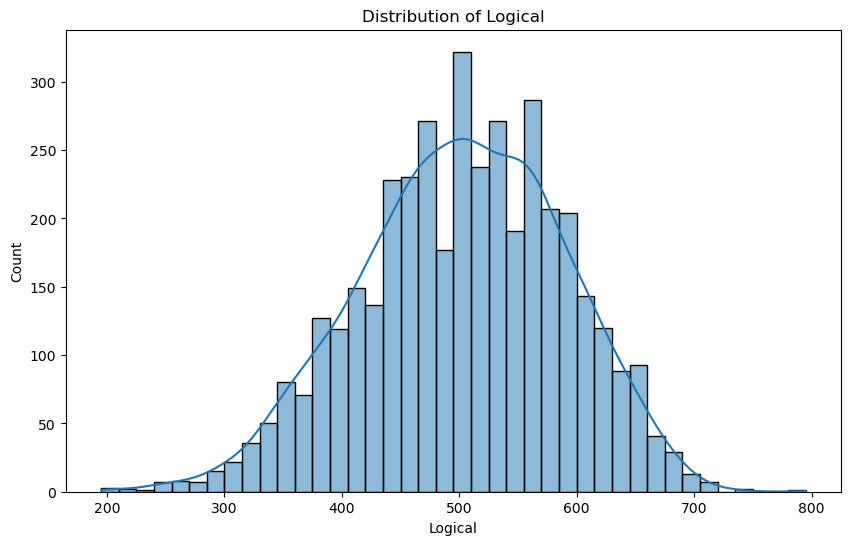

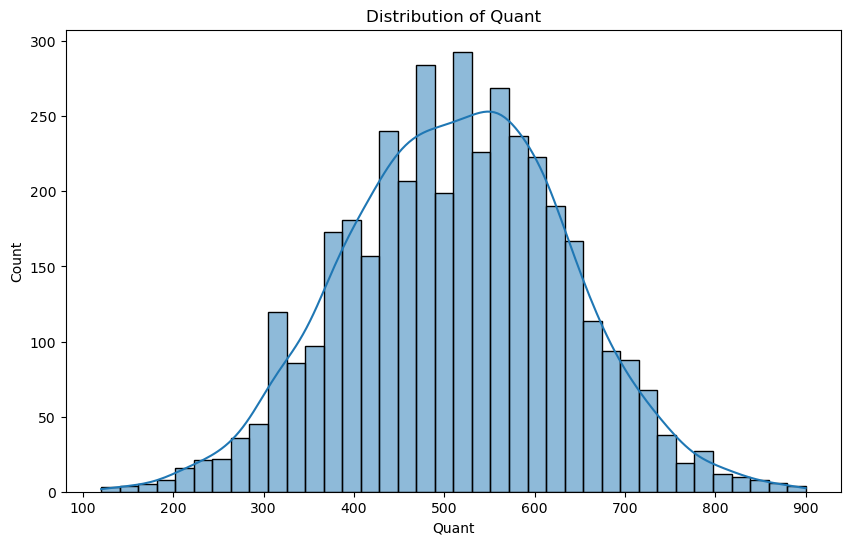

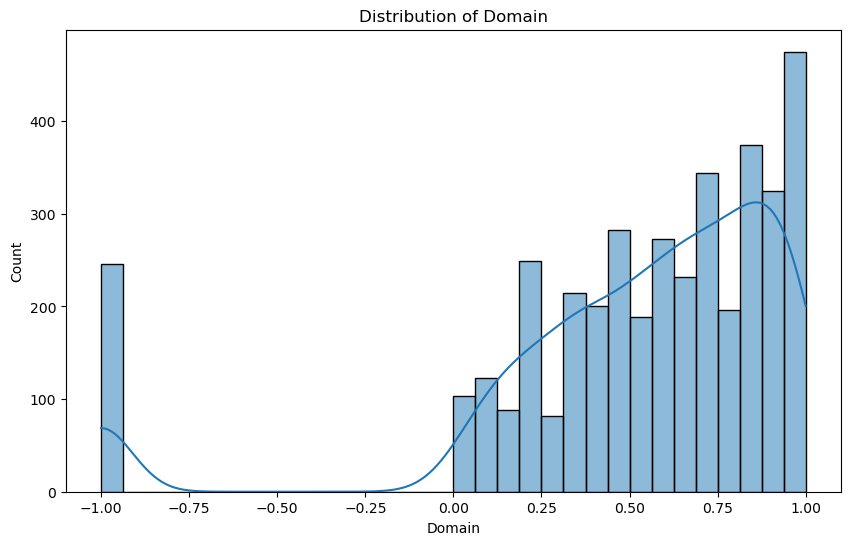

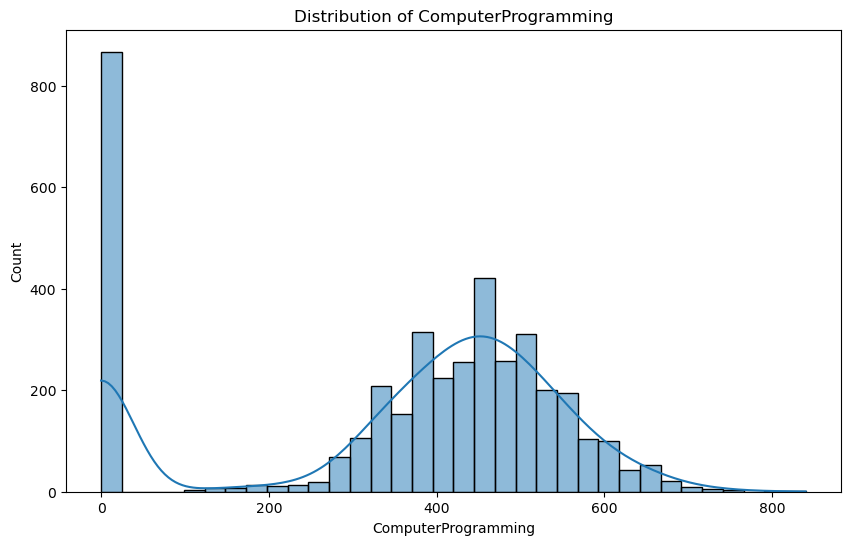

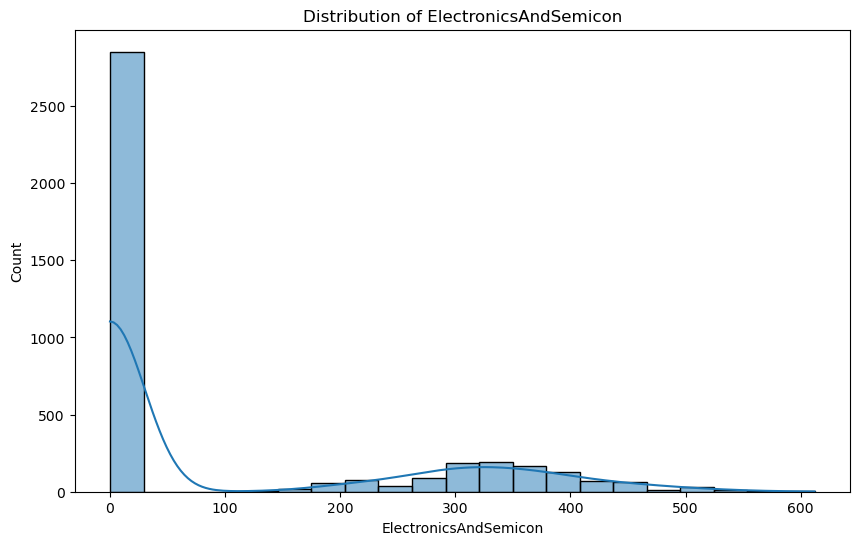

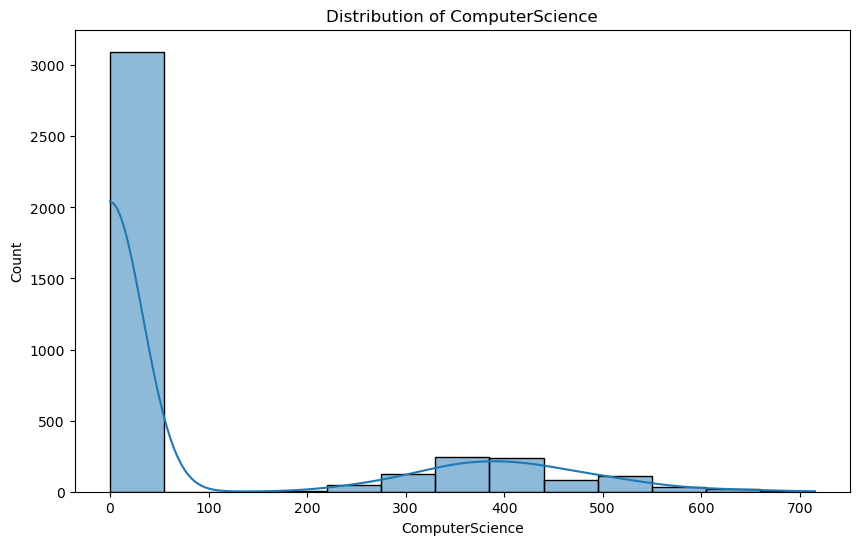

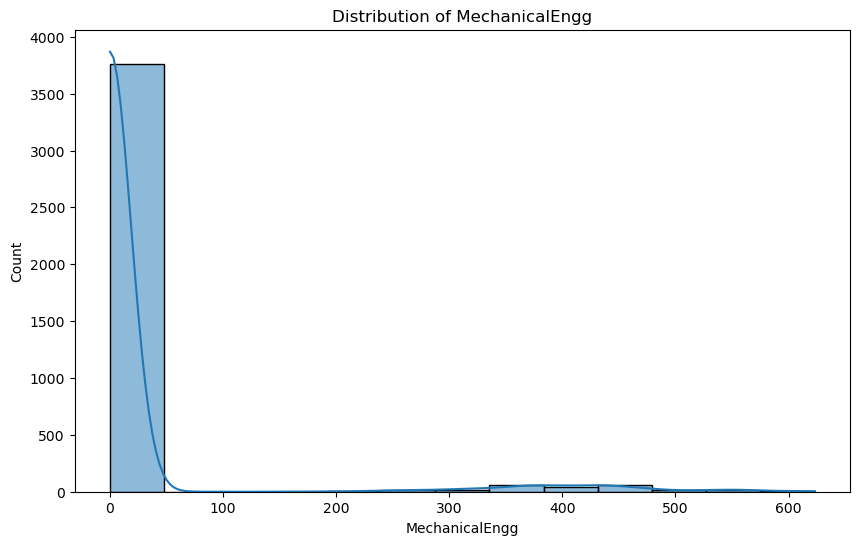

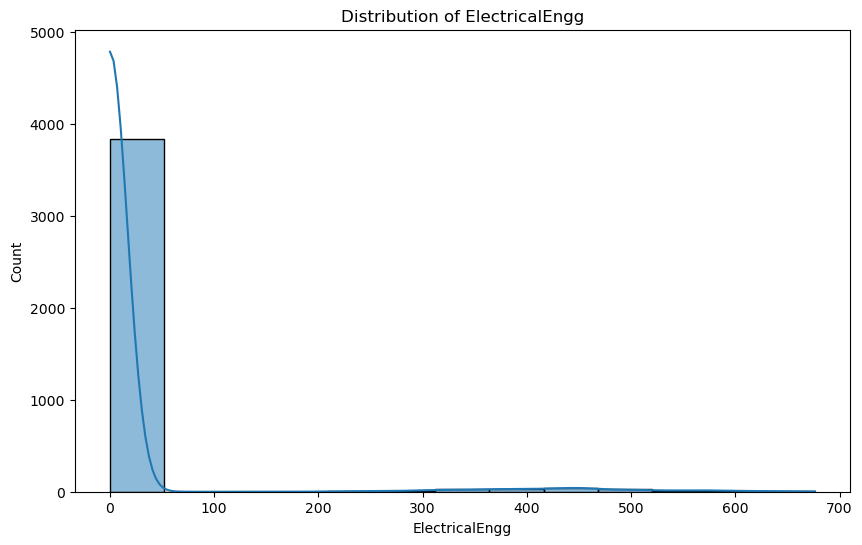

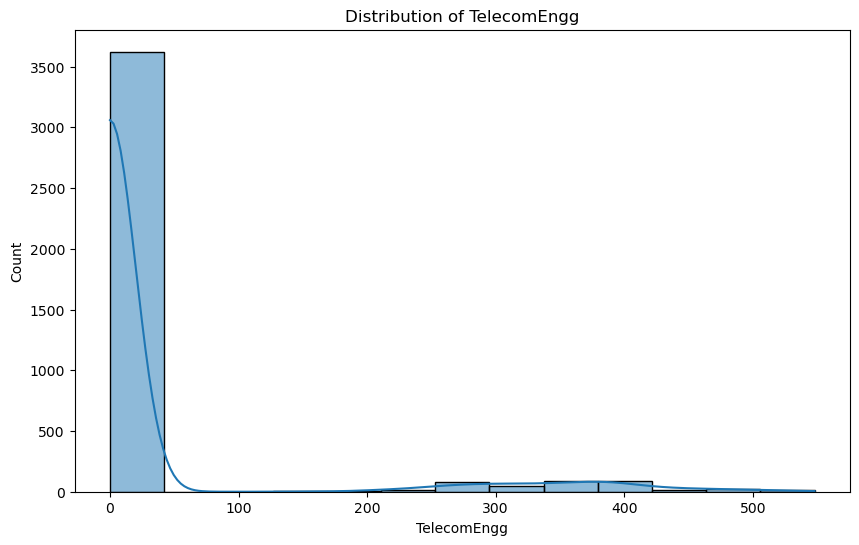

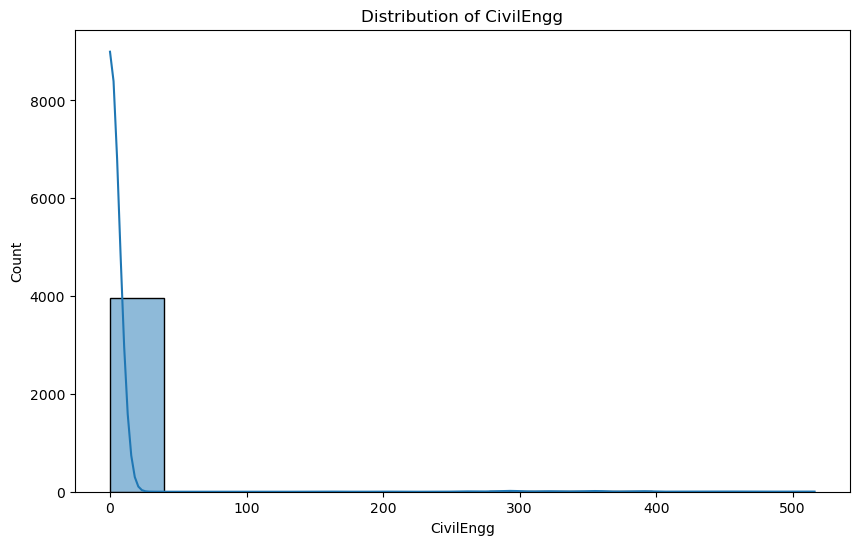

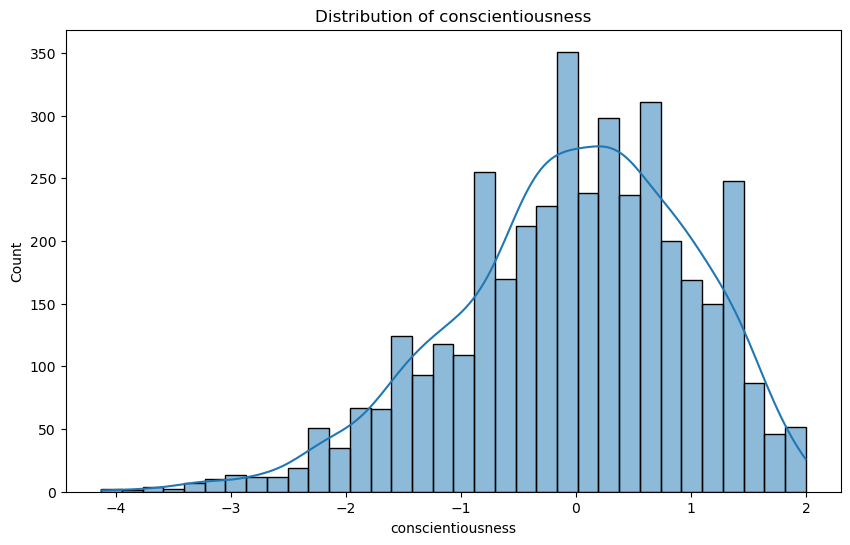

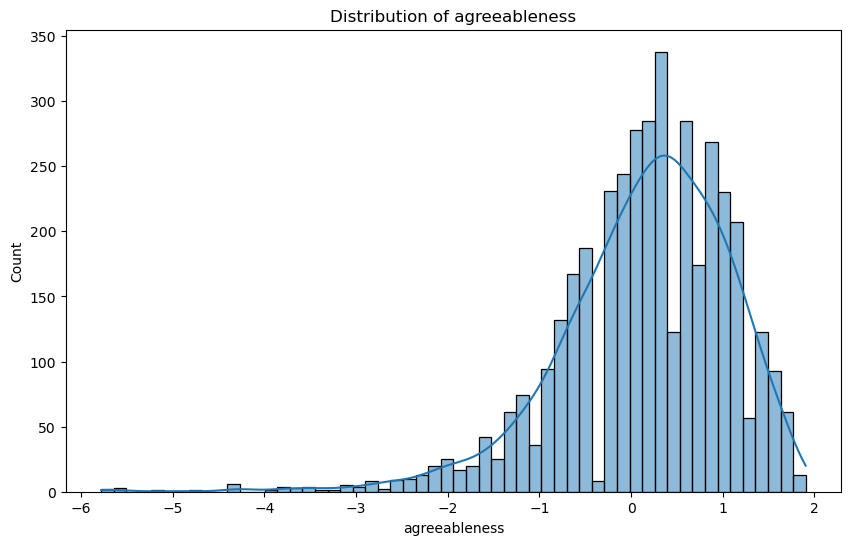

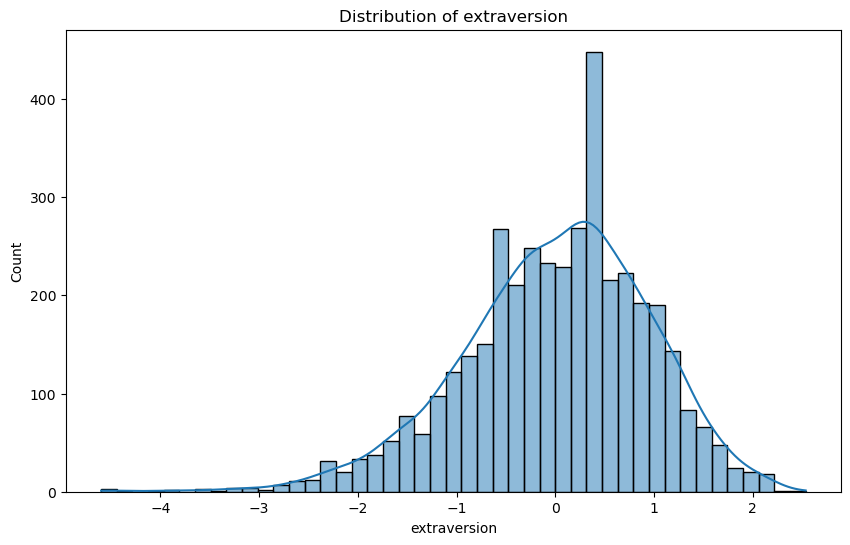

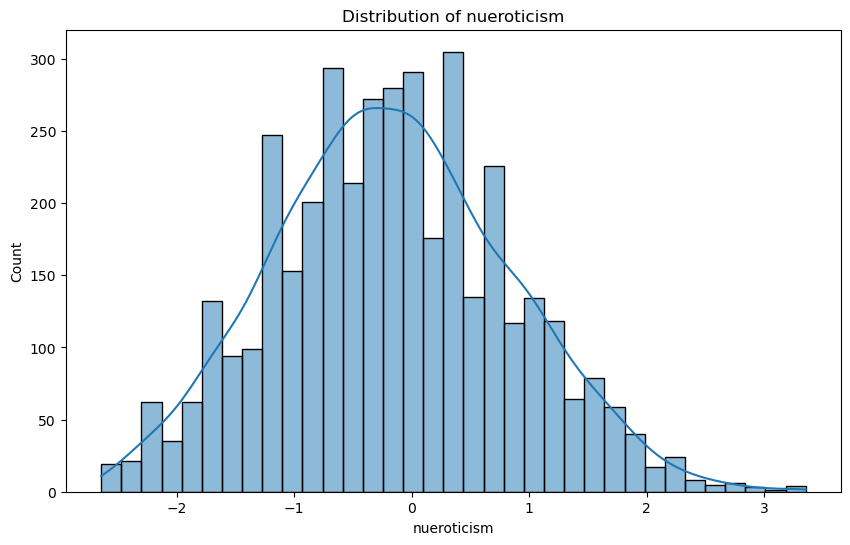

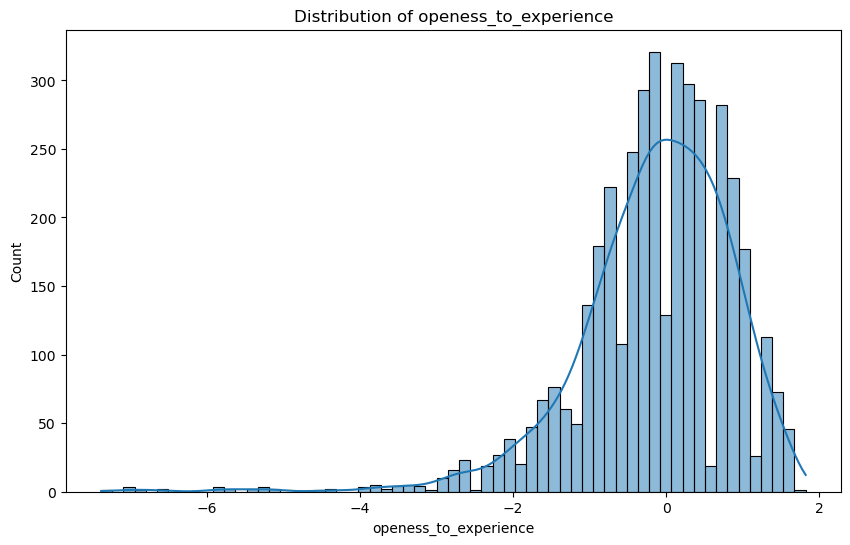

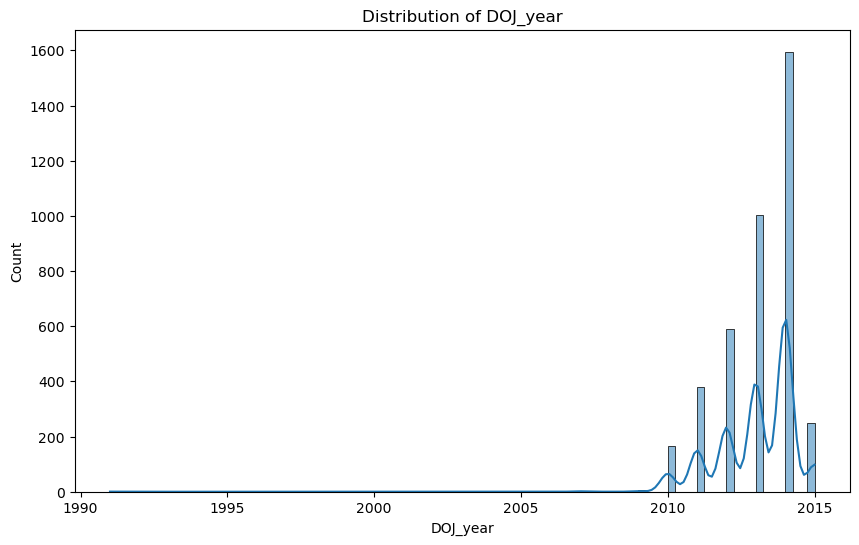

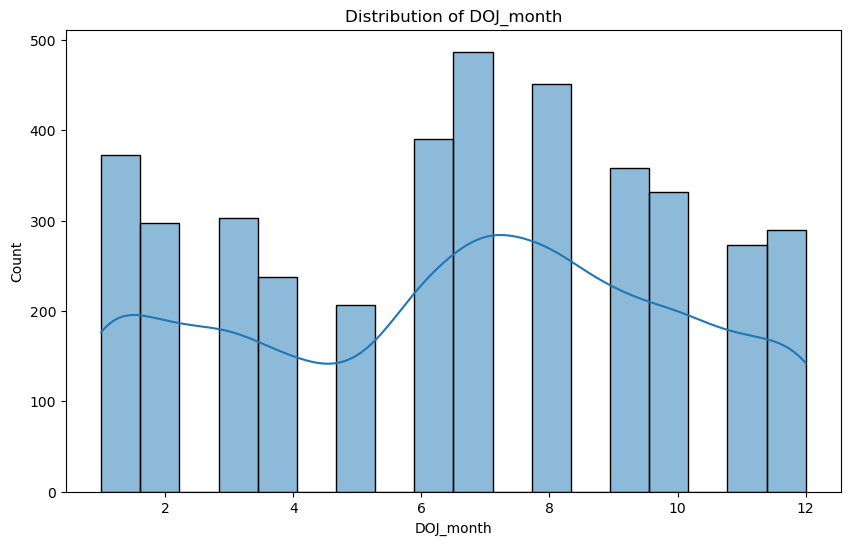

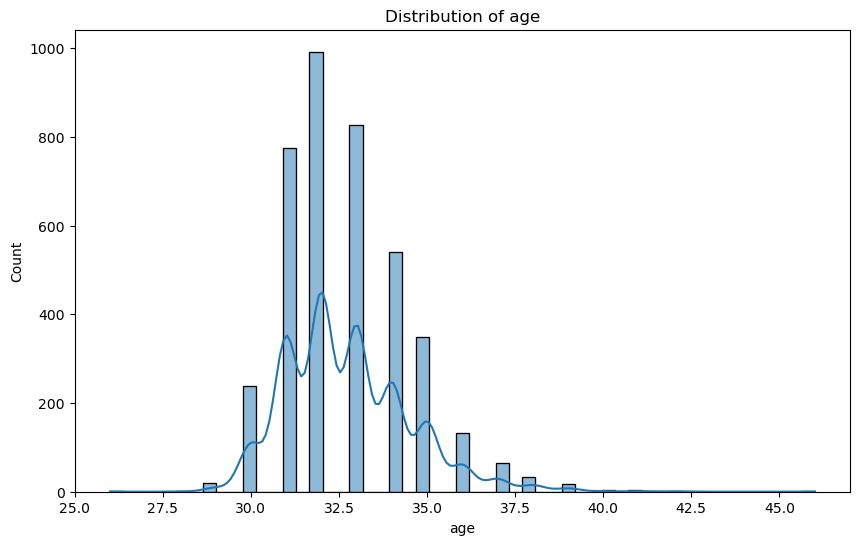

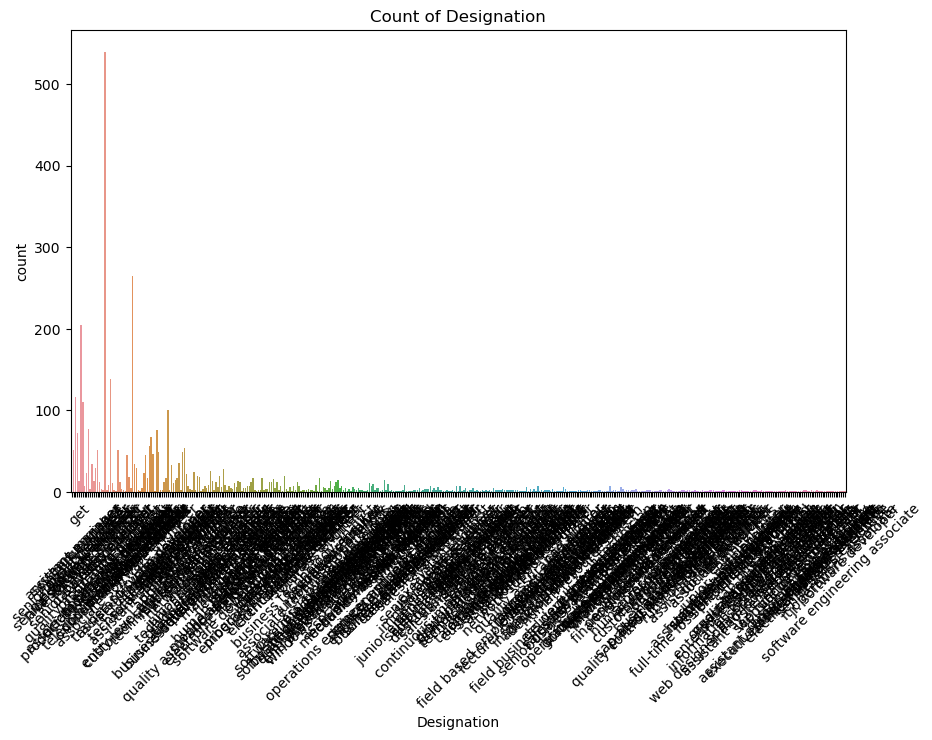

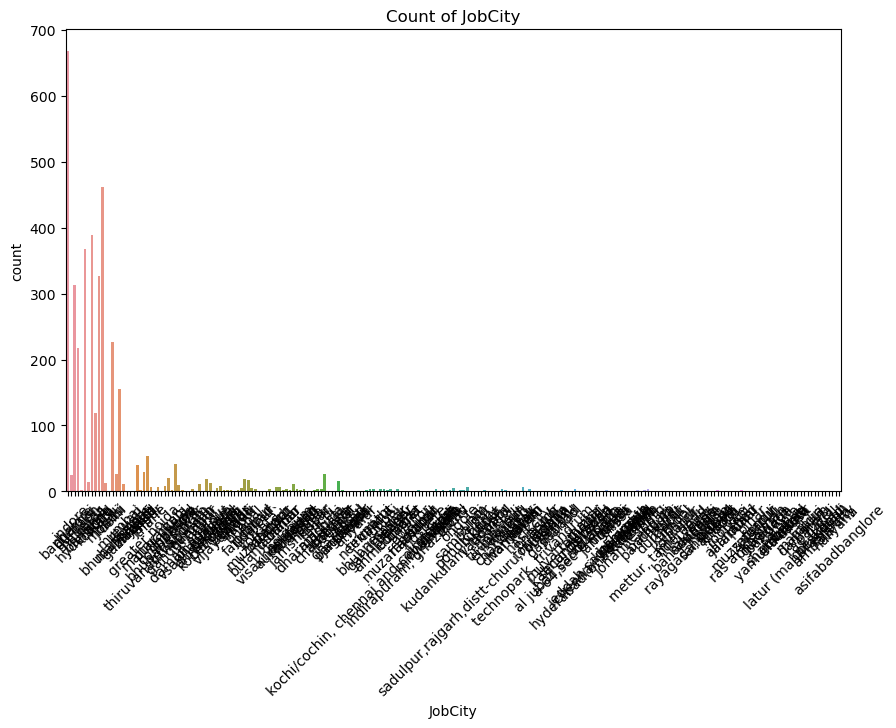

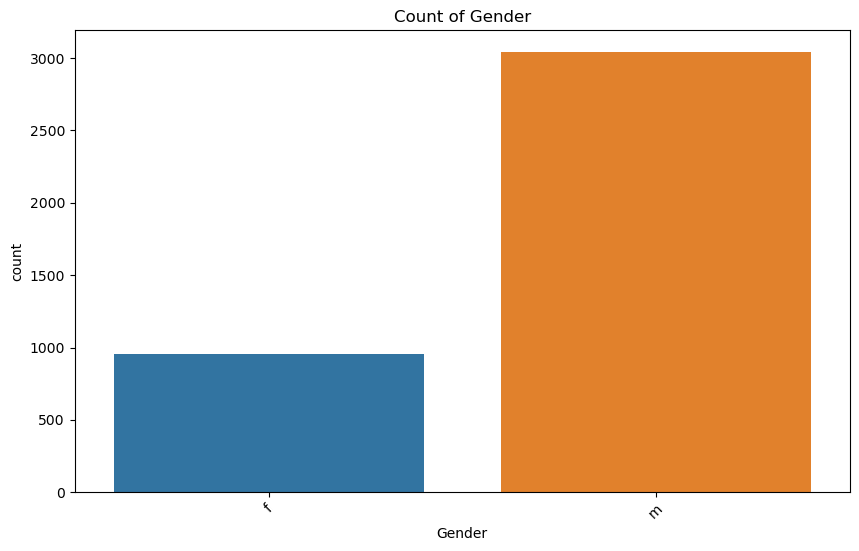

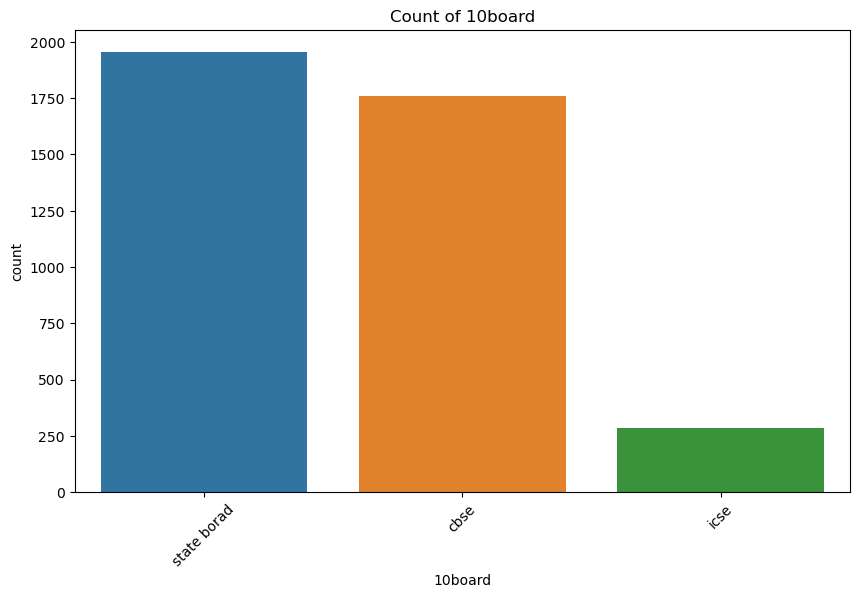

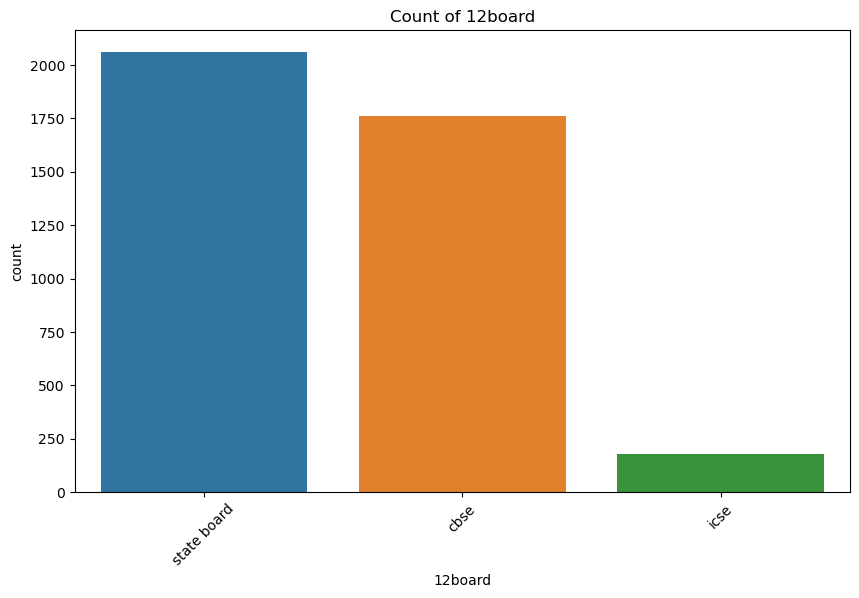

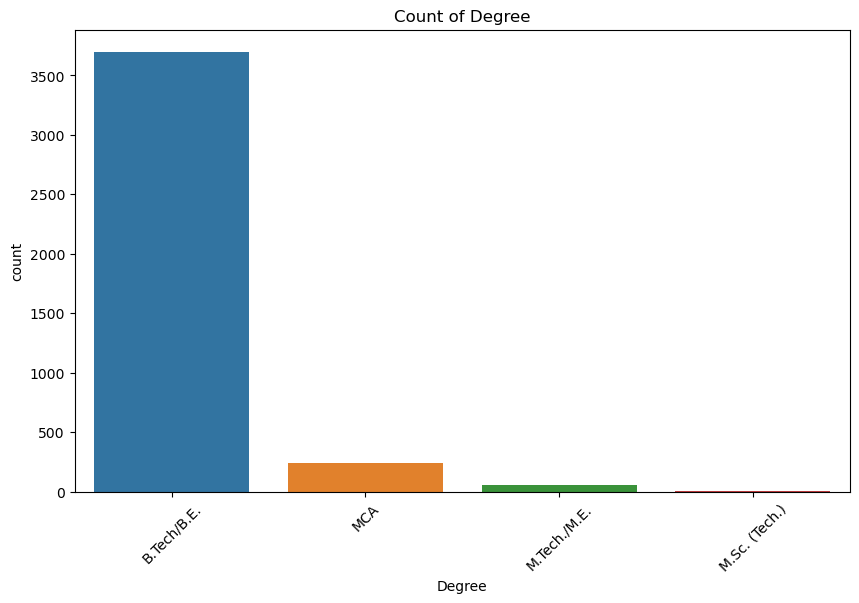

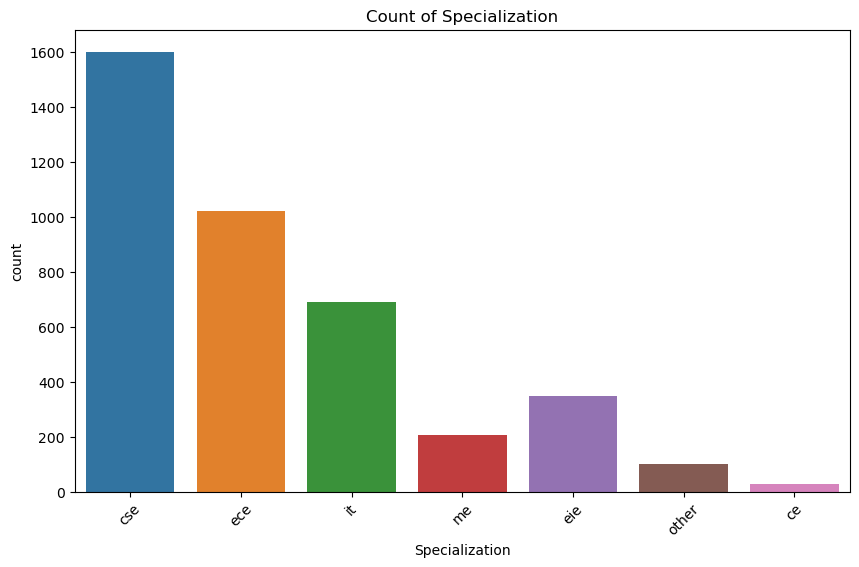

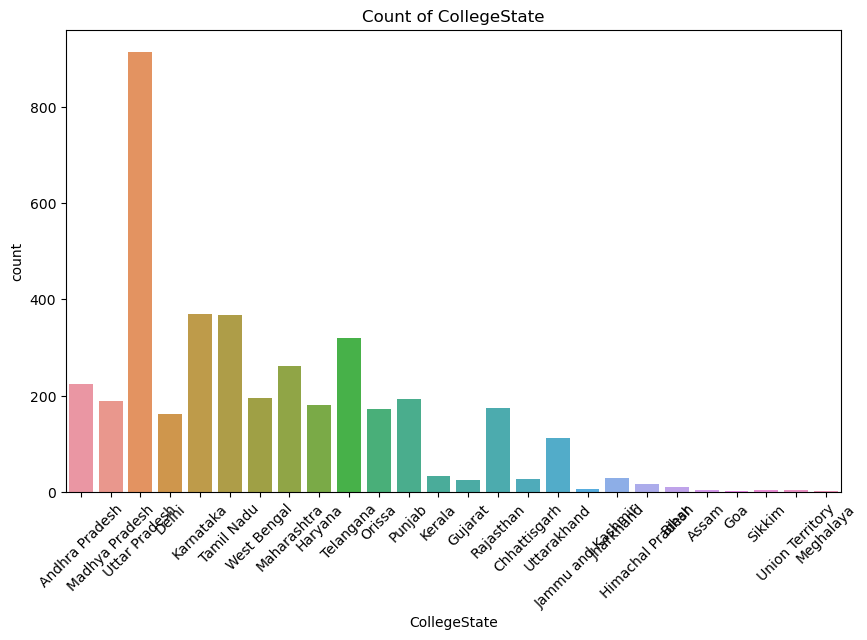

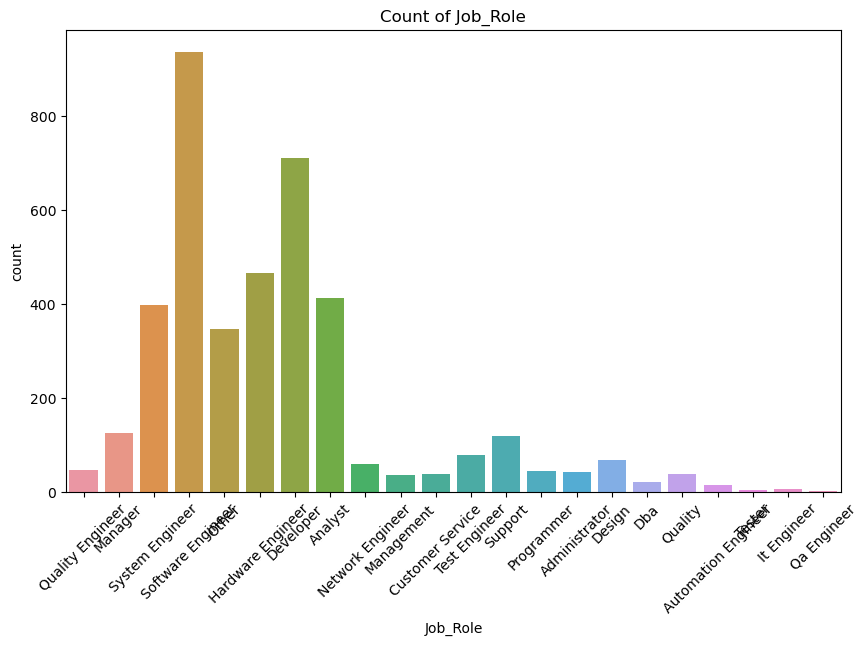

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data(df, target_variable=None):
    """
    Create visualizations for univariate and bivariate analysis.

    Parameters:
    - df: DataFrame, the dataset
    - target_variable: str, the target variable for bivariate analysis (default is None for univariate analysis)

    Returns:
    - None
    """
    # Univariate Analysis
    if target_variable is None:
        # Plot distribution of each numerical variable
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.show()

        # Plot count of each category in categorical variables
        categorical_cols = df.select_dtypes(include='object').columns
        for col in categorical_cols:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=col)
            plt.title(f'Count of {col}')
            plt.xticks(rotation=45)
            plt.show()

    # Bivariate Analysis
    else:
        # Plot relationship between numerical predictor and target variable
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=col, y=target_variable)
            plt.title(f'Relationship between {col} and {target_variable}')
            plt.show()

        # Plot boxplot for categorical predictor and target variable
        categorical_cols = df.select_dtypes(include='object').columns
        for col in categorical_cols:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=col, y=target_variable)
            plt.title(f'Relationship between {col} and {target_variable}')
            plt.xticks(rotation=45)
            plt.show()



visualize_data(df)


## Statistical Tests

### Research Questions

Research Questions
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)
- Let's Verify the calim
- Defining hypothesis |
| Hypothesis          | Description                               |
|----------------------|-------------------------------------------|
| Null Hypothesis (H0) | \(  250k-300k \)                          |
| Alternative Hypothesis (H1) | \( (250k-300k) \)      |


In [309]:
df['Job_Role'].unique()

array(['Quality Engineer', 'Manager', 'System Engineer',
       'Software Engineer', 'Other', 'Hardware Engineer', 'Developer',
       'Analyst', 'Network Engineer', 'Management', 'Customer Service',
       'Test Engineer', 'Support', 'Programmer', 'Administrator',
       'Design', 'Dba', 'Quality', 'Automation Engineer', 'Tester',
       'It Engineer', 'Qa Engineer'], dtype=object)

In [266]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [312]:
filtered_df = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
filtered_df

Salary         Designation             JobCity Gender  10percentage  \
19     325000.0   software engineer                pune      f         79.00   
20     320000.0   software engineer           bangalore      f         91.20   
21     200000.0   software engineer                  -1      f         75.67   
24     335000.0  programmer analyst           hyderabad      m         88.00   
31     340000.0   software engineer           bangalore      m         77.20   
36     270000.0   software engineer           hyderabad      f         91.50   
44     380000.0  programmer analyst           bangalore      f         84.50   
48     390000.0   software engineer           bangalore      m         86.60   
52     400000.0   software engineer              mumbai      m         85.20   
55     250000.0   software engineer           mangalore      m         90.80   
59     120000.0   software engineer           bangalore      m         72.00   
60     305000.0   software engineer             chennai      f         83.00   
75     300000.0  programmer analyst           bangalore      m         70.60   
76     800000.0   software engineer           bangalore      m         93.44   
93     325000.0   software engineer             gurgaon      m         70.00   
96     450000.0   software engineer           bangalore      m         65.00   
102    310000.0   software engineer                pune      m         79.00   
113    340000.0   software engineer           hyderabad      m         91.43   
114    640000.0  programmer analyst           bangalore      m         78.00   
115    330000.0   software engineer             chennai      m         76.17   
119    305000.0   software engineer           bangalore      f         90.04   
120    500000.0   software engineer             gurgaon      f         76.00   
124    315000.0  programmer analyst                  -1      f         82.30   
125    300000.0  programmer analyst             kolkata      m         90.00   
130    325000.0   software engineer       greater noida      m         82.80   
137    340000.0   software engineer             gurgaon      m         77.80   
151    305000.0   software engineer               noida      m         85.00   
163    335000.0  programmer analyst             chennai      m         73.00   
168    375000.0   software engineer               noida      m         85.80   
170    235000.0   software engineer           hyderabad      m         92.66   
175    450000.0   software engineer           bangalore      f         76.20   
182    300000.0   software engineer                pune      f         91.60   
187    410000.0  programmer analyst           hyderabad      m         91.50   
197    240000.0   hardware engineer             chennai      m         81.00   
200    440000.0   software engineer             gurgaon      m         91.40   
204    305000.0   software engineer                pune      m         88.20   
205    325000.0   software engineer               noida      m         80.60   
207    360000.0   software engineer           bangalore      m         82.00   
209    300000.0  associate engineer           bangalore      f         87.00   
214    300000.0   software engineer           bangalore      m         89.50   
215    300000.0  programmer analyst             chennai      f         92.80   
227    550000.0   software engineer                  -1      m         94.60   
231    310000.0   software engineer             chennai      m         80.83   
233    300000.0  programmer analyst             chennai      f         86.20   
243    265000.0   software engineer           bangalore      f         80.33   
247    275000.0   software engineer           bangalore      m         60.14   
252    170000.0   software engineer           hyderabad      m         77.66   
257    245000.0   software engineer           bengaluru      m         81.00   
261    425000.0   software engineer               noida      m         75.60   
263    30

In [313]:
average_salary = filtered_df['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

The average salary for these roles is: 339790.4624277457


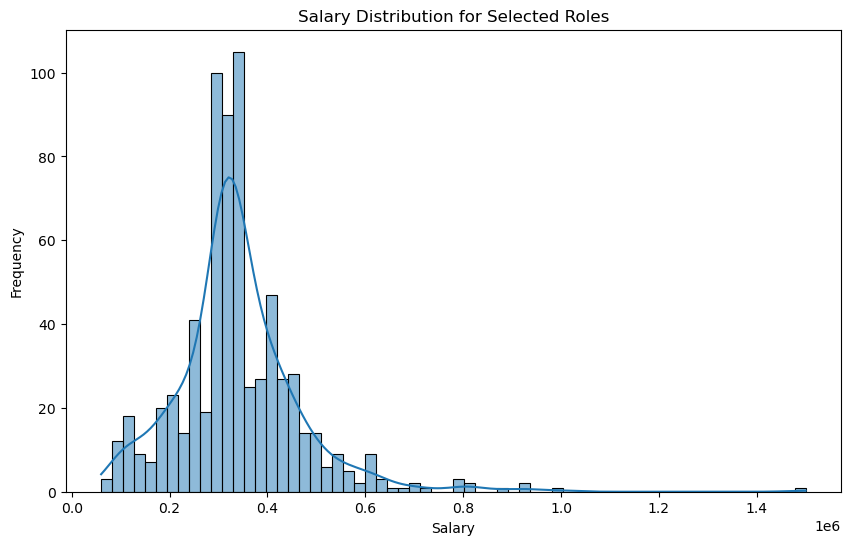

In [314]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [315]:
max_salary = filtered_df['Salary'].max()

In [316]:
if max_salary >= 250000 and max_salary <= 300000:
    print("Fail to Reject Null Hypothesis (H1): The claim that Recent graduates can earn between 2.5 - 3 lakhs is supported by the data.")
else:
    print("Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.")

Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.


## Observation:
Reject Null Hypothesis (H0) - Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.

## Conclusions
- The data reveals a gender imbalance, indicating a need for diversity efforts in the workforce.
- Technical skills, particularly in Computer Science and Engineering, are in high demand based on the prevalence of related     degrees.
- Job roles vary widely, with Software Engineer being the most common, followed by Developer.
- Educational board preferences influence policies, with a preference for State Boards, CBSE, and ICSE.
- Technical expertise is crucial, as evidenced by the prevalence of Bachelor of Technology/Engineering graduates.
- Managerial and technical positions are the highest-earning roles.
- College tier impacts earnings, with Tier-1 graduates earning more.
- Gender-based salary differences exist, though further analysis is needed for clarity.
- The claim about recent graduates' earnings in Computer Science Engineering was not supported by the data.
- There's no significant link between gender and specialization preference, challenging assumptions about their correlation.